# Cannanetics - Brainstation Capstone Project - EDA & Modeling

Daniel De Biasio
June 28, 2020

In [5]:
#import our favorite libraries
import pandas as pd
import numpy as np
import string
from scipy import stats

#import some plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

#import some sparse matrix functions
from scipy import sparse
from scipy.sparse import hstack

#import train test split for model evaluation
from sklearn.model_selection import train_test_split

#import scaler
from sklearn.preprocessing import StandardScaler


#Importing Vectorizers
from sklearn.feature_extraction.text import CountVectorizer

#import linear regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#import tree regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import plot_tree

#import K neighbors regressor
from sklearn.neighbors import KNeighborsRegressor

#import SVR
from sklearn.svm import SVR


#import statistics functions
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import pipeline and grid search cv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#import MSE and cross val score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# Importing and Exploring the Variant and Total THC Data

First I import the data we cleaned and collected in the other notebook.

In [6]:
# Import the csv file containing the data
all_canna_sample_data_variant_mapped_list_lab_data= pd.read_csv('all_canna_sample_data_variant_mapped_list_lab_data.csv')

In [3]:
#check the import for header issues, no issues to be seen

all_canna_sample_data_variant_mapped_list_lab_data.head()

,Unnamed: 0,sra,strain,mapped_variant,num_variants,total_thc,total_cbd
0,0,SRS1758139,flo,"type_2048, type_2274, type_2604, type_4894, ty...",4534,15.08,0.02
1,1,SRS1758139,flo,"type_2048, type_2274, type_2604, type_4894, ty...",4534,20.10,0.15
2,2,SRS1758473,flo,"type_2048, type_2274, type_2604, type_5097, ty...",4097,15.08,0.02
3,3,SRS1758473,flo,"type_2048, type_2274, type_2604, type_5097, ty...",4097,20.10,0.15
4,4,SRS1107948,flo,"type_4, type_4, type_7, type_7, type_11, type_...",1518248,15.08,0.02


In [54]:
#check the import for footer issues, no issues to be seen

all_canna_sample_data_variant_mapped_list_lab_data.tail()

,Unnamed: 0,sra,strain,mapped_variant,num_variants,total_thc,total_cbd
4182,4182,SRS1760300,platinum girlscout cookies,"type_1651, type_2048, type_2274, type_2604, ty...",3592,30.44,0.16
4183,4183,SRS1760300,platinum girlscout cookies,"type_1651, type_2048, type_2274, type_2604, ty...",3592,18.45,0.12
4184,4184,SRS1760300,platinum girlscout cookies,"type_1651, type_2048, type_2274, type_2604, ty...",3592,23.42,0.06
4185,4185,SRS1760300,platinum girlscout cookies,"type_1651, type_2048, type_2274, type_2604, ty...",3592,21.80,0.02
4186,4186,SRS1760300,platinum girlscout cookies,"type_1651, type_2048, type_2274, type_2604, ty...",3592,16.80,0.12


In [7]:
#Remove the unwanted column with the original index values, and the cbd column, since i didn't get to use it
all_canna_sample_data_variant_mapped_list_lab_data.drop(columns = ['Unnamed: 0', 'total_cbd'], inplace = True)

In [8]:
#check the dropping of the old index column
all_canna_sample_data_variant_mapped_list_lab_data.head()

,sra,strain,mapped_variant,num_variants,total_thc
0,SRS1758139,flo,"type_2048, type_2274, type_2604, type_4894, ty...",4534,15.08
1,SRS1758139,flo,"type_2048, type_2274, type_2604, type_4894, ty...",4534,20.10
2,SRS1758473,flo,"type_2048, type_2274, type_2604, type_5097, ty...",4097,15.08
3,SRS1758473,flo,"type_2048, type_2274, type_2604, type_5097, ty...",4097,20.10
4,SRS1107948,flo,"type_4, type_4, type_7, type_7, type_11, type_...",1518248,15.08


Column Descriptions:

<br>sra - unique identifier of the sample used in the genome sequencing
<br>strain: The common strain name of the genome sample
<br>mapped_variant: A list of all the unique variants in the genome of the sample, each variant is for a specific location range in the genome, and type of variation, determined by comparing the sample genome to a reference genome.
<br>num_variants: Total Number of variations in the strains genome
<br>total_thc : total amount in weight % of delta-9 thc, and delta-9 thc-a in the flower of the plant with those genome variants

In [6]:
#check the data frame info, for nulls, no nulls to be found

all_canna_sample_data_variant_mapped_list_lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sra             4187 non-null   object 
 1   strain          4187 non-null   object 
 2   mapped_variant  4187 non-null   object 
 3   num_variants    4187 non-null   int64  
 4   total_thc       4187 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 163.7+ KB


In [7]:
#Getting an idea of the numeric columns info

all_canna_sample_data_variant_mapped_list_lab_data.describe()

,num_variants,total_thc
count,4.187000e+03,4187.000000
mean,4.837742e+04,18.216011
std,2.863752e+05,7.451743
min,5.580000e+02,0.100000
25%,3.761000e+03,16.050000
50%,4.308000e+03,20.410000
75%,4.886000e+03,23.010000
max,8.144962e+06,34.460000


It is apparent that the number of variants varies wildly, from 500 to 81,444,962 variants, so i may have some weird genetic samples, or outliers.

In [8]:
# Number of unique genome samples:

len(all_canna_sample_data_variant_mapped_list_lab_data['sra'].unique())

542

In [9]:
# Number of unique strain samples:

len(all_canna_sample_data_variant_mapped_list_lab_data['strain'].unique())

350

So in this data set i have 542 genetic samples, and 350 unique strains. The THC content varies from 0.1% THC, and 34.46%, with a mean of 18.2%.

## Looking at the number of variants each genetic sample 

Here i explore the distribution of variants each sample has

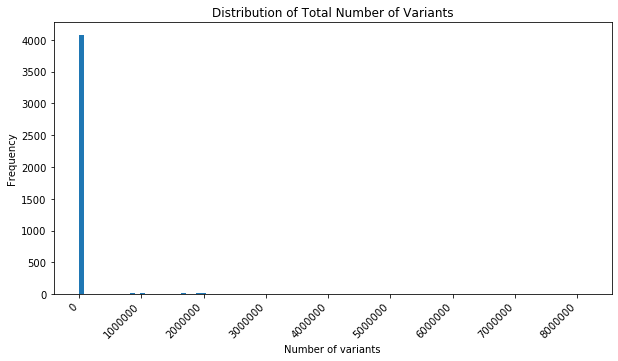

In [59]:
# looking at the distribution of the numeber of variants the samples have.

plt.figure(figsize=(10,5))
plt.hist(all_canna_sample_data_variant_mapped_list_lab_data['num_variants'], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Number of variants')
plt.title('Distribution of Total Number of Variants')
plt.xticks(rotation=45, 
           horizontalalignment='right',)

plt.show()

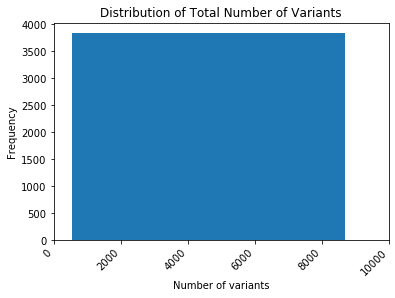

In [11]:
# looking at the distribution of the number of variants the samples have.
#looking more closely at the large peak

plt.figure()
plt.hist(all_canna_sample_data_variant_mapped_list_lab_data['num_variants'], bins = 1000)
plt.ylabel('Frequency')
plt.xlabel('Number of variants')
plt.title('Distribution of Total Number of Variants')
plt.xlim(0,10000)
plt.xticks(rotation=45, 
           horizontalalignment='right',)

plt.show()

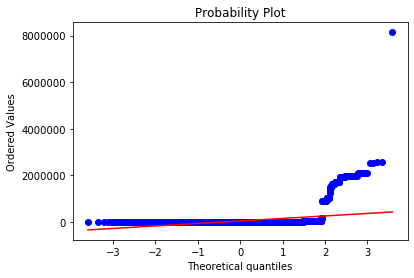

In [12]:
#checking if the distribution of variants is normal

stats.probplot(all_canna_sample_data_variant_mapped_list_lab_data['num_variants'], dist="norm", plot = plt);
plt.show();

Its apparent that I have genetic samples which have a massive amount of variants compared to the majority, which are outliers in comparison to the average number of variants. These could be rare strains, or genetic samples in which there was an error in determing the variants which exist in their genome, which I may not want to include at this time. A majority of the genetic samples contiain 500 to 10,000 variants, more specifically 3847 of 4187 of the observations so i plan on working with these observations.

In [13]:
#Seeing the percentage of original dataset we would be keeping

(all_canna_sample_data_variant_mapped_list_lab_data['num_variants'] <=10000).sum()/4187

0.9187962741819918

In [9]:
# reducing the dataset to only use genetic samples with 10,000 variants or less.
all_canna_sample_data_variant_mapped_list_lab_data_red = all_canna_sample_data_variant_mapped_list_lab_data.query('num_variants <= 10000')
all_canna_sample_data_variant_mapped_list_lab_data_red.head()

,sra,strain,mapped_variant,num_variants,total_thc
0,SRS1758139,flo,"type_2048, type_2274, type_2604, type_4894, ty...",4534,15.08
1,SRS1758139,flo,"type_2048, type_2274, type_2604, type_4894, ty...",4534,20.10
2,SRS1758473,flo,"type_2048, type_2274, type_2604, type_5097, ty...",4097,15.08
3,SRS1758473,flo,"type_2048, type_2274, type_2604, type_5097, ty...",4097,20.10
6,SRS1760330,gsc,"type_1651, type_2048, type_2274, type_8083, ty...",5709,24.25


In [15]:
#getting the original data set shape
all_canna_sample_data_variant_mapped_list_lab_data.shape

(4187, 5)

In [16]:
#getting the shape of the new reduced dataset
all_canna_sample_data_variant_mapped_list_lab_data_red.shape

(3847, 5)

In [17]:
#Checking the number of unique samples which remain

len(all_canna_sample_data_variant_mapped_list_lab_data_red['sra'].unique())

499

In [18]:
#Checking the number of unique strains which remain

len(all_canna_sample_data_variant_mapped_list_lab_data_red['strain'].unique())

324

Focusing on samples which have less than 10,000 variants leads to a decrease of 43 genome samples, and 26 unique strains, but an overall decrease in observations of 340 observations, 8% of the orignial dataset, which is not ideal, but i feel as though the samples with variants above this number are some sort of anomally or werent compared to the reference genome properly, and don't represent the general population.

## Looking at the THC content Relationship to the Number of Variants, and its Distribution

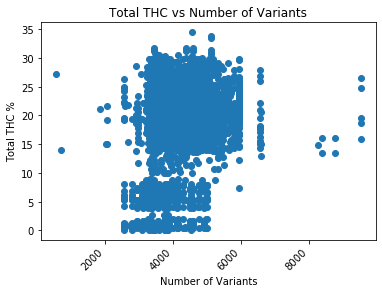

In [19]:
#Looking at if there was any relationship between the number of variants to the THC

plt.figure()
plt.scatter(all_canna_sample_data_variant_mapped_list_lab_data_red['num_variants'],\
            all_canna_sample_data_variant_mapped_list_lab_data_red['total_thc'])
plt.xlabel('Number of Variants')
plt.ylabel('Total THC %')
plt.title('Total THC vs Number of Variants')
plt.xticks(rotation=45, horizontalalignment='right') 
plt.show()

When looking at the number of variants in each strain and its effect on the total % content, there seems to be some clustering, and for samples with more than 5000 variants, they seem to only have a THC content of above 10%.

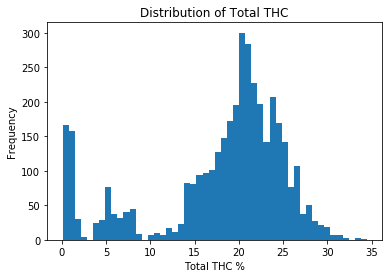

In [20]:
# Looking at the distribution of the THC content

plt.figure()
plt.hist(all_canna_sample_data_variant_mapped_list_lab_data_red['total_thc'], bins = 50)
plt.ylabel('Frequency')
plt.xlabel('Total THC %')
plt.title('Distribution of Total THC')
plt.show()

Seems like the distribution is almost normal, with most of the samples centered around 20%.

My concern here is that the models will be able to learn the features for predicting samples with around 20% THC better than for those with other THC content, as there are more samples in that THC range to learn from. As well, variants which are in samples with THC content outside of the majority will be under represented. What i could do here is, bring the number of samples for each THC content up or down to the same amount, so each THC content is equally represented or make sure each genetic sample is equally represented, so the variants in the samples in the minority THC content are equally represented.

For now i will leave it as is, and explore this later, hoping that in count vecotrizing the samples, i am able to at least catch the variants that exist in the under represented samples.

I can also check the normality of the distribution of the total thc content by performing a Q-Q plot below:

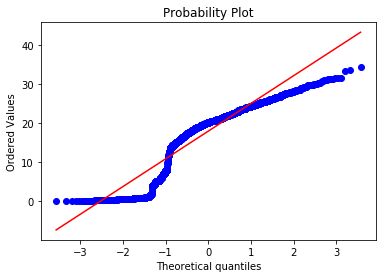

In [21]:
#getting a Q-Q plot for normality of thc content

stats.probplot(all_canna_sample_data_variant_mapped_list_lab_data_red['total_thc'], dist="norm", plot = plt);
plt.show();

From the above it looks like there is a near normal distribution of the total THC content across the samples.

## Defining the x and y data

My X data, or features, are the variants that exist in the genome. As it stands they are a string list of the variants, these are to be later converted into counts of each variant using a count vectorizer.

The y data, or target, is the total thc content (% by weight) that you would find in the flower resulting from the plant with that specific genome.

In [11]:
X_variants = all_canna_sample_data_variant_mapped_list_lab_data_red['mapped_variant']

In [12]:
y_thc = all_canna_sample_data_variant_mapped_list_lab_data_red['total_thc']

### Train Test Split

The first thing to do with this defined X and y data is to create a train and test split, the train set is to be used to train the models to learn the features (variant counts) which affect the total thc content in the flower from the plant with that genome with those variants.

The test set is treated as new unseen data, as you would collect from experimentation, which is run through the models to determine their accuracy in predicting the THC content of the flower from the plant with those variants in the genome

In [13]:
X_train_thc, X_test_thc, y_train_thc, y_test_thc = train_test_split(X_variants, y_thc, test_size = .2, random_state = 42)

## Count Vectorize

The variants for each sample are stored as a list of the the variants, separated by', ', and need to be tokenized and counted for each sample using the count vectorizer.

Initially i want to look at all the variants which exist, so no min_df value is set.

In [25]:
# using the count vectorizer to get the counts of the vairants
# 1. Instantiate 
bagofvariants = CountVectorizer(tokenizer=lambda x: x.split(', '))

# 2. Fit 
bagofvariants.fit(X_train_thc)

# 3. Transform the train set
X_train_thc_bov = bagofvariants.transform(X_train_thc)


#transform the test set
X_test_thc_bov = bagofvariants.transform(X_test_thc)




C:\Users\danie\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [26]:
#looking at the shape
X_train_thc_bov.shape

(3077, 94614)

From the above i can see that there 94,614 unique variants, thats 94,614 features to account for by the 3077 samples, thats 30 times the number of samples, ideally we want as few features and as many samples as possible to build a robust model and avoid overfitting.

What i expect is that with the high varaince, the models will over fit to the noise, and won't be able to learn the features which are actually important, affecting the model performance.

One of the first things i want to do is see if i can bring the number of features by looking at the effect of the min_df parameter in the count vectorization, and its effect on the models scores.

# Model Selection

My choices for the models come from a variety of hypothesized relationships between the number of each variant to the total THC content:

Linear regression - linear relationship between the number of certain variants in the genome, to the total THC content

Decision Tree Regressor - being above or below a certain threshold in the amount of certian variants determines the total THC

Random Forest Regressor  - to continue to explore this threshold relationship while taking advantage its ability to improve feature importance determination, reducing the effect of noise in the data, which I expected to have as there are so many variants. Random forest reduces the effects of outliers as well.

K-neighbors regressors - the relationship between the count of the variants to the THC content is more complex and it is better to compare strain to strain to predict the THC content

Support Vector Regressor - already saw we have some clusters in the thc vs frequency of variants, is it possible some strains are clustered the counts of certain variants, and can we use boundaries between them to determine the THC content



# Model Evaluation

When it comes to evaluating the continous regressors the most commonly used value to evaluate the model is the $R^2$ value, which is the proportion of the total variation of the variance in the dependent variable (total thc in this case) that is predictable from the independent variables (counts of each variant in this case). It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. The closer to 1 the better.

Another means to evaluate the models is to use RMSE, root mean square error (RMSE) this parameter indicates the standard deviation of the residuals or how far the points are from the regression or modelled line.  It tells you how concentrated the data is around the line of best fit.

$$RMSE = SQRT(1-R^2SD_y)$$

It is related to the $R^2$ value and the standard deviation of the target. Both parameters are important, and depend on each other in the above equation.

What i am aiming for is an $R^2$ value that is close to 1, and a low RMSE.

RMSE is also the standard error, and the predicted values can be given using y = y+- 1.96*RMSE, to present the predictions with a 95% confidence interval

## Scaling the counts of the variants and thc values

Since some of my models are distance based, I want to scale the data so that there isn't any over powering of the distances of some features on others.

In [27]:
standard_scaler = StandardScaler(with_mean = False)

X_train_thc_bov_ss = standard_scaler.fit_transform(X_train_thc_bov)

In [28]:
X_test_thc_bov_ss = standard_scaler.transform(X_test_thc_bov)

## Exploring the number of mutations of each type in the train set, and their correlation to the THC content

Since I hypothesized that there might be a linear relationship between the variant counts and the total THC content, it would be a good idea to explore the actual correlation between the two.

Here i get the correlation of each count of the variant to the total THC, to see if there are any large correlations between them.

In [30]:
#Creating a dataframe to store the variant counts

variant_counts = pd.DataFrame(bagofvariants.get_feature_names(), columns = ['variant'])

In [31]:
#getting the total number of variant counts accross all samples

variant_counts['count'] = X_train_thc_bov.sum(axis = 0).T

In [32]:
#getting the average amount across all samples

variant_counts['avg_count'] = X_train_thc_bov.mean(axis = 0).T

In [33]:
#checking the new dataframe
variant_counts.head()

,variant,count,avg_count
0,type_10001313,1439,0.467663
1,type_10002301,14,0.004550
2,type_1000240,94,0.030549
3,type_10002976,4,0.001300
4,type_10003073,18,0.005850


In [34]:
#looking at the summary statistics

variant_counts.describe()

,count,avg_count
count,94614.000000,94614.000000
mean,137.885715,0.044812
std,465.812851,0.151385
min,1.000000,0.000325
25%,2.000000,0.000650
50%,9.000000,0.002925
75%,27.000000,0.008775
max,3053.000000,0.992200


A variant on average appears in 4% of the genome samples, and there are some variants which appear in 99% of the genomes.

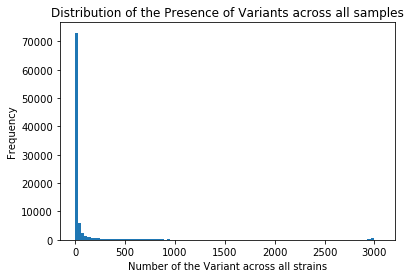

In [35]:
#distribution of the count of the variants, x is the total count of a variant across all samples, 
#and y is the frequency in which a variant has that count across all samples
plt.figure()
plt.hist(variant_counts['count'], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Number of the Variant across all strains')
plt.title('Distribution of the Presence of Variants across all samples')
plt.show()

So what it looks like is that most variants appear very infrequently across all the samples, and there are variants that appear more frequently across all strains, but there aren't very many of these variants.

Lets see how many variants only appear once across all the samples.

In [36]:
#There are 17,848 variants that appear only once across all the samples.

variant_counts.query('count == 1').shape

(17848, 3)

17,848 variants only appear once across all the samples, and this is about 20% of the variants which exist.

I want to look at the correlation next, and see if there is some sort of linear relationship between the number of each variant, and the THC content. I will look at the count of each variant and its correlation with the THC content.

In [37]:
#getting each variants types correlation to the thc amount

variant_thc_correlation = pd.DataFrame(columns = ['variant', 'correlation'])

for i in range(0, X_train_thc_bov.shape[1]):
    
            print(f'working on {i} of {X_train_thc_bov.shape[1]-1}', end = '\r')
            
            temp_df = pd.DataFrame({'variant': [variant_counts['variant'][i]],\
                                     'correlation' : [(np.corrcoef(pd.Series(X_train_thc_bov[:,i].toarray().T[0]), y_train_thc)[0][1])]})
            
            variant_thc_correlation = variant_thc_correlation.append(temp_df)

In [38]:
#inspecting the new df
variant_thc_correlation.head()

,variant,correlation
0,type_10001313,0.134926
0,type_10002301,0.005460
0,type_1000240,0.055156
0,type_10002976,0.026581
0,type_10003073,-0.160789


In [39]:
#reseting the index
variant_thc_correlation.reset_index(drop = True, inplace = True)

In [40]:
#getting a summary

variant_thc_correlation.describe()

,correlation
count,94614.000000
mean,0.003526
std,0.066249
min,-0.690107
25%,-0.006761
50%,0.006770
75%,0.019542
max,0.596973


So it is apparant of the variants that exist, there are some that have a a higher positive correaltion (max of 0.57) and a lower negative correlation (min -0.66) of their counts with the THC content, but on average there is a low linear correlation between the number of a variant in the sample, and its resulting THC content.

In [63]:
# looking at the top 30 correlation variants
variant_thc_correlation.sort_values('correlation', ascending = False).head(30)

,variant,correlation
87789,type_457071,0.596973
502,type_10295961,0.582894
83382,type_199652,0.580420
93327,type_922563,0.578213
505,type_10298187,0.574621
88817,type_530525,0.573582
91478,type_756522,0.567175
92530,type_8657790,0.567077
90937,type_7051612,0.557626
84679,type_2665884,0.557044


In [64]:
#looking at the bottom 30 variants
variant_thc_correlation.sort_values('correlation').head(30)

,variant,correlation
85340,type_2996091,-0.690107
85568,type_3128566,-0.660053
16255,type_11590389,-0.658160
5142,type_11577763,-0.653909
85239,type_2924965,-0.646133
13851,type_11587395,-0.606852
24364,type_11600643,-0.599933
28945,type_11607453,-0.595370
28981,type_11607569,-0.595370
10843,type_11583759,-0.578648


From the above i can see that there are quite a few variants which have a positive and negative correlation with the THC content. 

Next want to see how many variants have an above average correlation:

In [43]:
#checking to see how many variants have an average or above average correlation with the THC content

(np.abs(variant_thc_correlation['correlation']) >= np.abs(variant_thc_correlation['correlation']).mean()).sum()

27245

In [44]:
#getting the total number of variants
len(variant_thc_correlation['variant'])

94614

In [45]:
#getting the percentage of variants which have a average or above average correlation to THC

(np.abs(variant_thc_correlation['correlation']) > np.abs(variant_thc_correlation['correlation']).mean()).sum()\
/len(variant_thc_correlation['variant']) 

0.2879594985942884

So only 27,245 variants seem to have an average or above average negative or positive correalation, thats 28% of the variants.

I can also look at the distribution of the correlations as well to see how many of the variants have some sort of negative of positive correlation of the thier counts to the THC content

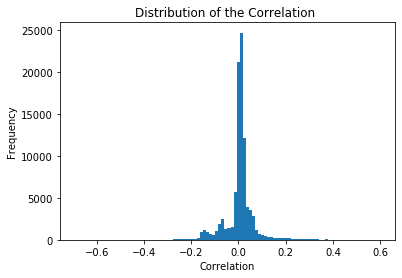

In [46]:
#Distribution of the counts
plt.figure()
plt.hist(variant_thc_correlation['correlation'], bins = 100)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of the Correlation ')
plt.show()

It is apparent that most of the variants don't have a positve or negative correlation in their counts to the THC content, but there still are a few which have an average or above average correlation.

Now i will merge this correlation data with the total variant count data to be able to explore if it is higher appearing variants which have more of a correlation with the THC content.

In [47]:
#merging the variant count data with the correlation data
variant_count_thc_correlation = variant_thc_correlation.merge(variant_counts, how = 'inner', on = 'variant')

In [48]:
#inspecting the new dataframe
variant_count_thc_correlation

,variant,correlation,count,avg_count
0,type_10001313,0.134926,1439,0.467663
1,type_10002301,0.005460,14,0.004550
2,type_1000240,0.055156,94,0.030549
3,type_10002976,0.026581,4,0.001300
4,type_10003073,-0.160789,18,0.005850
...,...,...,...,...
94609,type_9994785,-0.005214,1,0.000325
94610,type_9995820,-0.001035,12,0.003900
94611,type_9997296,0.004507,2,0.000650
94612,type_9997602,0.012565,12,0.003900


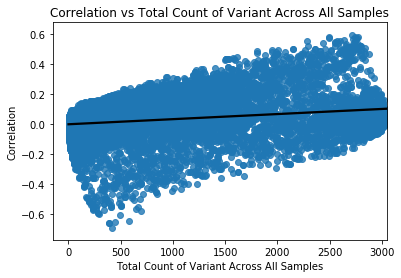

In [49]:
#Plotting the correlation to total count of the variant across all variants information
plt.figure()
sns.regplot(variant_count_thc_correlation['count'], variant_count_thc_correlation['correlation'], line_kws={'color': 'black'})
plt.xlabel('Total Count of Variant Across All Samples')
plt.ylabel('Correlation')
plt.title('Correlation vs Total Count of Variant Across All Samples')
plt.show()


From the seaborn regplot there doesn't seem to be a direct linear relationship betwen the total count of the variant, and the correlation, this linear regression line may be flat due to the fact that most variants have a near zero correlation with the THC based on their counts.

Although there does seem to be a general upward linear trend for the number of variants to the correlation, so possibly for some variants the appearance and the number that the sample has of the variant, will have an effect on the THC content.

In conclusion, there are some variants that appear more than others across the samples which have a possitive correlation with the THC content, and some variants which appear less that have a negative correlation with the THC content. But most variants have no real correlation with the THC content.

# Initial Modelling

Here im just trying to see how the selected models perform with all the variants the in training data.

## Making a Data Frame to store initial Model results

In [101]:
model_results = pd.DataFrame(columns = ['model', 'train_score_r2', 'test_score_r2', 'train_score_rmse', 'test_score_rmse'])

In [77]:
model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse


## Linear Regression (non scaled data)

In [69]:
# 1. Instantiate the model
cv_linear_regression_model = LinearRegression()

# 2. Fit the model
cv_linear_regression_model.fit(X_train_thc_bov, y_train_thc)

# 3. Scoring the model
cvLR_train_score = cv_linear_regression_model.score(X_train_thc_bov, y_train_thc)
cvLR_test_score = cv_linear_regression_model.score(X_test_thc_bov, y_test_thc)
cvLR_RMSE_train = mean_squared_error(y_train_thc, cv_linear_regression_model.predict(X_train_thc_bov),squared = False)
cvLR_RMSE_test = mean_squared_error(y_test_thc, cv_linear_regression_model.predict(X_test_thc_bov),squared = False)

# Print the score
print(f'Linear Regression Train set R2 {cvLR_train_score}')
print(f'Linear Regression Test set R2 {cvLR_test_score}')
print(f'Linear Regression Train set RMSE {cvLR_RMSE_train}')
print(f'Linear Regression Test set RMSE {cvLR_RMSE_test}')

Linear Regression Train set R2 0.7754057374832828
Linear Regression Test set R2 0.6358676405352974
Linear Regression Train set RMSE 3.575408236499879
Linear Regression Test set RMSE 4.723756027737488


Even though we saw that most of the variant counts do not have a strong correlation to the THC content, the Linear regression still performed well.

In [102]:
#adding the model results to the data frame

model_results = model_results.append(pd.DataFrame({"model":['Linear Regression'],
                                  "train_score_r2":[cvLR_train_score],
                                  "test_score_r2":[cvLR_test_score],
                                   "train_score_rmse":[cvLR_RMSE_train],
                                   "test_score_rmse":[cvLR_RMSE_test]}))

In [79]:
#checking the addition

model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756


In [72]:
#Extracting the coefficients of the linear regression

cv_linear_regression_variable_coef = pd.DataFrame()

cv_linear_regression_variable_coef['variant'] = bagofvariants.get_feature_names()
cv_linear_regression_variable_coef['coefficient'] = cv_linear_regression_model.coef_

In [73]:
#looking at the the top coefficients and lowest coefficient

cv_linear_regression_variable_coef.sort_values('coefficient', ascending = False)

,variant,coefficient
6760,type_11579474,0.118122
3833,type_11576326,0.113665
4461,type_11577008,0.103765
5202,type_11577827,0.102876
93342,type_9235131,0.102753
...,...,...
7764,type_11580482,-0.102374
3984,type_11576492,-0.107049
2782,type_11575174,-0.116415
2859,type_11575262,-0.117442


The coefficients are not substantially large, for the variant with the largest coefficeint, an increase of 1 of that variant in the genome only increases the THC content by 0.118%.

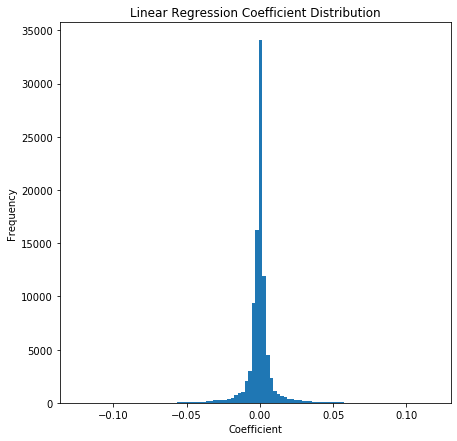

In [98]:
# looking at the distribution of the coeficients

plt.figure(figsize = (7,7))
plt.hist(cv_linear_regression_variable_coef['coefficient'], bins = 100)
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.title('Linear Regression Coefficient Distribution')
plt.show()

I can see that most of the coefficients are zero, or close to it, so i need to refine which variants are actually in the model, seems as though i'm fitting to a lot of noise.

## Linear regression on scaled Data

In [75]:
# 1. Instantiate the model
cv_linear_regression_model_ss = LinearRegression()

# 2. Fit the model
cv_linear_regression_model_ss.fit(X_train_thc_bov_ss, y_train_thc)

cvss_LR_train_score = cv_linear_regression_model_ss.score(X_train_thc_bov_ss, y_train_thc)
cvss_LR_test_score = cv_linear_regression_model_ss.score(X_test_thc_bov_ss, y_test_thc)
cvss_LR_RMSE_train = mean_squared_error(y_train_thc, cv_linear_regression_model_ss.predict(X_train_thc_bov_ss),squared = False)
cvss_LR_RMSE_test = mean_squared_error(y_test_thc, cv_linear_regression_model_ss.predict(X_test_thc_bov_ss),squared = False)

# 3. Scoring the model
print(f' Train set R2 {cvss_LR_train_score}')
print(f' Test set R2 {cvss_LR_test_score}')
print(f' Train set RMSE {cvss_LR_RMSE_train}')
print(f' Test set RMSE {cvss_LR_RMSE_test}')

 Train set R2 0.775405737483315
 Test set R2 0.6336471081190653
 Train set RMSE 3.5754082364996234
 Test set RMSE 4.738137214188841


Using the scaled data we actually see a slight decrease in the models performance on the test set.

In [103]:
#adding the model results to the data frame

model_results = model_results.append(pd.DataFrame({"model":['Linear Regression Scaled'],
                                  "train_score_r2":[cvss_LR_train_score],
                                  "test_score_r2":[cvss_LR_test_score],                                   
                                  "train_score_rmse":[cvss_LR_RMSE_train],
                                   "test_score_rmse":[cvss_LR_RMSE_test]}),
                                    ignore_index = True)

In [104]:
#checking the addition

model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Linear Regression Scaled,0.775406,0.633647,3.575408,4.738137


## Decision Tree Regressor (non scaled data)

In [82]:
#instantiate
cv_DTmodel = DecisionTreeRegressor()

#fit
cv_DTmodel.fit(X_train_thc_bov, y_train_thc)

#score
cv_DTmodel_train_score = cv_DTmodel.score(X_train_thc_bov, y_train_thc)
cv_DTmodel_test_score = cv_DTmodel.score(X_test_thc_bov, y_test_thc)
cv_DT_RMSE_train = mean_squared_error(y_train_thc, cv_DTmodel.predict(X_train_thc_bov),squared = False)
cv_DT_RMSE_test = mean_squared_error(y_test_thc, cv_DTmodel.predict(X_test_thc_bov),squared = False)

#print the resuts
print(f"DT R^2 score on training set: {cv_DTmodel_train_score}")
print(f"DT R^2 score on test set: {cv_DTmodel_test_score}")
print(f'DT Train set RMSE {cv_DT_RMSE_train}')
print(f'DT Test set RMSE {cv_DT_RMSE_test}')

DT R^2 score on training set: 0.7754057374833198
DT R^2 score on test set: 0.6300761353003176
DT Train set RMSE 3.575408236499585
DT Test set RMSE 4.761173374908537


In [91]:
#adding the model results to the data frame

model_results = model_results.append(pd.DataFrame({"model":['Decision Tree Regressor'],
                                                  "train_score_r2":[cv_DTmodel_train_score],
                                                  "test_score_r2":[cv_DTmodel_test_score],                                   
                                                  "train_score_rmse":[cv_DT_RMSE_train],
                                                    "test_score_rmse":[cv_DT_RMSE_test]}),
                                                    ignore_index = True)

In [92]:
#checking the addition
model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Decision Tree Regressor,0.775406,0.630076,3.575408,4.761173


The decision tree performs slightly worse on the test than the linear regression.

## Random Forest Regressor (non scaled data)

In [85]:
#instantiate
cv_RFRmodel = RandomForestRegressor(n_jobs = -1)

#fit
cv_RFRmodel.fit(X_train_thc_bov, y_train_thc)

#score
cv_RFRmodel_train_score = cv_RFRmodel.score(X_train_thc_bov, y_train_thc)
cv_RFRmodel_test_score = cv_RFRmodel.score(X_test_thc_bov, y_test_thc)
cv_RFR_RMSE_train = mean_squared_error(y_train_thc, cv_RFRmodel.predict(X_train_thc_bov),squared = False)
cv_RFR_RMSE_test = mean_squared_error(y_test_thc, cv_RFRmodel.predict(X_test_thc_bov),squared = False)

#print results
print(f"RFR R^2 score on training set: {cv_RFRmodel_train_score}")
print(f"RFR R^2 score on test set: {cv_RFRmodel_test_score}")
print(f'RFR Train set RMSE {cv_RFR_RMSE_train}')
print(f'RFR Test set RMSE {cv_RFR_RMSE_test}')

RFR R^2 score on training set: 0.771760715339487
RFR R^2 score on test set: 0.6541431967632692
RFR Train set RMSE 3.6043047669883115
RFR Test set RMSE 4.603689059129004


In [105]:
#adding the model results to the data frame
model_results = model_results.append(pd.DataFrame({"model":['Random Forrest Regressor'],
                                                  "train_score_r2":[cv_RFRmodel_train_score],
                                                  "test_score_r2":[cv_RFRmodel_test_score],                                   
                                                  "train_score_rmse":[cv_RFR_RMSE_train],
                                                    "test_score_rmse":[cv_RFR_RMSE_test]}),
                                                    ignore_index = True)

In [106]:
#checking the addition

model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Linear Regression Scaled,0.775406,0.633647,3.575408,4.738137
2,Random Forrest Regressor,0.771761,0.654143,3.604305,4.603689


So far the random forrest is the best performing model.

## KNeighbors Regressor (scaled data)

In [88]:
#instantiate
cv_KNRmodel_ss = KNeighborsRegressor()

#fit
cv_KNRmodel_ss.fit(X_train_thc_bov_ss, y_train_thc)

#score
cvss_KNR_train_score = cv_KNRmodel_ss.score(X_train_thc_bov_ss, y_train_thc)
cvss_KNR_test_score = cv_KNRmodel_ss.score(X_test_thc_bov_ss, y_test_thc)
cvss_KNR_RMSE_train = mean_squared_error(y_train_thc, cv_KNRmodel_ss.predict(X_train_thc_bov_ss),squared = False)
cvss_KNR_RMSE_test = mean_squared_error(y_test_thc, cv_KNRmodel_ss.predict(X_test_thc_bov_ss),squared = False)

#Print Results
print(f' KNRmodel Train set R2 {cvss_KNR_train_score}')
print(f' KNRmodel Test set R2 {cvss_KNR_test_score}')
print(f' KNRmodel Train set RMSE {cvss_KNR_RMSE_train}')
print(f' KNRmodel Test set RMSE {cvss_KNR_RMSE_test}')

 KNRmodel Train set R2 0.7123592872569926
 KNRmodel Test set R2 0.6407590051909366
 KNRmodel Train set RMSE 4.046238569935772
 KNRmodel Test set RMSE 4.6919218165339815


In [107]:
#adding the model results to the data frame
model_results = model_results.append(pd.DataFrame({"model":['K-neighbors Regressor'],
                                  "train_score_r2":[cvss_KNR_train_score],
                                  "test_score_r2":[cvss_KNR_test_score],                                   
                                  "train_score_rmse":[cvss_KNR_RMSE_train],
                                    "test_score_rmse":[cvss_KNR_RMSE_test]}),
                                    ignore_index = True)

In [108]:
#checking the addition
model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Linear Regression Scaled,0.775406,0.633647,3.575408,4.738137
2,Random Forrest Regressor,0.771761,0.654143,3.604305,4.603689
3,K-neighbors Regressor,0.712359,0.640759,4.046239,4.691922


KNR is a close second to the Random Forrest Regressor in terms of performance

### SVR (scaled data)

In [109]:
#Running SVR with various kernels to see whats best

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

ss_SVR_train_score = []
ss_SVR_test_score = []
ss_SVR_train_RMSE = []
ss_SVR_test_RMSE = []

for kernel_i in kernels:
    
    print(f'working on {kernel_i}')
    ss_SVRmodel = SVR(kernel = f'{kernel_i}')
   
    print('fitting')
    ss_SVRmodel.fit(X_train_thc_bov_ss, y_train_thc)
    
    print('scoring')

    ss_SVR_train_score.append(ss_SVRmodel.score(X_train_thc_bov_ss, y_train_thc))
    ss_SVR_test_score.append(ss_SVRmodel.score(X_test_thc_bov_ss, y_test_thc))
    
    ss_SVR_train_RMSE.append(mean_squared_error(y_train_thc, ss_SVRmodel.predict(X_train_thc_bov_ss),squared = False))
    ss_SVR_test_RMSE.append(mean_squared_error(y_test_thc, ss_SVRmodel.predict(X_test_thc_bov_ss),squared = False))

working on linear
fitting
scoring
working on poly
fitting
scoring
working on rbf
fitting
scoring
working on sigmoid
fitting
scoring


In [110]:
#adding the model results to the data frame
model_results = model_results.append(pd.DataFrame({"model":['SVR linear'],
                                                  "train_score_r2":[ss_SVR_train_score[0]],
                                                  "test_score_r2":[ss_SVR_test_score[0]],                                   
                                                  "train_score_rmse":[ss_SVR_train_RMSE[0]],
                                                    "test_score_rmse":[ss_SVR_test_RMSE[0]]}),
                                                    ignore_index = True)

In [111]:
#adding the model results to the data frame
model_results = model_results.append(pd.DataFrame({"model":['SVR poly'],
                                                  "train_score_r2":[ss_SVR_train_score[1]],
                                                  "test_score_r2":[ss_SVR_test_score[1]],                                   
                                                  "train_score_rmse":[ss_SVR_train_RMSE[1]],
                                                  "test_score_rmse":[ss_SVR_test_RMSE[1]]}),
                                                    ignore_index = True)

In [112]:
#adding the model results to the data frame
model_results = model_results.append(pd.DataFrame({"model":['SVR rbf'],
                                                  "train_score_r2":[ss_SVR_train_score[2]],
                                                  "test_score_r2":[ss_SVR_test_score[2]],                                   
                                                  "train_score_rmse":[ss_SVR_train_RMSE[2]],
                                                    "test_score_rmse":[ss_SVR_test_RMSE[2]]}),
                                                    ignore_index = True)

In [113]:
#adding the model results to the data frame
model_results = model_results.append(pd.DataFrame({"model":['SVR sigmoid'],
                                                  "train_score_r2":[ss_SVR_train_score[3]],
                                                  "test_score_r2":[ss_SVR_test_score[3]],                                   
                                                  "train_score_rmse":[ss_SVR_train_RMSE[3]],
                                                   "test_score_rmse":[ss_SVR_test_RMSE[3]]}),
                                                    ignore_index = True)

In [114]:
#checking the addition
model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Linear Regression Scaled,0.775406,0.633647,3.575408,4.738137
2,Random Forrest Regressor,0.771761,0.654143,3.604305,4.603689
3,K-neighbors Regressor,0.712359,0.640759,4.046239,4.691922
4,SVR linear,0.750568,0.619211,3.767930,4.830587
5,SVR poly,0.414578,0.362509,5.772457,6.250212
6,SVR rbf,0.617278,0.563122,4.667324,5.174134
7,SVR sigmoid,0.529112,0.490768,5.177083,5.586190


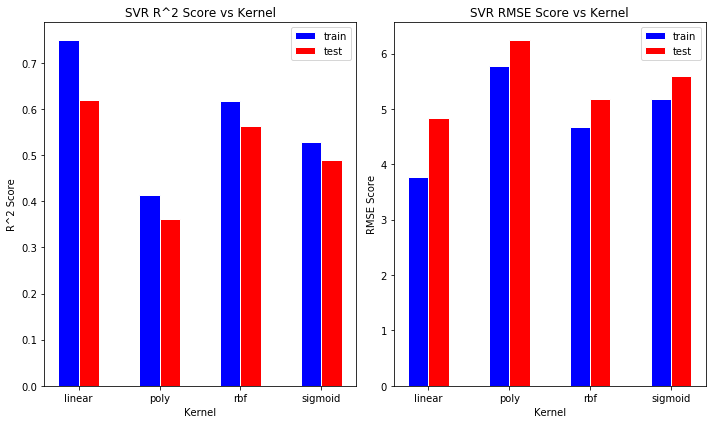

In [125]:
#Plotting SVR kernel R^2 and RMSE  results
plt.subplots(1,2,figsize=(10,6))

plt.subplot(1,2,1)
# set width of bar
barWidth = 0.25
 
# set height of bar
train= ss_SVR_train_score
test= ss_SVR_test_score

# Set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, test, color='r', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Kernel')
plt.ylabel('R^2 Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],kernels)
plt.title('SVR R^2 Score vs Kernel')


# Create legend
plt.legend()


plt.subplot(1,2,2)
# set width of bar
barWidth = 0.25
 
# set height of bar
train= ss_SVR_train_RMSE
test= ss_SVR_test_RMSE

# Set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, test, color='r', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Kernel')
plt.ylabel('RMSE Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],kernels)
plt.title('SVR RMSE Score vs Kernel')

 
# Create legend
plt.legend()

#show the graphs
plt.tight_layout()
plt.show()

In [122]:
#checking the scores
model_results

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Linear Regression Scaled,0.775406,0.633647,3.575408,4.738137
2,Random Forrest Regressor,0.771761,0.654143,3.604305,4.603689
3,K-neighbors Regressor,0.712359,0.640759,4.046239,4.691922
4,SVR linear,0.750568,0.619211,3.767930,4.830587
5,SVR poly,0.414578,0.362509,5.772457,6.250212
6,SVR rbf,0.617278,0.563122,4.667324,5.174134
7,SVR sigmoid,0.529112,0.490768,5.177083,5.586190


From the SVR scores it is obvious that the linear kernel works best, and SVR poly is the worst performing model so far.

### Plotting the Test Scores vs min_df


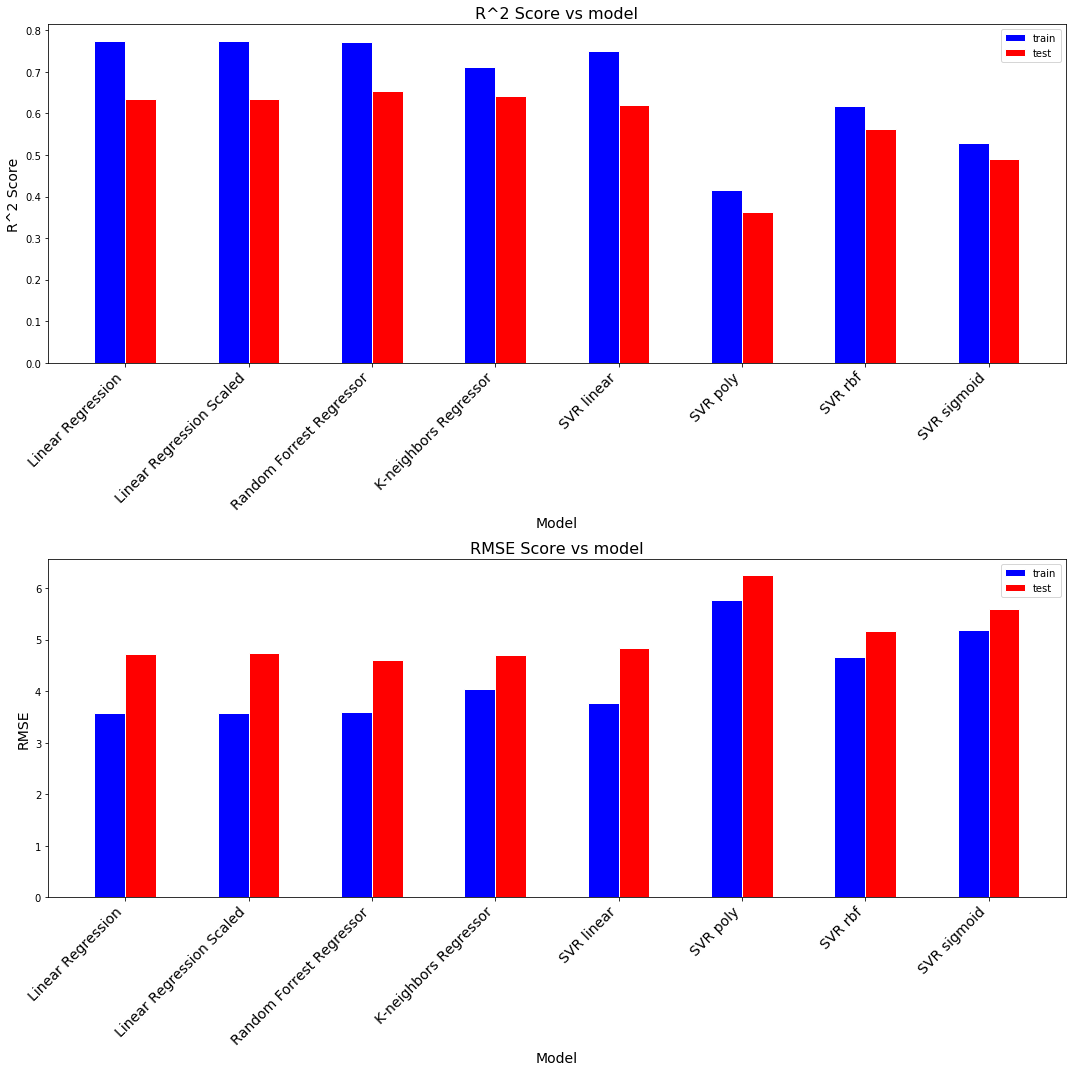

In [134]:
#Plotting model R^2  and the RMSE results

plt.subplots(2,1,figsize=(15, 15))

plt.subplot(2,1,1) #R^2
# set width of bar
barWidth = 0.25
 
# set height of bar
train= model_results['train_score_r2']
test= model_results['test_score_r2']

# Set position of bar on X axis
r1 = np.arange(len(model_results['model']))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, test, color='r', width=barWidth, edgecolor='white', label='test')
 
# Add xticks on the middle of the group bars
plt.xlabel('Model', fontsize = 14)
plt.ylabel('R^2 Score', fontsize = 14)
plt.xticks([r + barWidth/2 for r in range(len(model_results['model']))],\
           model_results['model'], rotation = 45, horizontalalignment='right',fontsize = 14)
plt.title('R^2 Score vs model', fontsize = 16)

# Create legend
plt.legend(fontsize = 12)

plt.subplot(2,1,2) #RMSE
# set width of bar
barWidth = 0.25
 
# set height of bar
train= model_results['train_score_rmse']
test= model_results['test_score_rmse']

# Set position of bar on X axis
r1 = np.arange(len(model_results['model']))
rmse = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(rmse, test, color='r', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Model', fontsize = 14)
plt.ylabel('RMSE', fontsize = 14)
plt.xticks([r + barWidth/2 for r in range(len(model_results['model']))],\
           model_results['model'], rotation = 45, horizontalalignment='right',fontsize = 14)
plt.title('RMSE Score vs model', fontsize = 16)

 # Create legend & Show graphic
plt.legend(fontsize = 12)


plt.tight_layout()
plt.show()

In [137]:
#Displaying the model scores, sorting by test R^2
model_results.sort_values('test_score_r2', ascending = False)

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
2,Random Forrest Regressor,0.771761,0.654143,3.604305,4.603689
3,K-neighbors Regressor,0.712359,0.640759,4.046239,4.691922
0,Linear Regression,0.775406,0.635868,3.575408,4.723756
1,Linear Regression Scaled,0.775406,0.633647,3.575408,4.738137
4,SVR linear,0.750568,0.619211,3.767930,4.830587
6,SVR rbf,0.617278,0.563122,4.667324,5.174134
7,SVR sigmoid,0.529112,0.490768,5.177083,5.586190
5,SVR poly,0.414578,0.362509,5.772457,6.250212


Here we can see the ranking of the different models based on the test $R^2$ values, with the Random Forrest Regressor performin the best, with a test $R^2$ value of 0.65, and a test RMSE of 4.6

# Effects of the min_df Term of the Count Vectorization Vectorizers

Earlier on I mentioned this notion that the number of features exceeds the number of observations substatially, which introduces a high variance in the models as they fit to over 90,000 features, with only ~3000 samples

Here i want to explore the min_df parameter in the count vectorization, and its effect on the train and test score, if i can reduce the variance in the model by decreasing the features included in the analysis, and improve the models performance.

From the analysis above for the correlation and linear regression i saw that very few (20%) of the variants have a correlation above average on the THC content, and those with a high positive correlation appear in a lot of the genetic samples. So i should be able to focus on the variants that appear frequently, as they the have a high correlation to the THC content, for the rest of my analysis. I will be missing out on the variants that appear infrequently and have a high negative correlation on the THC content by utilizing this method. Possibly I could Use TF-IDF vectorization to take into acount, and put more importance on those variants that appear infrequently that have a high negative correlation on the THC content.

In [138]:
#min df values to test, they are percentages of the documents in this case rather than minimum amounts, 
#that the variants have to appear in.
min_df_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [188]:
# setting up a data frame to collect the test score results

cv_model_test_score_mindf = pd.DataFrame()
cv_model_test_RMSE_mindf = pd.DataFrame()

#i will add the column names later, its easier to append the 
#lists of scores without having to specify the column names for now

## Linear Regression

In [141]:
#creating lists to store the results
cv_LR_train_score = []
cv_LR_test_score = []
cv_LR_RMSE_train = []
cv_LR_RMSE_test = []


#creating a for loop to go through all the min_df values

for mindf in min_df_values:
    
    print(f'working on min_df {mindf}', end = '\r')

        
    #using a pipe to easy perform the count vecotriazation, and run the linear regression on the data
    cv_LR = [('count_vectorize', CountVectorizer(min_df = mindf, tokenizer=lambda x: x.split(', '))),
             ('linear_reg', LinearRegression())]

    cv_LR_pipe = Pipeline(cv_LR)
    
    
    #fitting the model
    cv_LR_pipe.fit(X_train_thc, y_train_thc)
    
    #getting the scores
    cv_LR_train_score.append(cv_LR_pipe.score(X_train_thc, y_train_thc))
    cv_LR_test_score.append(cv_LR_pipe.score(X_test_thc, y_test_thc))  
    cv_LR_RMSE_train.append(mean_squared_error(y_train_thc, cv_LR_pipe.predict(X_train_thc),squared = False))
    cv_LR_RMSE_test.append(mean_squared_error(y_test_thc, cv_LR_pipe.predict(X_test_thc),squared = False))

In [189]:
#adding the min_df results to the dataframe with all the results
score_list = cv_LR_test_score.copy()
score_list.insert(0, 'Linear Regression')

cv_model_test_score_mindf = cv_model_test_score_mindf.append([score_list])
cv_model_test_score_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,0.629021,0.628528,0.628116,0.629086,0.631268,0.630867,0.628564,0.62719,0.622913,0.616858,0.498656,-0.011922


In [190]:
#adding the min_df results to the dataframe with all the results
RMSE_score_list = cv_LR_RMSE_test.copy()
RMSE_score_list.insert(0, 'Linear Regression')

cv_model_test_RMSE_mindf = cv_model_test_RMSE_mindf.append([RMSE_score_list])
cv_model_test_RMSE_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,4.767962,4.771128,4.773774,4.767539,4.7535,4.756083,4.770891,4.77971,4.807052,4.845487,5.542753,7.87465


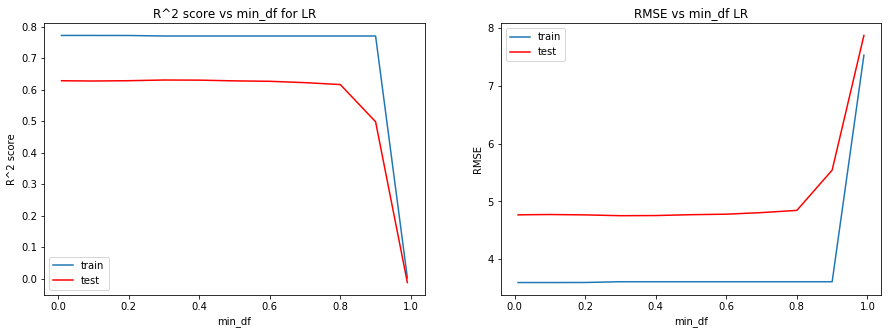

In [148]:
#Plotting the R^2 and RMSE score vs the min_df value for the model 
plt.subplots(1,2, figsize = (15, 5))

plt.subplot(1,2,1) #R^2
plt.plot(min_df_values, cv_LR_train_score, label = 'train')
plt.plot(min_df_values, cv_LR_test_score, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_df for LR')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(min_df_values, cv_LR_RMSE_train, label = 'train')
plt.plot(min_df_values, cv_LR_RMSE_test, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('RMSE')
plt.title('RMSE vs min_df LR')
plt.legend()


plt.show()

It is apparent that the variants which appear in 80% of the samples have the most effect on the scores, and below that we lose the information which allows us to fit the model with good results, and above that there is no improvement. 80% of the documents for the min_df seems to be the magic number, where we have enough information to fit the model well, without getting more of unessecary information from the other variants which do not affect the model.

## Decision Tree

In [149]:
#creating lists to store the results

cv_DT_train_score = []
cv_DT_test_score = []
cv_DT_RMSE_train = []
cv_DT_RMSE_test = []

#creating a for loop to go through all the min_df values
for mindf in min_df_values:
    
    print(f'working on min_df {mindf}', end = '\r')

    #using a pipe to easy perform the count vecotriazation, and run the model on the data
    cv_DT = [('count_vectorize', CountVectorizer(min_df = mindf, tokenizer=lambda x: x.split(', '))),
             ('decision tree', DecisionTreeRegressor())]

    cv_DT_pipe = Pipeline(cv_DT)

    #fitting the model
    cv_DT_pipe.fit(X_train_thc, y_train_thc)
    
    
    #getting the scores
    cv_DT_train_score.append(cv_DT_pipe.score(X_train_thc, y_train_thc))
    cv_DT_test_score.append(cv_DT_pipe.score(X_test_thc, y_test_thc))
    cv_DT_RMSE_train.append(mean_squared_error(y_train_thc, cv_DT_pipe.predict(X_train_thc),squared = False))
    cv_DT_RMSE_test.append(mean_squared_error(y_test_thc, cv_DT_pipe.predict(X_test_thc),squared = False))

In [191]:
#adding the min_df results to the dataframe with all the results
score_list = cv_DT_test_score.copy()
score_list.insert(0, 'Decision Tree Regressor')

cv_model_test_score_mindf = cv_model_test_score_mindf.append([score_list])
cv_model_test_score_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,0.629021,0.628528,0.628116,0.629086,0.631268,0.630867,0.628564,0.627190,0.622913,0.616858,0.498656,-0.011922
0,Decision Tree Regressor,0.620295,0.615824,0.611227,0.614376,0.619273,0.614960,0.614404,0.623511,0.625895,0.624523,0.626306,-0.012495


In [192]:
#adding the min_df results to the dataframe with all the results
RMSE_score_list = cv_DT_RMSE_test.copy()
RMSE_score_list.insert(0, 'Decision Tree Regressor')

cv_model_test_RMSE_mindf = cv_model_test_RMSE_mindf.append([RMSE_score_list])
cv_model_test_RMSE_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,4.767962,4.771128,4.773774,4.767539,4.753500,4.756083,4.770891,4.779710,4.807052,4.845487,5.542753,7.874650
0,Decision Tree Regressor,4.823708,4.852022,4.880964,4.861156,4.830195,4.857479,4.860985,4.803237,4.788002,4.796778,4.785372,7.876881


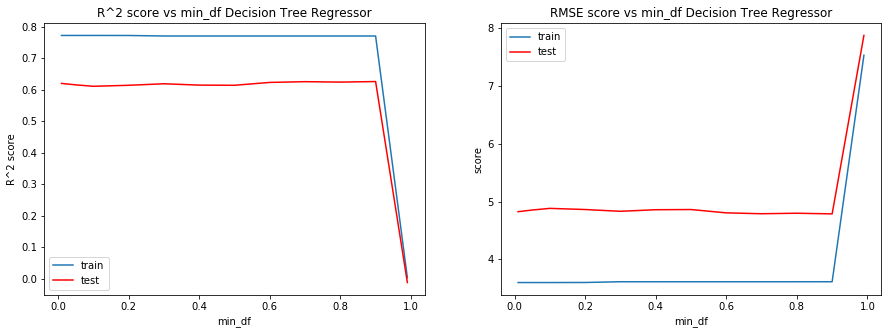

In [153]:
#Plotting the R^2 and RMSE score vs the min_df value for the model 
plt.subplots(1,2, figsize = (15,5))

plt.subplot(1,2,1) #R^2
plt.plot(min_df_values, cv_DT_train_score, label = 'train')
plt.plot(min_df_values, cv_DT_test_score, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_df Decision Tree Regressor')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(min_df_values, cv_DT_RMSE_train, label = 'train')
plt.plot(min_df_values, cv_DT_RMSE_test, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('score')
plt.title('RMSE score vs min_df Decision Tree Regressor')
plt.legend()

plt.show()

For the decision tree it is apparent that the variants which appear in 90% of the samples have the most effect on the scores, and below that we lose the information which allows us to fit the model with good results, and above that there is no improvement. 90% of the documents for the min_df seems to be the magic number here, where we have enough information to fit the model well, without getting more of unessecary information from the other variants which do not affect the model. It also slightly increases the test scores, when the min_df is set to 0.9

## Random Forest Regressor (non scaled data)

In [154]:
#creating lists to store the results
cv_RF_train_score = []
cv_RF_test_score = []
cv_RFR_RMSE_train = []
cv_RFR_RMSE_test = []

#creating a for loop to go through all the min_df values
for mindf in min_df_values:
    
    print(f'working on min_df {mindf}', end = '\r')

    #using a pipe to easy perform the count vecotriazation, and run the model on the data
    cv_RF = [('count_vectorize', CountVectorizer(min_df = mindf, tokenizer=lambda x: x.split(', '))),
             ('Random Forest', RandomForestRegressor(n_jobs = -1))]

    cv_RF_pipe = Pipeline(cv_RF)

    #fitting the model
    cv_RF_pipe.fit(X_train_thc, y_train_thc)

    #getting the scores
    cv_RF_train_score.append(cv_RF_pipe.score(X_train_thc, y_train_thc))
    cv_RF_test_score.append(cv_RF_pipe.score(X_test_thc, y_test_thc))
    cv_RFR_RMSE_train.append(mean_squared_error(y_train_thc, cv_RF_pipe.predict(X_train_thc),squared = False))
    cv_RFR_RMSE_test.append(mean_squared_error(y_test_thc, cv_RF_pipe.predict(X_test_thc),squared = False))

In [193]:
#adding the min_df results to the dataframe with all the results
score_list = cv_RF_test_score.copy()
score_list.insert(0, 'Random Forrest Regressor')

cv_model_test_score_mindf = cv_model_test_score_mindf.append([score_list])
cv_model_test_score_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,0.629021,0.628528,0.628116,0.629086,0.631268,0.630867,0.628564,0.627190,0.622913,0.616858,0.498656,-0.011922
0,Decision Tree Regressor,0.620295,0.615824,0.611227,0.614376,0.619273,0.614960,0.614404,0.623511,0.625895,0.624523,0.626306,-0.012495
0,Random Forrest Regressor,0.644683,0.641522,0.645398,0.641250,0.639721,0.641100,0.641414,0.640533,0.641900,0.640271,0.637317,-0.013928


In [194]:
#adding the min_df results to the dataframe with all the results
RMSE_score_list = cv_RFR_RMSE_test.copy()
RMSE_score_list.insert(0, 'Random Forrest Regressor')

cv_model_test_RMSE_mindf = cv_model_test_RMSE_mindf.append([RMSE_score_list])
cv_model_test_RMSE_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,4.767962,4.771128,4.773774,4.767539,4.753500,4.756083,4.770891,4.779710,4.807052,4.845487,5.542753,7.874650
0,Decision Tree Regressor,4.823708,4.852022,4.880964,4.861156,4.830195,4.857479,4.860985,4.803237,4.788002,4.796778,4.785372,7.876881
0,Random Forrest Regressor,4.666229,4.686934,4.661528,4.688716,4.698694,4.689694,4.687643,4.693399,4.684464,4.695106,4.714345,7.882452


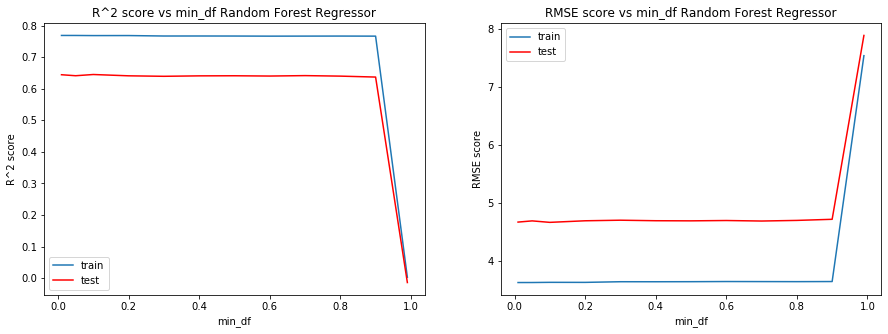

In [157]:
#Plotting the R^2 and RMSE score vs the min_df value for the model 
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
plt.plot(min_df_values, cv_RF_train_score, label = 'train')
plt.plot(min_df_values, cv_RF_test_score, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_df Random Forest Regressor')
plt.legend()


plt.subplot(1,2,2) #RMSE
plt.plot(min_df_values, cv_RFR_RMSE_train, label = 'train')
plt.plot(min_df_values, cv_RFR_RMSE_test, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('RMSE score')
plt.title('RMSE score vs min_df Random Forest Regressor')
plt.legend()
plt.show()

For the Random Forrest it is again apparent that the variants which appear in 90% of the samples have the most effect on the scores, and below that we lose the information which allows us to fit the model with good results, and above that there is no improvement. 90% of the documents for the min_df seems to be the magic number here, where we have enough information to fit the model well, without getting more of unessecary information from the other variants which do not affect the model.

## KNeighbors Regressor (scaled data)

In [165]:
#creating lists to store the results
cvss_KNR_train_score = []
cvss_KNR_test_score = []
cvss_KNR_RMSE_train = []
cvss_KNR_RMSE_test = []

#creating a for loop to go through all the min_df values
for mindf in min_df_values:
    
    print(f'working on min_df {mindf}', end = '\r')
    
    #using a pipe to easy perform the scalinf and count vecotriazation, and run the model on the data
    cvss_KNR = [('count_vectorize', CountVectorizer(min_df = mindf, tokenizer=lambda x: x.split(', '))),
                ('standard_scaler', StandardScaler(with_mean = False)),
                 ('kneighbors_regressor', KNeighborsRegressor(n_jobs = -1))]

    cvss_KNR_pipe = Pipeline(cvss_KNR)

    #fitting the model
    cvss_KNR_pipe.fit(X_train_thc, y_train_thc)

    #getting the scores
    cvss_KNR_train_score.append(cvss_KNR_pipe.score(X_train_thc, y_train_thc))
    cvss_KNR_test_score.append(cvss_KNR_pipe.score(X_test_thc, y_test_thc))
    cvss_KNR_RMSE_train.append(mean_squared_error(y_train_thc, cvss_KNR_pipe.predict(X_train_thc),squared = False))
    cvss_KNR_RMSE_test.append(mean_squared_error(y_test_thc, cvss_KNR_pipe.predict(X_test_thc),squared = False))


In [195]:
#adding the min_df results to the dataframe with all the results
score_list = cvss_KNR_test_score.copy()
score_list.insert(0, 'K-neighbors Regressor')

cv_model_test_score_mindf = cv_model_test_score_mindf.append([score_list])
cv_model_test_score_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,0.629021,0.628528,0.628116,0.629086,0.631268,0.630867,0.628564,0.627190,0.622913,0.616858,0.498656,-0.011922
0,Decision Tree Regressor,0.620295,0.615824,0.611227,0.614376,0.619273,0.614960,0.614404,0.623511,0.625895,0.624523,0.626306,-0.012495
0,Random Forrest Regressor,0.644683,0.641522,0.645398,0.641250,0.639721,0.641100,0.641414,0.640533,0.641900,0.640271,0.637317,-0.013928
0,K-neighbors Regressor,0.618036,0.592461,0.642585,0.625220,0.634908,0.623363,0.628814,0.629024,0.642268,0.635426,0.636826,-0.021391


In [196]:
#adding the min_df results to the dataframe with all the results
RMSE_score_list = cvss_KNR_RMSE_test.copy()
RMSE_score_list.insert(0, 'K-neighbors Regressor')

cv_model_test_RMSE_mindf = cv_model_test_RMSE_mindf.append([RMSE_score_list])
cv_model_test_RMSE_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,4.767962,4.771128,4.773774,4.767539,4.753500,4.756083,4.770891,4.779710,4.807052,4.845487,5.542753,7.874650
0,Decision Tree Regressor,4.823708,4.852022,4.880964,4.861156,4.830195,4.857479,4.860985,4.803237,4.788002,4.796778,4.785372,7.876881
0,Random Forrest Regressor,4.666229,4.686934,4.661528,4.688716,4.698694,4.689694,4.687643,4.693399,4.684464,4.695106,4.714345,7.882452
0,K-neighbors Regressor,4.838037,4.997382,4.679984,4.792320,4.729976,4.804181,4.769286,4.767942,4.682055,4.726617,4.717538,7.911410


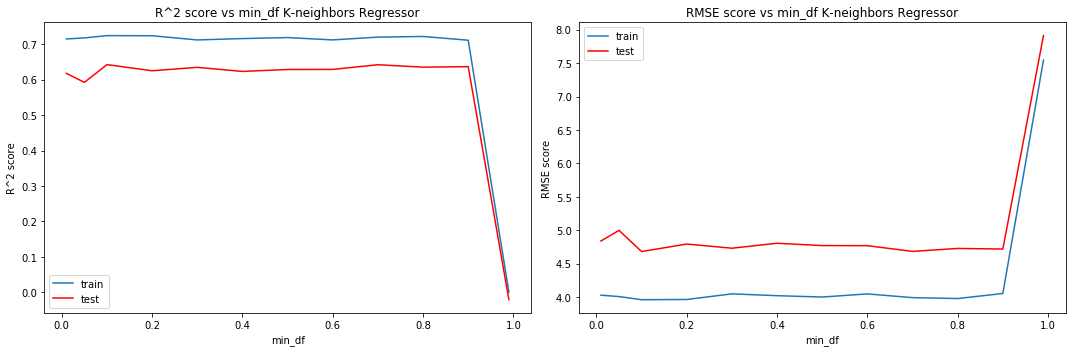

In [215]:
#Plotting the R^2 score vs the min_df value for the model 
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(min_df_values, cvss_KNR_train_score, label = 'train')
plt.plot(min_df_values, cvss_KNR_test_score, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_df K-neighbors Regressor')
plt.legend()

plt.subplot(1,2,2)
plt.plot(min_df_values, cvss_KNR_RMSE_train, label = 'train')
plt.plot(min_df_values, cvss_KNR_RMSE_test, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('RMSE score')
plt.title('RMSE score vs min_df K-neighbors Regressor')
plt.legend()

plt.tight_layout()
plt.show()

For the K-neighbors regressor it is again apparent that the variants which appear in 90% of the samples have the most effect on the scores, and below that we lose the information which allows us to fit the model with good results, and above that there is no improvement. 90% of the documents for the min_df seems to be the magic number here, where we have enough information to fit the model well, without getting more of unessecary information from the other variants which do not affect the model.

### SVR Linear (Scaled data)

In [180]:
#Using the linear kernel since we saw it works best

#creating lists to store the results
SVR_linear_train_score = []
SVR_linear_test_score = []
ss_SVR_train_RMSE = []
ss_SVR_test_RMSE =[]

for mindf in min_df_values:
    
    
    
    #using a pipe to easy perform the count vecotriazation, and run the model on the data
    cv_SVR = [('count_vectorize', CountVectorizer(min_df = mindf, tokenizer=lambda x: x.split(', '))),
              ('standard_scaler', StandardScaler(with_mean = False)),
             ('svr', SVR(kernel = 'linear'))]

    cv_SVR_pipe = Pipeline(cv_SVR)
    
    #fitting the model
    
    cv_SVR_pipe.fit(X_train_thc, y_train_thc)

    #getting the scores
    
    SVR_linear_train_score.append(cv_SVR_pipe.score(X_train_thc, y_train_thc))
    SVR_linear_test_score.append(cv_SVR_pipe.score(X_test_thc, y_test_thc))
    ss_SVR_train_RMSE.append(mean_squared_error(y_train_thc, cv_SVR_pipe.predict(X_train_thc),squared = False))
    ss_SVR_test_RMSE.append(mean_squared_error(y_test_thc, cv_SVR_pipe.predict(X_test_thc),squared = False))

In [198]:
#adding the min_df results to the dataframe with all the results

score_list = SVR_linear_test_score.copy()
score_list.insert(0, 'SVR linear')

cv_model_test_score_mindf = cv_model_test_score_mindf.append([score_list])
cv_model_test_score_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,0.629021,0.628528,0.628116,0.629086,0.631268,0.630867,0.628564,0.627190,0.622913,0.616858,0.498656,-0.011922
0,Decision Tree Regressor,0.620295,0.615824,0.611227,0.614376,0.619273,0.614960,0.614404,0.623511,0.625895,0.624523,0.626306,-0.012495
0,Random Forrest Regressor,0.644683,0.641522,0.645398,0.641250,0.639721,0.641100,0.641414,0.640533,0.641900,0.640271,0.637317,-0.013928
0,K-neighbors Regressor,0.618036,0.592461,0.642585,0.625220,0.634908,0.623363,0.628814,0.629024,0.642268,0.635426,0.636826,-0.021391
0,SVR linear,0.619211,0.609113,0.610248,0.616858,0.611227,0.604152,0.618452,0.605874,0.594784,0.615472,0.602549,-0.015487


In [200]:
#adding the min_df results to the dataframe with all the results
RMSE_score_list = ss_SVR_test_RMSE.copy()
RMSE_score_list.insert(0, 'SVR Linear')

cv_model_test_RMSE_mindf = cv_model_test_RMSE_mindf.append([RMSE_score_list])
cv_model_test_RMSE_mindf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Linear Regression,4.767962,4.771128,4.773774,4.767539,4.753500,4.756083,4.770891,4.779710,4.807052,4.845487,5.542753,7.874650
0,Decision Tree Regressor,4.823708,4.852022,4.880964,4.861156,4.830195,4.857479,4.860985,4.803237,4.788002,4.796778,4.785372,7.876881
0,Random Forrest Regressor,4.666229,4.686934,4.661528,4.688716,4.698694,4.689694,4.687643,4.693399,4.684464,4.695106,4.714345,7.882452
0,K-neighbors Regressor,4.838037,4.997382,4.679984,4.792320,4.729976,4.804181,4.769286,4.767942,4.682055,4.726617,4.717538,7.911410
0,SVR Linear,4.837421,4.751242,4.874569,4.798547,4.854215,4.875421,4.896521,4.803237,4.714345,4.801814,4.798974,7.822459


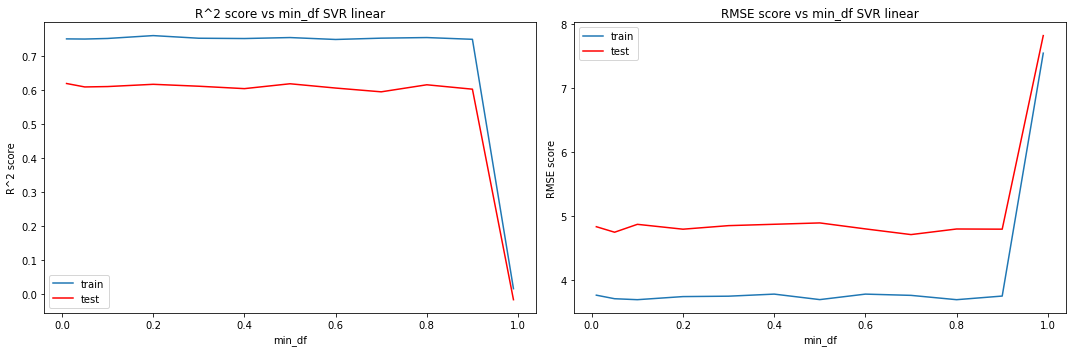

In [216]:
#Plotting the R^2 score vs the min_df value for the model 
plt.subplots(1,2, figsize = (15, 5))

plt.subplot(1,2,1) #R^2
plt.plot(min_df_values, SVR_linear_train_score, label = 'train')
plt.plot(min_df_values, SVR_linear_test_score, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_df SVR linear')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(min_df_values, ss_SVR_train_RMSE, label = 'train')
plt.plot(min_df_values, ss_SVR_test_RMSE, label = 'test', color = 'r')
plt.xlabel('min_df')
plt.ylabel('RMSE score')
plt.title('RMSE score vs min_df SVR linear')
plt.legend()

plt.tight_layout()
plt.show()

For the Support vector regressor it is again apparent that the variants which appear in 90% of the samples have the most effect on the scores, and below that we lose the information which allows us to fit the model with good results, and above that there is no improvement. 90% of the documents for the min_df seems to be the magic number here, where we have enough information to fit the model well, without getting more of unessecary information from the other variants which do not affect the model.

### Plotting the Results for All the Models

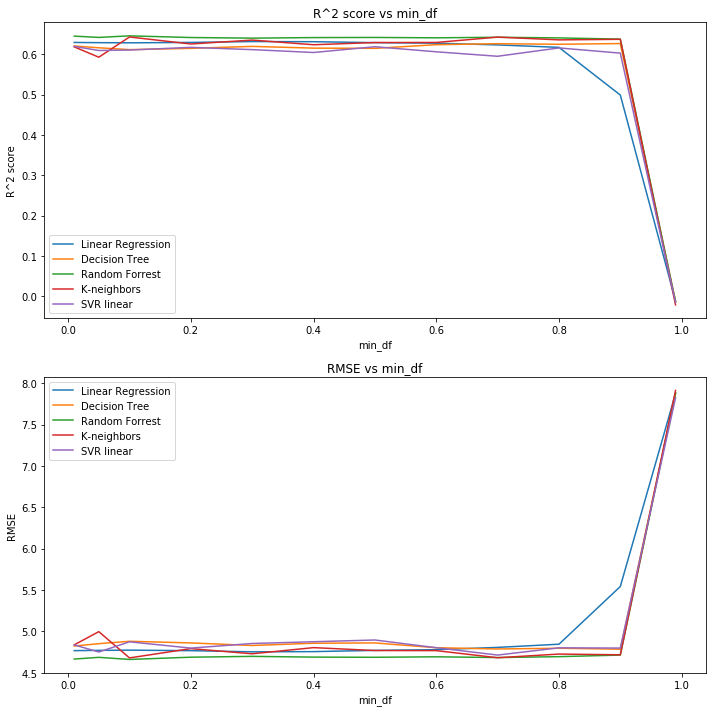

In [224]:
#plotting the r^2 and RMSE test scores for all the models
plt.subplots(2,1,figsize = (10,10))

plt.subplot(2,1,1) #R^2
plt.plot(min_df_values, cv_LR_test_score, label = 'Linear Regression')
plt.plot(min_df_values, cv_DT_test_score, label = 'Decision Tree')
plt.plot(min_df_values, cv_RF_test_score, label = 'Random Forrest')
plt.plot(min_df_values, cvss_KNR_test_score, label = 'K-neighbors')
plt.plot(min_df_values, SVR_linear_test_score, label = 'SVR linear')
plt.xlabel('min_df')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_df')
plt.legend()

plt.subplot(2,1,2) #RMSE
plt.plot(min_df_values, cv_LR_RMSE_test, label = 'Linear Regression')
plt.plot(min_df_values, cv_DT_RMSE_test, label = 'Decision Tree')
plt.plot(min_df_values, cv_RFR_RMSE_test, label = 'Random Forrest')
plt.plot(min_df_values, cvss_KNR_RMSE_test, label = 'K-neighbors')
plt.plot(min_df_values, ss_SVR_test_RMSE, label = 'SVR linear')
plt.xlabel('min_df')
plt.ylabel('RMSE')
plt.title('RMSE vs min_df')
plt.legend()

plt.tight_layout()
plt.show()

In [220]:
#labelleing the columns of the results dataframe
cv_model_test_score_mindf.columns = ['model', *min_df_values]

In [222]:
#labelleing the columns of the results dataframe
cv_model_test_RMSE_mindf.columns = ['model', *min_df_values]

In [221]:
cv_model_test_score_mindf

,model,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99
0,Linear Regression,0.629021,0.628528,0.628116,0.629086,0.631268,0.630867,0.628564,0.627190,0.622913,0.616858,0.498656,-0.011922
0,Decision Tree Regressor,0.620295,0.615824,0.611227,0.614376,0.619273,0.614960,0.614404,0.623511,0.625895,0.624523,0.626306,-0.012495
0,Random Forrest Regressor,0.644683,0.641522,0.645398,0.641250,0.639721,0.641100,0.641414,0.640533,0.641900,0.640271,0.637317,-0.013928
0,K-neighbors Regressor,0.618036,0.592461,0.642585,0.625220,0.634908,0.623363,0.628814,0.629024,0.642268,0.635426,0.636826,-0.021391
0,SVR linear,0.619211,0.609113,0.610248,0.616858,0.611227,0.604152,0.618452,0.605874,0.594784,0.615472,0.602549,-0.015487


In [223]:
cv_model_test_RMSE_mindf

,model,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99
0,Linear Regression,4.767962,4.771128,4.773774,4.767539,4.753500,4.756083,4.770891,4.779710,4.807052,4.845487,5.542753,7.874650
0,Decision Tree Regressor,4.823708,4.852022,4.880964,4.861156,4.830195,4.857479,4.860985,4.803237,4.788002,4.796778,4.785372,7.876881
0,Random Forrest Regressor,4.666229,4.686934,4.661528,4.688716,4.698694,4.689694,4.687643,4.693399,4.684464,4.695106,4.714345,7.882452
0,K-neighbors Regressor,4.838037,4.997382,4.679984,4.792320,4.729976,4.804181,4.769286,4.767942,4.682055,4.726617,4.717538,7.911410
0,SVR Linear,4.837421,4.751242,4.874569,4.798547,4.854215,4.875421,4.896521,4.803237,4.714345,4.801814,4.798974,7.822459


So from the results of varying the count vectorizer for all the different models, that the min_df value barely has an effect on the scores, until it is set to 0.8 or above.

# Conclusion from Varying min_df in Count Vectorization

It is apparent that there is very little difference in the train and test scores when the min_df is increased up to 0.8/0.9 (token must appear in 80 - 90% of the documents), most likey due to the fact that a high majority of the the genes variants do not affect the final THC content in the flower of the plant, and from this analysis we can say that the variants which appear in 80% of the genomes have an effect on predicting the THC content. This min_df value of 0.8 also seems to be the point at which we have enough information to fit the model well, without getting more of unessecary information from the other variants which do not affect the models performance.

Using this information I can address the high number of features for such a low amount of samples, since increasing the min_df term should reduce the number of features, decreasing the number of features should decrease the variance, hopefully improving the model scores, as they are able to determint the feature importance better with less features.

So now i create a data set which is made with the variants which appear in 80% of the samples, as this is the min_df value right before the linear regression seemed to drop off in its train/test score, and for the other models the train/test score was quite consistent at this min_df level.



In [14]:
# using the count vectorizer to get the counts of the variants, this time with min_df of 0.8
# 1. Instantiate 
bagofvariants_80 = CountVectorizer(min_df = 0.8, tokenizer=lambda x: x.split(', '))

# 2. Fit 
bagofvariants_80.fit(X_train_thc)

# 3. Transform
X_train_thc_bov_80 = bagofvariants_80.transform(X_train_thc)


#fitting bag of words to the test data
X_test_thc_bov_80 = bagofvariants_80.transform(X_test_thc)


C:\Users\danie\anaconda3\envs\deeplearning2\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [226]:
#scaling the new data set since i have distance based models:
standard_scaler = StandardScaler(with_mean = False)

X_train_thc_bov_80_ss = standard_scaler.fit_transform(X_train_thc_bov_80)

X_test_thc_bov_80_ss = standard_scaler.transform(X_test_thc_bov_80)

In [26]:
#since the number of features is so small, i can actually turn the sparse matrixes into a dense matrix


X_train_thc_bov_80_dense = pd.DataFrame(X_train_thc_bov_80.todense(), columns = bagofvariants_80.get_feature_names(), index = y_train_thc.index)
X_test_thc_bov_80_dense = pd.DataFrame(X_test_thc_bov_80.todense(), columns = bagofvariants_80.get_feature_names(), index = y_test_thc.index)

In [231]:
#looking at the full variant features
X_train_thc_bov.shape

(3077, 94614)

In [229]:
#looking at the new number of features
X_train_thc_bov_80.shape

(3077, 1615)

So we have gone from 94,614 features, to 1615, this is a massive decrease, without seeing a decrease in the performance across the models, and now the number of samples is roughly 2 times the number of features, which is more ideal, and may help with overfitting of the training data, due to the lower variance from having less features.

# Hyperparameter Tuning

At this point i have my reduced data set, and i want to re-run the models to get a new baseline, and start optimizing the hyperparameters. 


My methodology here is to first run a get a baseline for the model using its default parameters, then i investigate the effects of optimizing each parameter of interest individually, then i use GridSearchCV to optimize the parameters together, to try and get the best improvement out of my models.

But first i need to create the train and validation sets, to be used in the hyperparameter tuning.

In [232]:
#First creating the validation set

X_vtrain_thc_bov_80, X_val_thc_bov_80, y_vtrain_thc, y_val_thc = train_test_split(X_train_thc_bov_80, y_train_thc, test_size = 0.3, random_state = 42)

In [233]:
#creating a validation set, for the scaled data

X_vtrain_thc_bov_80_ss, X_val_thc_bov_80_ss, y_vtrain_thc_ss, y_val_thc_ss = train_test_split(X_train_thc_bov_80_ss, y_train_thc, test_size = 0.3, random_state = 42)

I will also create a dataframe to store the baseline scores, and the different optimized scores

In [272]:
baseline_scores_hyp = pd.DataFrame()
opt_scores_hyp = pd.DataFrame()

## Linear regression

With the linear regression the first thing i want to do is perform a OLS regression using scipy, so i can see which variants coefficients are statistically significant, and then see if using only those variants in my scikit learn linear regression improves the result.

I also want to run a ridge regression, varying the penalty, since i think there may be collinearity between variant counts, which i want to minimize the effects of using this type of regularization, and i want to see if i can reduce the fitting of my train set to improve the results on the test set.

### OLS linear Regression

Running OLS to get the signifigance of the coefficeints for each variant type, and the magnitude of the coefficients

In [235]:
#adding a constant to the training dataset, i have to use the dense matrix since sm.OLS doesn't accept sparse maticies,
# which disallowed me to use this earlier with the massiive ~90000 column sparse matrix for the X_train and X_test
X_train_thc_bov_80_dense_with_constant = sm.add_constant(X_train_thc_bov_80_dense)

In [236]:
# 1. Instantiate the OLS Model
OLSregression = sm.OLS(y_train_thc, X_train_thc_bov_80_dense_with_constant)

# 2. Fit Model 
OLSregression_results = OLSregression.fit()

# Looking at the summary
OLSregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_thc   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     18.82
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:50:01   Log-Likelihood:                -8315.9
No. Observations:                3077   AIC:                         1.757e+04
Df Residuals:                    2609   BIC:                         2.039e+04
Df Model:                         467                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.6238      1.087     13.450      0.000      12.492      16.756
type_10061639     0.2851      0.308      0.926      0.355      -0.319       0.889
type_10070317    -0.1077      0.470     -0.229      0.819      -1.029       0.814
type_10073968     0.7254      0.438      1.656      0.098      -0.134       1.584
type_1015205     -0.7976      0.684     -1.165      0.244      -2.140       0.545
type_1015962      0.0719      0.034      2.137      0.033       0.006       0.138
type_10165571    -0.6377      0.497     -1.283      0.199      -1.612       0.337
type_1017592     -0.6724      0.556     -1.210      0.226      -1.762       0.417
type_10184771     0.0556      0.699      0.080      0.937      -1.314       1.426
type_1021775      0.3484      0.578      0.603      0.547      -0.785       1.482
type_10223304     0.2370      0.425      0.557      0.578      -0.597       1.071
type_1023780      0.6917      0.310      2.233      0.026       0.084       1.299
type_1024194     -0.8586      0.475     -1.806      0.071      -1.791       0.073
type_10255922    -0.0939      0.404     -0.232      0.816      -0.887       0.699
type_1025813      0.1892      0.566      0.334      0.738      -0.921       1.299
type_10259680    -0.3885      0.363     -1.071      0.284      -1.100       0.323
type_1027116     -0.3570      0.608     -0.588      0.557      -1.548       0.834
type_10277602     0.7024      0.575      1.222      0.222      -0.425       1.829
type_102785       0.4583      0.531      0.863      0.388      -0.583       1.499
type_102814      -0.4876      0.436     -1.120      0.263      -1.342       0.366
type_10295961     1.0300      0.326      3.164      0.002       0.392       1.668
type_10298187     1.0578      0.434      2.438      0.015       0.207       1.909
type_10385126     0.6514      0.433      1.504      0.133      -0.198       1.501
type_1039430     -0.2041      0.291     -0.701      0.484      -0.775       0.367
type_10398349     0.6061      0.477      1.272      0.204      -0.329       1.541
type_1041135     -0.8885      0.366     -2.425      0.015      -1.607      -0.170
type_1042230      0.9881      0.507      1.948      0.052      -0.007       1.983
type_10422718    -1.2107      0.607     -1.995      0.046      -2.401      -0.021
type_1045846     -2.2387      0.618     -3.622      0.000      -3.451      -1.027
type_10519197    -0.2738      0.542     -0.505      0.614      -1.338       0.790
type_1053092      0.2108      0.134      1.578      0.115      -0.051       0.473
type_1059918     -0.5332      0.657     -0.811      0.417      -1.822       0.756
type_1071207      0.0064      0.447      0.014      0.989      -0.871       0.884
type_1072294      0.6423      0.597      1.075      0.282      -0.529       1.814
type_10735723     0.2865      0.379      0.755   

In [239]:
#Creating a dataframe to store the coefficients for each variant, and and the variant itself
OLS_coef = pd.DataFrame(OLSregression_results.params).reset_index()
OLS_coef.columns = ['variant', 'coef']
OLS_coef

,variant,coef
0,const,14.623846
1,type_10061639,0.285068
2,type_10070317,-0.107712
3,type_10073968,0.725400
4,type_1015205,-0.797586
...,...,...
1611,type_9855774,0.238650
1612,type_986521,1.297618
1613,type_9876010,-0.557301
1614,type_9931356,0.135340


In [240]:
#pulling out the variants and with pvalues below 0.059, just slightly higher than the usualy threshold p values, 
#to catch those that are just on the cusp of statistically signifigant
#and storing them in a dataframe

OLS_p_values =  pd.DataFrame(OLSregression_results.pvalues<=0.059)
OLS_p_values

,0
const,True
type_10061639,False
type_10070317,False
type_10073968,False
type_1015205,False
...,...
type_9855774,False
type_986521,True
type_9876010,False
type_9931356,False


In [241]:
#reset the index to get the variants as the columns rather than the index
OLS_p_values = OLS_p_values.reset_index()

In [244]:
#rename columns
OLS_p_values.columns = ['variant', 'pvalue_stat_sig']

In [245]:
#inspect the df
OLS_p_values.head()

,variant,pvalue_stat_sig
0,const,True
1,type_10061639,False
2,type_10070317,False
3,type_10073968,False
4,type_1015205,False


In [246]:
#merging the coefficient values to the coeffiecients to get a dataframe with only 
#the variants with statistically signifigant coefficients
OLS_coef_stat_sig = OLS_p_values.merge(OLS_coef, on = 'variant').query('pvalue_stat_sig == True')

In [247]:
# Checking the new df
OLS_coef_stat_sig.head()

,variant,pvalue_stat_sig,coef
0,const,True,14.623846
5,type_1015962,True,0.071899
11,type_1023780,True,0.691732
20,type_10295961,True,1.030031
21,type_10298187,True,1.057837


In [248]:
#Creating a dataframe which will give me the column indexes of the variants in the sparse matrix
#so i can use this information to filter out the columns of the variants with the statistically significant coefficients
#to use in the linear regression later
#reset the index so that the variant indexes become their own column
sparse_variant_index = pd.DataFrame(bagofvariants_80.get_feature_names()).reset_index()

In [249]:
#re name the columns
sparse_variant_index.columns = ['index', 'variant']
sparse_variant_index

,index,variant
0,0,type_10061639
1,1,type_10070317
2,2,type_10073968
3,3,type_1015205
4,4,type_1015962
...,...,...
1610,1610,type_9855774
1611,1611,type_986521
1612,1612,type_9876010
1613,1613,type_9931356


In [250]:
#merging the statistically significant coefficient variants to the sparse matrix column indexes
#to have a column with the indicies of the variants with statistically significan coefficients
OLS_p_values_stat_sig_index = OLS_coef_stat_sig.merge(sparse_variant_index, how = 'inner', on = 'variant')

In [251]:
#checking the merge
OLS_p_values_stat_sig_index.head()

,variant,pvalue_stat_sig,coef,index
0,type_1015962,True,0.071899,4
1,type_1023780,True,0.691732,10
2,type_10295961,True,1.030031,19
3,type_10298187,True,1.057837,20
4,type_1041135,True,-0.888473,24


In [252]:
#getting the number of variants with statistically significant coefficients
OLS_p_values_stat_sig_index.shape

(518, 4)

From OLS we determined that only 518 of the variants of the 1600 have statistically significant coefficients.

## Linear Regression

Now that i know the statistically significant coefficients, and have a way of extracting the columns of the variants with the statistically significant coefficients from the sparse matrix (using the index column of the OLS_p_values_stat_sig_index), i can now start to explore the effects of using only the variants with statistically signifigant coefficients on the linear regression.

### Getting the Baseline Linear Regression Scores

In [271]:
# 1. Instantiate the model
cv_linear_regression_model = LinearRegression()

# 2. Fit the model
cv_linear_regression_model.fit(X_train_thc_bov_80, y_train_thc)

cvLR_train_score = cv_linear_regression_model.score(X_train_thc_bov_80, y_train_thc)
cvLR_test_score = cv_linear_regression_model.score(X_test_thc_bov_80, y_test_thc)
cvLR_train_RMSE = (mean_squared_error(y_train_thc, cv_linear_regression_model.predict(X_train_thc_bov_80),squared = False))
cvLR_test_RMSE = (mean_squared_error(y_test_thc, cv_linear_regression_model.predict(X_test_thc_bov_80),squared = False))

# 3. Scoring the model
print(f'Linear Regression Baseline Train set R2 {cvLR_train_score}')
print(f'Linear Regression Baseline Test set R2 {cvLR_test_score}')
print(f'Linear Regression Baseline Train set RMSE {cvLR_train_RMSE}')
print(f'Linear Regression Baseline Test set RMSE {cvLR_test_RMSE}')

Linear Regression Baseline Train set R2 0.7710551639236171
Linear Regression Baseline Test set R2 0.6168584484423336
Linear Regression Baseline Train set RMSE 3.6098714249564106
Linear Regression Baseline Test set RMSE 4.845487173599628


In [273]:
#adding the model results to the data frame
baseline_scores_hyp = baseline_scores_hyp.append(pd.DataFrame({"model":['Linear Regression'],
                                                     "train_score_r2":[cvLR_train_score],
                                                     "test_score_r2":[cvLR_test_score],                                   
                                                     "train_score_rmse":[cvLR_train_RMSE],
                                                     "test_score_rmse":[cvLR_test_RMSE]}),
                                                     ignore_index = True)

In [274]:
#checking the addition
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487


###  Linear Regression Scores - Using variants that had statistically signifigant pvalues only

Using only statistically signifigant variants

In [265]:
#making the sparse matricies with the statistically significant coefficient variants
X_train_thc_bov_80_stat_sig = X_train_thc_bov_80[:, OLS_p_values_stat_sig_index['index']]

X_test_thc_bov_80_stat_sig = X_test_thc_bov_80[:, OLS_p_values_stat_sig_index['index']]

In [275]:
#Running the linear regression with just the variants that had statistically signifigant p values
# 1. Instantiate the model
cv_linear_regression_model = LinearRegression()

# 2. Fit the model
cv_linear_regression_model.fit(X_train_thc_bov_80[:, OLS_p_values_stat_sig_index['index']], y_train_thc)

cvLR_train_score = cv_linear_regression_model.score(X_train_thc_bov_80_stat_sig, y_train_thc)
cvLR_test_score = cv_linear_regression_model.score(X_test_thc_bov_80_stat_sig, y_test_thc)
cvLR_train_RMSE = (mean_squared_error(y_train_thc, cv_linear_regression_model.predict(X_train_thc_bov_80_stat_sig),squared = False))
cvLR_test_RMSE = (mean_squared_error(y_test_thc, cv_linear_regression_model.predict(X_test_thc_bov_80_stat_sig),squared = False))

# 3. Scoring the model
print(f' Train set R2 {cvLR_train_score}')
print(f' Test set R2 {cvLR_test_score}')
print(f' Train set RMSE {cvLR_train_RMSE}')
print(f' Test set RMSE {cvLR_test_RMSE}')

 Train set R2 0.7459746526797812
 Test set R2 0.6243616245797907
 Train set RMSE 3.8024615778458464
 Test set RMSE 4.797807271272039


In [276]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Linear Regression Stat Sig'],
                                                     "train_score_r2":[cvLR_train_score],
                                                     "test_score_r2":[cvLR_test_score],                                   
                                                     "train_score_rmse":[cvLR_train_RMSE],
                                                     "test_score_rmse":[cvLR_test_RMSE]}),
                                                     ignore_index = True)

In [277]:
#pulling up the baseline score
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487


I can already see that using the variants with the statistically significant coefficients in the OLS doesn't have much of an effect on the scores, it only increased the test $R^2$ score by 0.008, and the test RMSE decreased by 0.05%THC.

#### Ridge Regression with - variants that had statistically signifigant pvalues 

Here i try using ridge regression with the variants which had statistically significant pvalues in the OLS, to try and decrease to fitting of the model on the training set, and reduce any multicollinearity effects, hopefully increaseing the test scores.

In [278]:
# Making the train validation sets of the matrixes with the statistically signifigant variants only

X_vtrain_thc_bov_80_stat_sig, X_val_thc_bov_80_stat_sig, y_vtrain_thc_stat_sig, y_val_thc_stat_sig = train_test_split(X_train_thc_bov_80_stat_sig, y_train_thc, test_size = 0.3)

In [286]:
#defining some alpha scores to test

mag_alpha = [5, 10, 100, 1000, 10000]
tiny_alpha = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
low_alpha = np.arange(0.1, 1.1, 0.1)
mid_alpha = np.arange(0.1, 15.1, 0.1)
hundreds_alpha = np.arange(5, 405, 5)

In [280]:
#first looking at different magnitudes of alpha

ma_cv_RR_train_score = []
ma_cv_RR_val_score = []
ma_cv_RR_train_RMSE = []
ma_cv_RR_val_RMSE = []

for a in mag_alpha:
    
    print(f'working on alpha {a}', end = '\r')
    
    #instantiate
    ma_cv_RR = Ridge(alpha = a)
    
    #fit

    ma_cv_RR.fit(X_vtrain_thc_bov_80_stat_sig, y_vtrain_thc_stat_sig)
    
    #Score

    ma_cv_RR_train_score.append(ma_cv_RR.score(X_vtrain_thc_bov_80_stat_sig, y_vtrain_thc_stat_sig))
    ma_cv_RR_val_score.append(ma_cv_RR.score(X_val_thc_bov_80_stat_sig, y_val_thc_stat_sig))
    ma_cv_RR_train_RMSE.append(mean_squared_error(y_vtrain_thc_stat_sig, ma_cv_RR.predict(X_vtrain_thc_bov_80_stat_sig),squared = False))
    ma_cv_RR_val_RMSE.append(mean_squared_error(y_val_thc_stat_sig, ma_cv_RR.predict(X_val_thc_bov_80_stat_sig),squared = False))

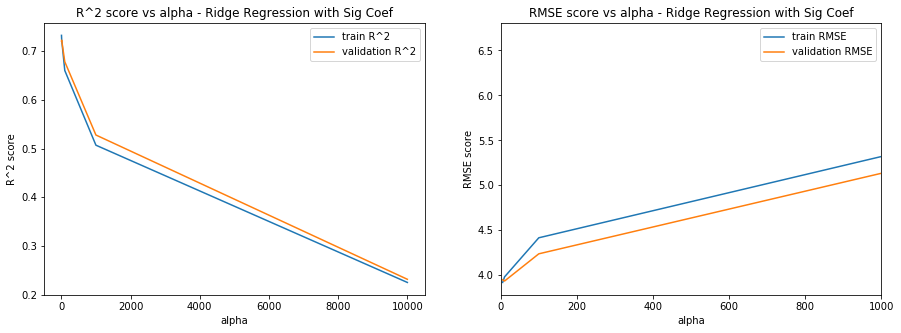

In [282]:
#plotting the scores
plt.subplots(1,2,figsize= (15,5))

# R^2
plt.subplot(1,2,1)
plt.plot(mag_alpha, ma_cv_RR_train_score, label = 'train R^2')
plt.plot(mag_alpha, ma_cv_RR_val_score, label = 'validation R^2')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.title('R^2 score vs alpha - Ridge Regression with Sig Coef')
plt.legend()


#plotting the RMSE scores
plt.subplot(1,2,2)
plt.plot(mag_alpha, ma_cv_RR_train_RMSE, label = 'train RMSE')
plt.plot(mag_alpha, ma_cv_RR_val_RMSE, label = 'validation RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE score')
plt.title('RMSE score vs alpha - Ridge Regression with Sig Coef')
plt.xlim(0,1000)
plt.legend()

plt.tight_layout()
plt.show()

So i can see that the alpha score that works the best in the lower ranges

In [287]:
#looking at the lower range of alpha

mida_cv_RR_train_score = []
mida_cv_RR_val_score = []
mida_cv_RR_train_RMSE = []
mida_cv_RR_val_RMSE = []

for a in mid_alpha:
    
    print(f'working on alpha {a}', end = '\r')
    
    #instantiate
    mida_cv_RR = Ridge(alpha = a)
    
    #fit

    mida_cv_RR.fit(X_vtrain_thc_bov_80_stat_sig, y_vtrain_thc_stat_sig)
    
    #Score

    mida_cv_RR_train_score.append(mida_cv_RR.score(X_vtrain_thc_bov_80_stat_sig, y_vtrain_thc_stat_sig))
    mida_cv_RR_val_score.append(mida_cv_RR.score(X_val_thc_bov_80_stat_sig, y_val_thc_stat_sig))
    mida_cv_RR_train_RMSE.append(mean_squared_error(y_vtrain_thc_stat_sig, mida_cv_RR.predict(X_vtrain_thc_bov_80_stat_sig),squared = False))
    mida_cv_RR_val_RMSE.append(mean_squared_error(y_val_thc_stat_sig, mida_cv_RR.predict(X_val_thc_bov_80_stat_sig),squared = False))

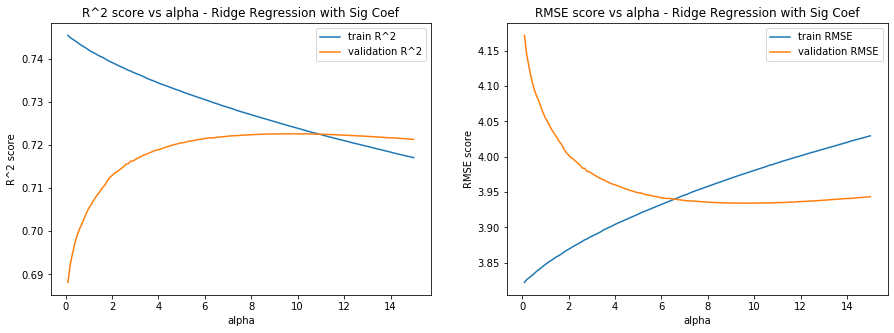

In [288]:
#plotting the scores
plt.subplots(1,2,figsize= (15,5))

# R^2
plt.subplot(1,2,1)
plt.plot(mid_alpha, mida_cv_RR_train_score, label = 'train R^2')
plt.plot(mid_alpha, mida_cv_RR_val_score, label = 'validation R^2')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.title('R^2 score vs alpha - Ridge Regression with Sig Coef')
plt.legend()


#plotting the RMSE scores
plt.subplot(1,2,2)
plt.plot(mid_alpha, mida_cv_RR_train_RMSE, label = 'train RMSE')
plt.plot(mid_alpha, mida_cv_RR_val_RMSE, label = 'validation RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE score')
plt.title('RMSE score vs alpha - Ridge Regression with Sig Coef')

plt.legend()
plt.tight_layout()
plt.show()

It is apparent that the ridge regression with regularization has an effect on the validation score, and the optimal alpha is in the 4-15 range.

In [289]:
#using cross validation to get the best alpha value based on the validation score


mida_cv_RR_5val_score = []

for a in mid_alpha:
    
    print(f'working on alpha {a}', end = '\r')
    
    #instantiate
    mida_cv_RR = Ridge(alpha = a)
    
    #five fold validation
    mida_cv_RR_5val_score.append(np.mean(cross_val_score(mida_cv_RR, X_train_thc_bov_80_stat_sig, y_train_thc, cv = 5)))


In [290]:
#getting the best alpha value in this model
opt_alpha = mid_alpha[np.argmax(mida_cv_RR_5val_score)]
opt_alpha

5.8

##### Running the ridge regression using the optimized alpha value

In [292]:
# 1. Instantiate the model
opt_cv_RR = Ridge(alpha = opt_alpha)

# 2. Fit the model
opt_cv_RR.fit(X_train_thc_bov_80_stat_sig, y_train_thc)

opt_cv_RR_train_score = opt_cv_RR.score(X_train_thc_bov_80_stat_sig, y_train_thc)
opt_cv_RR_test_score = opt_cv_RR.score(X_test_thc_bov_80_stat_sig, y_test_thc)
opt_cv_RR_train_RMSE = (mean_squared_error(y_train_thc, opt_cv_RR.predict(X_train_thc_bov_80_stat_sig),squared = False))
opt_cv_RR_test_RMSE = (mean_squared_error(y_test_thc, opt_cv_RR.predict(X_test_thc_bov_80_stat_sig),squared = False))

# 3. Scoring the model
print(f' opt_cv_RR Train set R2 {opt_cv_RR_train_score}')
print(f' opt_cv_RR Test set R2 {opt_cv_RR_test_score}')
print(f' opt_cv_RR Train set RMSE {opt_cv_RR_train_RMSE}')
print(f' opt_cv_RR Test set RMSE {opt_cv_RR_test_RMSE}')


 opt_cv_RR Train set R2 0.7357890009391539
 opt_cv_RR Test set R2 0.6205479639958903
 opt_cv_RR Train set RMSE 3.8779459717342672
 opt_cv_RR Test set RMSE 4.822100585569881


In [293]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Ridge Regression Stat Sig'],
                                                     "train_score_r2":[opt_cv_RR_train_score],
                                                     "test_score_r2":[opt_cv_RR_test_score],                                   
                                                     "train_score_rmse":[opt_cv_RR_train_RMSE],
                                                     "test_score_rmse":[opt_cv_RR_test_RMSE]}),
                                                     ignore_index = True)

In [294]:
#pulling up optimized scores
opt_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression Stat Sig,0.745975,0.624362,3.802462,4.797807
1,Ridge Regression Stat Sig,0.735789,0.620548,3.877946,4.822101


In [295]:
#pulling up baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487


##### Comparing the Original Linear regression and the Ridge Regression values - using the statistically  significant coefficients

Summary of Using the Variants with Statistically Significant Coefficients in OLS:

|Model|Train $R^2$|Test $R^2$|Train RMSE|Test RMSE|
|-----|------|-----|-----|-----|
|Base Linear Regression|0.771|0.617|3.61|4.84|
|Statistically Significant Linear Regression|0.746|0.624|3.80|4.80|
|Statistically Significant Optimized Ridge Regression|0.736|0.621|3.88|4.82|

There were very few gains to be made using only the counts of the Variants with Statistically Significant Coefficients in OLS, and using the ridge regression actually decreased the score, indicating that there is very little multi-collinearity between the features, and the model isn't really overfitting to the training data set.



### Ridge Regression for all variants

In [296]:
#defining some alpha scores to test

mag_alpha = [5, 10, 100, 1000, 10000]
tiny_alpha = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
low_alpha = np.arange(0.1, 1.1, 0.1)
mid_alpha = np.arange(0.1, 10.1, 0.1)
hundreds_alpha = np.arange(5, 405, 5)

In [297]:
#first looking at different magnitudes of alpha

ma_cv_RR_train_score = []
ma_cv_RR_val_score = []
ma_cv_RR_train_RMSE = []
ma_cv_RR_val_RMSE = []

for a in mag_alpha:
    
    print(f'working on alpha {a}', end = '\r')
    
    #instantiate
    ma_cv_RR = Ridge(alpha = a)
    
    #fit

    ma_cv_RR.fit(X_vtrain_thc_bov_80, y_vtrain_thc)
    
    #Score

    ma_cv_RR_train_score.append(ma_cv_RR.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    ma_cv_RR_val_score.append(ma_cv_RR.score(X_val_thc_bov_80, y_val_thc))
    ma_cv_RR_train_RMSE.append(mean_squared_error(y_vtrain_thc, ma_cv_RR.predict(X_vtrain_thc_bov_80),squared = False))
    ma_cv_RR_val_RMSE.append(mean_squared_error(y_val_thc, ma_cv_RR.predict(X_val_thc_bov_80),squared = False))

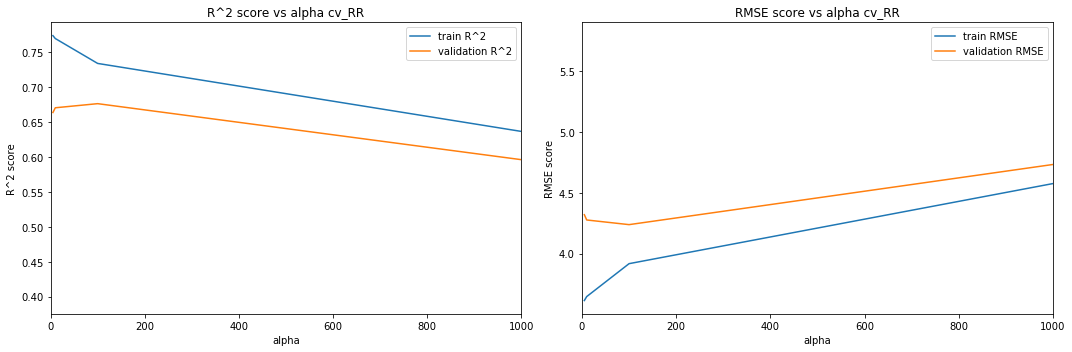

In [298]:
#plotting the scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #r^2
plt.plot(mag_alpha, ma_cv_RR_train_score, label = 'train R^2')
plt.plot(mag_alpha, ma_cv_RR_val_score, label = 'validation R^2')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.title('R^2 score vs alpha cv_RR')
plt.xlim(0,1000)
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(mag_alpha, ma_cv_RR_train_RMSE, label = 'train RMSE')
plt.plot(mag_alpha, ma_cv_RR_val_RMSE, label = 'validation RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE score')
plt.title('RMSE score vs alpha cv_RR')
plt.xlim(0,1000)
plt.legend()


plt.tight_layout()
plt.show()

I can see that the alpha score that works the best in the 0-200 range

In [299]:
#looking at different hundereds of alpha

ha_cv_RR_train_score = []
ha_cv_RR_val_score = []
ha_cv_RR_train_RMSE = []
ha_cv_RR_val_RMSE = []

for a in hundreds_alpha:
    
    print(f'working on alpha {a}', end = '\r')
    
    #instantiate
    ha_cv_RR = Ridge(alpha = a)
    
    #fit

    ha_cv_RR.fit(X_vtrain_thc_bov_80, y_vtrain_thc)
    
    #Score

    ha_cv_RR_train_score.append(ha_cv_RR.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    ha_cv_RR_val_score.append(ha_cv_RR.score(X_val_thc_bov_80, y_val_thc))
    ha_cv_RR_train_RMSE.append(mean_squared_error(y_vtrain_thc, ha_cv_RR.predict(X_vtrain_thc_bov_80),squared = False))
    ha_cv_RR_val_RMSE.append(mean_squared_error(y_val_thc, ha_cv_RR.predict(X_val_thc_bov_80),squared = False))

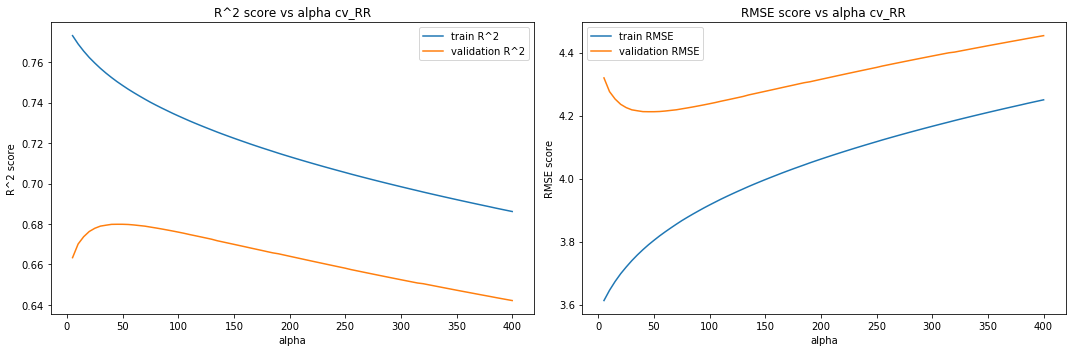

In [301]:
#plotting the scores
plt.subplots(1,2, figsize = (15, 5))

plt.subplot(1,2,1) #R^2
plt.plot(hundreds_alpha, ha_cv_RR_train_score, label = 'train R^2')
plt.plot(hundreds_alpha, ha_cv_RR_val_score, label = 'validation R^2')
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.title('R^2 score vs alpha cv_RR')
plt.legend()

plt.subplot(1,2,2) #R^2
plt.plot(hundreds_alpha, ha_cv_RR_train_RMSE, label = 'train RMSE')
plt.plot(hundreds_alpha, ha_cv_RR_val_RMSE, label = 'validation RMSE')
plt.xlabel('alpha')
plt.ylabel('RMSE score')
plt.title('RMSE score vs alpha cv_RR')
plt.legend()



plt.tight_layout()
plt.show()

It is apparent that the optimal alpha value is around 0-50

In [302]:
#using cross validation to get the best alpha based on the cross validation score


ha_cv_RR_5val_score = []

for a in hundreds_alpha:
    
    print(f'working on alpha {a}', end = '\r')
    
    #instantiate
    ha_cv_RR = Ridge(alpha = a)
    
    #five fold validation
    ha_cv_RR_5val_score.append(np.mean(cross_val_score(ha_cv_RR, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [303]:
#showing the best alpha score
hundreds_alpha[np.argmax(ha_cv_RR_5val_score)]

85

#### Running the ridge regression using the optimized alpha value

In [304]:
# 1. Instantiate the model
opt_cv_RR = Ridge(alpha = hundreds_alpha[np.argmax(ha_cv_RR_5val_score)])

# 2. Fit the model
opt_cv_RR.fit(X_train_thc_bov_80, y_train_thc)

opt_cv_RR_train_score = opt_cv_RR.score(X_train_thc_bov_80, y_train_thc)
opt_cv_RR_test_score = opt_cv_RR.score(X_test_thc_bov_80, y_test_thc)
opt_cv_RR_train_RMSE = (mean_squared_error(y_train_thc, opt_cv_RR.predict(X_train_thc_bov_80),squared = False))
opt_cv_RR_test_RMSE = (mean_squared_error(y_test_thc, opt_cv_RR.predict(X_test_thc_bov_80),squared = False))

# 3. Scoring the model
print(f'optimized Ridge Regression Train set R2 {opt_cv_RR_train_score}')
print(f'optimized Ridge Regression Test set R2 {opt_cv_RR_test_score}')
print(f'optimized Ridge Regression Train set RMSE {opt_cv_RR_train_RMSE}')
print(f'optimized Ridge Regression Test set RMSE {opt_cv_RR_test_RMSE}')


optimized Ridge Regression Train set R2 0.7379916550437751
optimized Ridge Regression Test set R2 0.6456230024572893
optimized Ridge Regression Train set RMSE 3.861747458347501
optimized Ridge Regression Test set RMSE 4.660050076655902


In [305]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Ridge Regression'],
                                                     "train_score_r2":[opt_cv_RR_train_score],
                                                     "test_score_r2":[opt_cv_RR_test_score],                                   
                                                     "train_score_rmse":[opt_cv_RR_train_RMSE],
                                                     "test_score_rmse":[opt_cv_RR_test_RMSE]}),
                                                     ignore_index = True)

In [306]:
#pulling up optimized scores
opt_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression Stat Sig,0.745975,0.624362,3.802462,4.797807
1,Ridge Regression Stat Sig,0.735789,0.620548,3.877946,4.822101
2,Ridge Regression,0.737992,0.645623,3.861747,4.660050


In [307]:
#pulling up baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487


##### Comparing the Original Linear regression and the Ridge Regression values

Summary of Using all the Variants, Linear Regression:

|Model|Train $R^2$|Test $R^2$|Train RMSE|Test RMSE|
|-----|------|-----|-----|-----|
|Base Linear Regression|0.771|0.617|3.61|4.84|
|Optimized Ridge Regression|0.738|0.646|3.86|4.66|

Utilizing ridge regression for its regularization capabilities made a slight increase in the test scores, and a decrease in the test RMSE, improving the models overall performance.




## Decision trees

For the decision trees i focus on optimizing the max depth, and the minimum samples at each leaf, trying to reduce overfitting on the training data and make the model more robust, hopefully improving the test score

#### Running a baseline

In [309]:
#Instantiate the model
cv_DTmodel = DecisionTreeRegressor()

#fit the model
cv_DTmodel.fit(X_train_thc_bov_80, y_train_thc)

#score the model
cv_DTmodel_train_score = cv_DTmodel.score(X_train_thc_bov_80, y_train_thc)
cv_DTmodel_test_score = cv_DTmodel.score(X_test_thc_bov_80, y_test_thc)
cv_DTmodel_train_RMSE = (mean_squared_error(y_train_thc, cv_DTmodel.predict(X_train_thc_bov_80),squared = False))
cv_DTmodel_test_RMSE = (mean_squared_error(y_test_thc, cv_DTmodel.predict(X_test_thc_bov_80),squared = False))


print(f"DT R^2 score on training set: {cv_DTmodel_train_score}")
print(f"DT R^2 score on test set: {cv_DTmodel_test_score}")
print(f"DT RMSE score on train set: {cv_DTmodel_train_RMSE}")
print(f"DT RMSE score on test set: {cv_DTmodel_test_RMSE}")

DT R^2 score on training set: 0.7710551639264259
DT R^2 score on test set: 0.6114645240680503
DT RMSE score on train set: 3.6098714249342656
DT RMSE score on test set: 4.87947571624252


In [310]:
#adding the model results to the data frame
baseline_scores_hyp = baseline_scores_hyp.append(pd.DataFrame({"model":['Decision Tree'],
                                                     "train_score_r2":[cv_DTmodel_train_score],
                                                     "test_score_r2":[cv_DTmodel_test_score],                                   
                                                     "train_score_rmse":[cv_DTmodel_train_RMSE],
                                                     "test_score_rmse":[cv_DTmodel_test_RMSE]}),
                                                     ignore_index = True)

#### Max Depth 

First i will look at varying the max depth, and explore the effects of the max_depth on the validation score

In [313]:
#defining some max depth
max_depth_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65]

In [314]:
#creating lists to store the results
cv_DTmodel_max_depth_train_scores = []
cv_DTmodel_max_depth_val_scores = []
cv_DTmodel_max_depth_train_RMSE = []
cv_DTmodel_max_depth_test_RMSE = []


for max_d in max_depth_values:
    
    print(f'working on {max_d}', end = '\r')
    
    #instantiate the model
    cv_DTmodel = DecisionTreeRegressor(max_depth = max_d)
    
    #fit the model
    cv_DTmodel.fit(X_vtrain_thc_bov_80, y_vtrain_thc)

    #score the model
    cv_DTmodel_max_depth_train_scores.append(cv_DTmodel.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    cv_DTmodel_max_depth_val_scores.append(cv_DTmodel.score(X_val_thc_bov_80, y_val_thc))
    cv_DTmodel_max_depth_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_DTmodel.predict(X_vtrain_thc_bov_80),squared = False))
    cv_DTmodel_max_depth_test_RMSE.append(mean_squared_error(y_val_thc, cv_DTmodel.predict(X_val_thc_bov_80),squared = False))



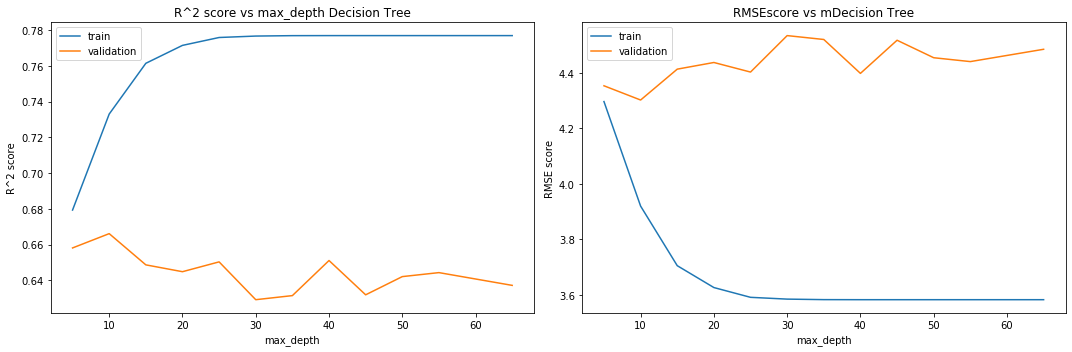

In [319]:
#plotting the scores
plt.subplots(1,2, figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(max_depth_values, cv_DTmodel_max_depth_train_scores, label = 'train')
plt.plot(max_depth_values, cv_DTmodel_max_depth_val_scores, label = 'validation')
plt.xlabel('max_depth')
plt.ylabel('R^2 score')
plt.legend()
plt.title('R^2 score vs max_depth Decision Tree')

plt.subplot(1,2,2)
plt.plot(max_depth_values, cv_DTmodel_max_depth_train_RMSE, label = 'train')
plt.plot(max_depth_values, cv_DTmodel_max_depth_test_RMSE, label = 'validation')
plt.xlabel('max_depth')
plt.ylabel('RMSE score')
plt.legend()
plt.title('RMSEscore vs mDecision Tree')

plt.tight_layout()
plt.show()

It is apparent that the best max depth is around 10, and max depth actually has an effect of the $R^2$ score and RMSE

In [320]:
#using cross validation to find the optimal value of the max_depth

cv_DTmodel_max_depth_5val_scores = []


for max_d in max_depth_values:
    
    print(f'working on {max_d}', end = '\r')
    
    cv_DTmodel = DecisionTreeRegressor(max_depth = max_d)
    
    cv_DTmodel_max_depth_5val_scores.append(np.mean(cross_val_score(cv_DTmodel, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [321]:
#displaying the optimal max-depth value
max_depth_values[np.argmax(cv_DTmodel_max_depth_5val_scores)]

10

So the max depth value looks to be 10, lets run the model with the max depth to see how it does.

Re-running the decision tree with this optimal max_depth value

In [322]:
cv_DTmodel = DecisionTreeRegressor(max_depth = max_depth_values[np.argmax(cv_DTmodel_max_depth_5val_scores)])
cv_DTmodel.fit(X_train_thc_bov_80, y_train_thc)

cv_DTmodel_train_score = cv_DTmodel.score(X_train_thc_bov_80, y_train_thc)
cv_DTmodel_test_score = cv_DTmodel.score(X_test_thc_bov_80, y_test_thc)

cv_DTmodel_train_RMSE = (mean_squared_error(y_train_thc, cv_DTmodel.predict(X_train_thc_bov_80),squared = False))
cv_DTmodel_test_RMSE = (mean_squared_error(y_test_thc, cv_DTmodel.predict(X_test_thc_bov_80),squared = False))


print(f"DT R^2 score on training set: {cv_DTmodel_train_score}")
print(f"DT R^2 score on test set: {cv_DTmodel_test_score}")
print(f"RMSE score on train set: {cv_DTmodel_train_RMSE}")
print(f"RMSE score on test set: {cv_DTmodel_test_RMSE}")

DT R^2 score on training set: 0.7310187923498173
DT R^2 score on test set: 0.6476160050571105
RMSE score on train set: 3.912796641468288
RMSE score on test set: 4.646927629437771


In [323]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Decision Tree max_depth'],
                                                     "train_score_r2":[cv_DTmodel_train_score],
                                                     "test_score_r2":[cv_DTmodel_test_score],                                   
                                                     "train_score_rmse":[cv_DTmodel_train_RMSE],
                                                     "test_score_rmse":[cv_DTmodel_test_RMSE]}),
                                                     ignore_index = True)

In [325]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476


With just the max_depth value being tuned we already see improvements in the models performance.

#### Min_samples_leaf

Next, i investigate if the min_samples at each leaf will have and its effects on the scores. The minimum number of samples required to be at a leaf node will cause the decision tree at any split point at any depth to only be considered if it leaves at least the number of min_samples_leaf training samples specified in each of the left and right branches. This may have the effect of smoothing the model, allowing the model to make predictions closer to the actual value, as the average at each leaf will be of more samples.

In [326]:
#defining some min_samples_leaf values
min_samples_leaf_values = [2, 5, 10, 15, 20, 25, 30, 35]

In [327]:
#creating lists to store the results

cv_DTmodel_min_samples_leaf_train_scores = []
cv_DTmodel_min_samples_leaf_val_scores = []
cv_DTmodel_min_samples_leaf_train_RMSE = []
cv_DTmodel_min_samples_leaf_val_RMSE = []

for min_samp in min_samples_leaf_values:
    
    print(f'working on {min_samp}', end = '\r')
    
    #instantiate the model
    cv_DTmodel = DecisionTreeRegressor(min_samples_leaf = min_samp)
    
    #fit the model
    cv_DTmodel.fit(X_vtrain_thc_bov_80, y_vtrain_thc)
    
    #score the model
    cv_DTmodel_min_samples_leaf_train_scores.append(cv_DTmodel.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    cv_DTmodel_min_samples_leaf_val_scores.append(cv_DTmodel.score(X_val_thc_bov_80, y_val_thc))  
    cv_DTmodel_min_samples_leaf_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_DTmodel.predict(X_vtrain_thc_bov_80),squared = False))
    cv_DTmodel_min_samples_leaf_val_RMSE.append(mean_squared_error(y_val_thc, cv_DTmodel.predict(X_val_thc_bov_80),squared = False))

    
    


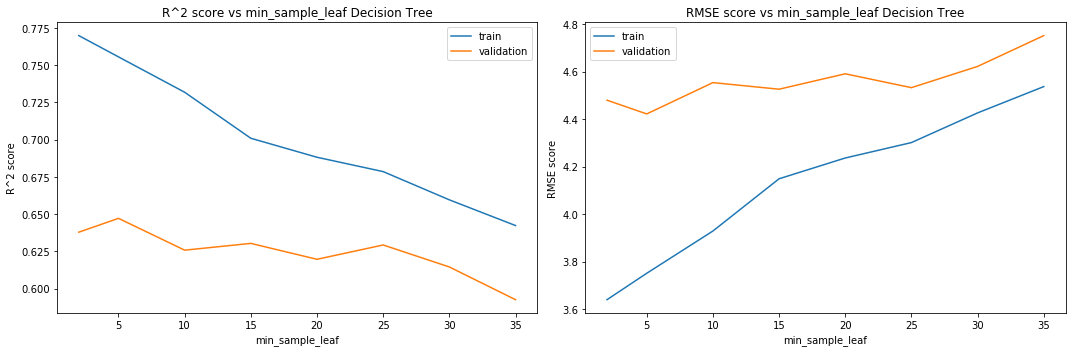

In [328]:
#plotting the scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(min_samples_leaf_values, cv_DTmodel_min_samples_leaf_train_scores, label = 'train')
plt.plot(min_samples_leaf_values, cv_DTmodel_min_samples_leaf_val_scores, label = 'validation')
plt.xlabel('min_sample_leaf')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_sample_leaf Decision Tree')
plt.legend()

plt.subplot(1,2,2)
plt.plot(min_samples_leaf_values, cv_DTmodel_min_samples_leaf_train_RMSE, label = 'train')
plt.plot(min_samples_leaf_values, cv_DTmodel_min_samples_leaf_val_RMSE, label = 'validation')
plt.xlabel('min_sample_leaf')
plt.ylabel('RMSE score')
plt.title('RMSE score vs min_sample_leaf Decision Tree')
plt.legend()


plt.tight_layout()
plt.show()

So it seems 5 is the number of min_samples_leaf which gives the best validation score when considered on its own, and the min_samples_parameter does affect the validation score significantly

In [329]:
#using cross validation to see the optimal value

cv_DTmodel__min_samples_leaf_5val_scores = []


for min_samp in min_samples_leaf_values:
    
    print(f'working on {min_samp}', end = '\r')
    
    cv_DTmodel = DecisionTreeRegressor(min_samples_leaf = min_samp)
    
    cv_DTmodel__min_samples_leaf_5val_scores.append(np.mean(cross_val_score(cv_DTmodel, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [330]:
#checking what the optimal value is
min_samples_leaf_values[np.argmax(cv_DTmodel__min_samples_leaf_5val_scores)]

2

2  seems to be the best min samples per leaf, and the min_sample_leafs parameter has an effect on the train and validation scores.

Re-running the Decision tree with the optimal value for the min_sample leafs

In [363]:
cv_DTmodel = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf_values[np.argmax(cv_DTmodel__min_samples_leaf_5val_scores)])
cv_DTmodel.fit(X_train_thc_bov_80, y_train_thc)

cv_DTmodel_train_score = cv_DTmodel.score(X_train_thc_bov_80, y_train_thc)
cv_DTmodel_test_score = cv_DTmodel.score(X_test_thc_bov_80, y_test_thc)

cv_DTmodel_train_RMSE = (mean_squared_error(y_train_thc, cv_DTmodel.predict(X_train_thc_bov_80),squared = False))
cv_DTmodel_test_RMSE = (mean_squared_error(y_test_thc, cv_DTmodel.predict(X_test_thc_bov_80),squared = False))


print(f"DT R^2 score on training set: {cv_DTmodel_train_score}")
print(f"DT R^2 score on test set: {cv_DTmodel_test_score}")
print(f"RMSE score on train set: {cv_DTmodel_train_RMSE}")
print(f"RMSE score on test set: {cv_DTmodel_test_RMSE}")

DT R^2 score on training set: 0.7660511851841243
DT R^2 score on test set: 0.6287738194853234
RMSE score on train set: 3.649108127108688
RMSE score on test set: 4.769546859704763


In [364]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Decision Tree min_samples_leaf'],
                                                     "train_score_r2":[cv_DTmodel_train_score],
                                                     "test_score_r2":[cv_DTmodel_test_score],                                   
                                                     "train_score_rmse":[cv_DTmodel_train_RMSE],
                                                     "test_score_rmse":[cv_DTmodel_test_RMSE]}),
                                                     ignore_index = True)

In [332]:
#pulling up the baseline score
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476


With just the min_samples_leaf value being tuned we don't see much of an increase in performance.

#### Using GridSearch for Decision Trees

Having seen the model improve in performace (even if only slightly) by independently tuning the parameters, i will use them both in my Gridsearch, to see if a combination of the two yields better results.

In [333]:
#specifying the parameters to do the grid search, and initializing the grid search with the decision tree regressor

cv_DT_params = {'max_depth':max_depth_values, 'min_samples_leaf':min_samples_leaf_values}

cv_DT_grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=cv_DT_params)

In [334]:
# fit the cv searched model
cv_DT_fitted_search = cv_DT_grid_search.fit(X_train_thc_bov_80, y_train_thc)

In [362]:
# score it on the test set
gridsearch_DT_train_score = cv_DT_fitted_search.score(X_train_thc_bov_80, y_train_thc)
gridsearch_DT_test_score =  cv_DT_fitted_search.score(X_test_thc_bov_80, y_test_thc)
gridsearch_DT_train_RMSE_score = mean_squared_error(y_train_thc, cv_DT_fitted_search\
                                                    .predict(X_train_thc_bov_80),squared = False)
gridsearch_DT_test_RMSE_score = mean_squared_error(y_test_thc, cv_DT_fitted_search\
                                                   .predict(X_test_thc_bov_80),squared = False)

print(f"DT R^2 score on training set: {gridsearch_DT_train_score}")
print(f"DT R^2 score on test set: {gridsearch_DT_test_score}")
print(f"DT RMSE score on train set: {gridsearch_DT_train_RMSE_score}")
print(f"DT RMSE score on test set: {gridsearch_DT_test_RMSE_score}")

DT R^2 score on training set: 0.7291916319389
DT R^2 score on test set: 0.6506952927561109
DT RMSE score on train set: 3.926063752441318
DT RMSE score on test set: 4.626579621696343


In [338]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Decision Tree GridSearch'],
                                                     "train_score_r2":[gridsearch_DT_train_score],
                                                     "test_score_r2":[gridsearch_DT_test_score],                                   
                                                     "train_score_rmse":[gridsearch_DT_train_RMSE_score],
                                                     "test_score_rmse":[gridsearch_DT_test_RMSE_score]}),
                                                     ignore_index = True)

In [339]:
#getting the best parameters
cv_DT_fitted_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Looking at the grid search, the max_depth was what we found above, and so was the min_samples_leaf.

In [340]:
#pulling up baseline scores 
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476


Summary of Decision Tree Optimization:

|Model|Train $R^2$|Test $R^2$|Train RMSE|Test RMSE|
|-----|------|-----|-----|-----|
|Base Decision Tree|0.771|0.614|3.61|4.88|
|Decision Tree max_depth|0.731|0.648|3.91|4.64|
|Decision Tree min_samples_leaf|0.766|0.629|3.91|4.77|
|GridSearch Optimized Decision Tree|0.729|0.651|3.93|4.63|

For the decision tree, optimizing the hyperparameters selected using Gridsearch CV, improved the model, with an increase of the variance explained in the test set by 4%, and a decrease in the RMSE of 0.25 % THC.




## Random Forest Regressor - Hyperparameter Optimization

For the random forest i will optimize the same hyper parameters used in the decision tree model, and n_estimators, the number of individual decision tree put together in for voting of the boundaries.

### Getting the baseline score

In [342]:
#instaintiate the model
cv_RFRmodel = RandomForestRegressor(n_jobs = -1)

#fit
cv_RFRmodel.fit(X_train_thc_bov_80, y_train_thc)

#score
cv_RFRmodel_train_score = cv_RFRmodel.score(X_train_thc_bov_80, y_train_thc)
cv_RFRmodel_test_score = cv_RFRmodel.score(X_test_thc_bov_80, y_test_thc)
cv_RFRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_RFRmodel.predict(X_test_thc_bov_80),squared = False)
cv_RFRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_RFRmodel.predict(X_train_thc_bov_80),squared = False)


print(f"RFR R^2 score on training set: {cv_RFRmodel_train_score}")
print(f"RFR R^2 score on test set: {cv_RFRmodel_test_score}")
print(f"RFR RMSE score on Train set: {cv_RFRmodel_train_RMSE}")
print(f"RFR RMSE score on test set: {cv_RFRmodel_test_RMSE}")

RFR R^2 score on training set: 0.766782392742919
RFR R^2 score on test set: 0.6415430349401918
RFR RMSE score on Train set: 3.643401016299622
RFR RMSE score on test set: 4.686799049872938


In [343]:
#adding the model results to the data frame
baseline_scores_hyp = baseline_scores_hyp.append(pd.DataFrame({"model":['Random Forrest'],
                                                     "train_score_r2":[cv_RFRmodel_train_score],
                                                     "test_score_r2":[cv_RFRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_RFRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_RFRmodel_test_RMSE]}),
                                                     ignore_index = True)

### Max depth

In [344]:
#creating lists to store the results
cv_RFRmodel_max_depth_train_scores = []
cv_RFRmodel_max_depth_val_scores = []
cv_RFRmodel_train_RMSE = []
cv_RFRmodel_val_RMSE = []

# loopig through the max_depth_values
for max_d in max_depth_values:
    
    print(f'working on {max_d}', end = '\r')
    
    #instaintiate the model
    cv_RFRmodel = RandomForestRegressor(n_jobs = -1, max_depth = max_d)
    
    #fit
    cv_RFRmodel.fit(X_vtrain_thc_bov_80, y_vtrain_thc)
    
    #score
    cv_RFRmodel_max_depth_train_scores.append(cv_RFRmodel.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    cv_RFRmodel_max_depth_val_scores.append(cv_RFRmodel.score(X_val_thc_bov_80, y_val_thc))
    cv_RFRmodel_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_RFRmodel.predict(X_vtrain_thc_bov_80),squared = False))
    cv_RFRmodel_val_RMSE.append(mean_squared_error(y_val_thc, cv_RFRmodel.predict(X_val_thc_bov_80),squared = False))
    


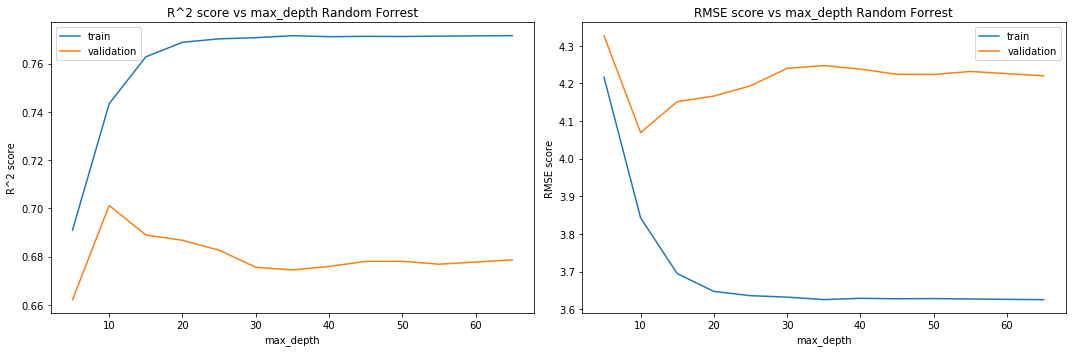

In [345]:
#Plotting the scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
plt.plot(max_depth_values, cv_RFRmodel_max_depth_train_scores, label = 'train')
plt.plot(max_depth_values, cv_RFRmodel_max_depth_val_scores, label = 'validation')
plt.xlabel('max_depth')
plt.ylabel('R^2 score')
plt.title('R^2 score vs max_depth Random Forrest')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(max_depth_values, cv_RFRmodel_train_RMSE, label = 'train')
plt.plot(max_depth_values, cv_RFRmodel_val_RMSE, label = 'validation')
plt.xlabel('max_depth')
plt.ylabel('RMSE score')
plt.title('RMSE score vs max_depth Random Forrest')
plt.legend()

plt.tight_layout()
plt.show()

It is apparent that the max_depth value has an effect on the train and validation scores, and the optimal max depth is around 10

In [346]:
#using 5 fold cross validation to get the optimal max depth
cv_RFRmodel_max_depth_val_scores = []

for max_d in max_depth_values:
    
    print(f'working on {max_d}', end = '\r')
    
    cv_RFRmodel = RandomForestRegressor(max_depth = max_d, n_jobs = -1)
    
    cv_RFRmodel_max_depth_val_scores.append(np.mean(cross_val_score(cv_RFRmodel, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [347]:
#getting the cross validated max depth

opt_max_depth = max_depth_values[np.argmax(cv_RFRmodel_max_depth_val_scores)]
opt_max_depth

10

Re-running the model with the optimized max depth

In [348]:
#instaintiate the model
cv_RFRmodel = RandomForestRegressor(max_depth = opt_max_depth, n_jobs = -1)

#fit
cv_RFRmodel.fit(X_train_thc_bov_80, y_train_thc)

#score
cv_RFRmodel_train_score = cv_RFRmodel.score(X_train_thc_bov_80, y_train_thc)
cv_RFRmodel_test_score = cv_RFRmodel.score(X_test_thc_bov_80, y_test_thc)
cv_RFRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_RFRmodel.predict(X_test_thc_bov_80),squared = False)
cv_RFRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_RFRmodel.predict(X_train_thc_bov_80),squared = False)


print(f"RFR R^2 score on training set: {cv_RFRmodel_train_score}")
print(f"RFR R^2 score on test set: {cv_RFRmodel_test_score}")
print(f"RFR RMSE score on Train set: {cv_RFRmodel_train_RMSE}")
print(f"RFR RMSE score on test set: {cv_RFRmodel_test_RMSE}")

RFR R^2 score on training set: 0.7391214030818711
RFR R^2 score on test set: 0.6530287815317805
RFR RMSE score on Train set: 3.8534127720051727
RFR RMSE score on test set: 4.611100067112078


In [350]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Random Forrest max_depth'],
                                                     "train_score_r2":[cv_RFRmodel_train_score],
                                                     "test_score_r2":[cv_RFRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_RFRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_RFRmodel_test_RMSE]}),
                                                     ignore_index = True)

In [351]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799


Using the optimizes max_depth the model barely increased the models performance, increasing the $R^2$ value by 1, and reducing the RMSE by 0.07 %THC.

#### Min_samples_leaf

In [352]:
#creating lists to store the results
cv_RFRmodel_min_samples_leaf_train_scores = []
cv_RFRmodel_min_samples_leaf_val_scores = []
cv_RFRmodel_min_samples_train_RMSE = []
cv_RFRmodel_min_samples_val_RMSE = []

#looping through the min_samples_leaf_values
for min_samp in min_samples_leaf_values:
      
    print(f'working on {min_samp}', end = '\r')
    
    #instantiate
    cv_RFRmodel = RandomForestRegressor(min_samples_leaf = min_samp, n_jobs = -1, )
    
    #fit
    cv_RFRmodel.fit(X_vtrain_thc_bov_80, y_vtrain_thc)
    
    #score
    cv_RFRmodel_min_samples_leaf_train_scores.append(cv_RFRmodel.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    cv_RFRmodel_min_samples_leaf_val_scores.append(cv_RFRmodel.score(X_val_thc_bov_80, y_val_thc))
    cv_RFRmodel_min_samples_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_RFRmodel.predict(X_vtrain_thc_bov_80),squared = False))
    cv_RFRmodel_min_samples_val_RMSE.append(mean_squared_error(y_val_thc, cv_RFRmodel.predict(X_val_thc_bov_80),squared = False))

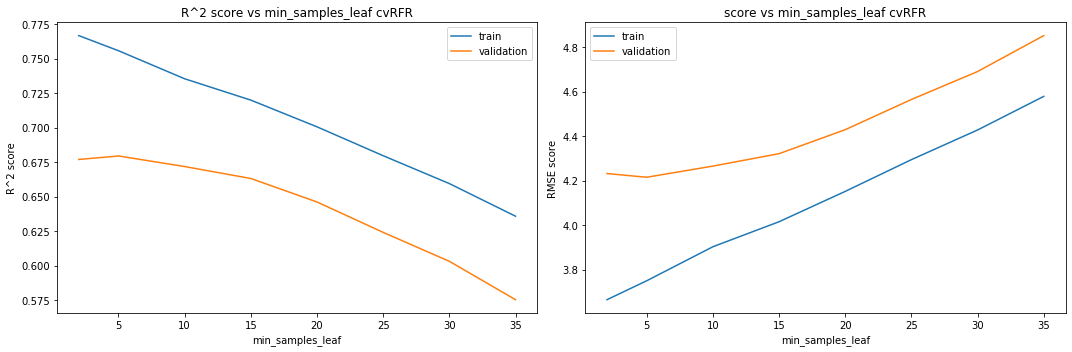

In [353]:
#Plotting the Scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
plt.plot(min_samples_leaf_values, cv_RFRmodel_min_samples_leaf_train_scores, label = 'train')
plt.plot(min_samples_leaf_values, cv_RFRmodel_min_samples_leaf_val_scores, label = 'validation')
plt.xlabel('min_samples_leaf')
plt.ylabel('R^2 score')
plt.title('R^2 score vs min_samples_leaf cvRFR')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(min_samples_leaf_values, cv_RFRmodel_min_samples_train_RMSE, label = 'train')
plt.plot(min_samples_leaf_values, cv_RFRmodel_min_samples_val_RMSE, label = 'validation')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE score')
plt.title('score vs min_samples_leaf cvRFR')
plt.legend()

plt.tight_layout()
plt.show()

I can see that the min_samples_leaf value has an effect on the validation and train score, with the optimal value being around 5.

In [354]:
#using cross validation to find the optimal min_samples_leaf
cv_RFRmodel_min_samples_val_RMSE = []

for min_samp in min_samples_leaf_values:
    
    print(f'working on {min_samp}', end = '\r')
    
    cv_RFRmodel = RandomForestRegressor(n_estimators = 10, n_jobs = -1, min_samples_leaf = min_samp)
    
    cv_RFRmodel_max_depth_val_scores.append(np.mean(cross_val_score(cv_RFRmodel, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [355]:
#getting the cross validated min_leaf_samples

opt_min_samples_leaf = min_samples_leaf_values[np.argmax(cv_RFRmodel_min_samples_leaf_val_scores)]
opt_min_samples_leaf

5

Re running the model with the optimized min_samples_leaf

In [356]:
#instantiate the model
cv_RFRmodel = RandomForestRegressor(min_samples_leaf = opt_min_samples_leaf, n_jobs = -1)

#fit
cv_RFRmodel.fit(X_train_thc_bov_80, y_train_thc)

#score
cv_RFRmodel_train_score = cv_RFRmodel.score(X_train_thc_bov_80, y_train_thc)
cv_RFRmodel_test_score = cv_RFRmodel.score(X_test_thc_bov_80, y_test_thc)
cv_RFRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_RFRmodel.predict(X_test_thc_bov_80),squared = False)
cv_RFRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_RFRmodel.predict(X_train_thc_bov_80),squared = False)


print(f"RFR R^2 score on training set: {cv_RFRmodel_train_score}")
print(f"RFR R^2 score on test set: {cv_RFRmodel_test_score}")
print(f"RFR RMSE score on Train set: {cv_RFRmodel_train_RMSE}")
print(f"RFR RMSE score on test set: {cv_RFRmodel_test_RMSE}")

RFR R^2 score on training set: 0.7534314860982133
RFR R^2 score on test set: 0.6419090652435565
RFR RMSE score on Train set: 3.746235856245277
RFR RMSE score on test set: 4.684405528742356


In [358]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Random Forrest min_samples_leaf'],
                                                     "train_score_r2":[cv_RFRmodel_train_score],
                                                     "test_score_r2":[cv_RFRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_RFRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_RFRmodel_test_RMSE]}),
                                                     ignore_index = True)

In [359]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799


Using the optimized min_samples_leaf the model barely increased the models performance.

#### n_estimators

In [372]:
#defining some estimator values
n_estimators_values = [10, 50, 100, 150, 200, 250, 300, 400, 500]

In [367]:
#creating lists to store the results
cv_RFRmodel_n_estimators_train_scores = []
cv_RFRmodel_n_estimators_val_scores = []
cv_RFRmodel_n_estimators_train_RMSE = []
cv_RFRmodel_n_estimators_val_RMSE = []

#looping through the min_samples_leaf_values
for n_est in n_estimators_values:
    
    print(f'working on {n_est}', end = '\r')
    
    #instantiate
    cv_RFRmodel = RandomForestRegressor(n_estimators = n_est, n_jobs = -1)
    
    #fit
    cv_RFRmodel.fit(X_vtrain_thc_bov_80, y_vtrain_thc)
    
    #score
    cv_RFRmodel_n_estimators_train_scores.append(cv_RFRmodel.score(X_vtrain_thc_bov_80, y_vtrain_thc))
    cv_RFRmodel_n_estimators_val_scores.append(cv_RFRmodel.score(X_val_thc_bov_80, y_val_thc))
    cv_RFRmodel_n_estimators_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_RFRmodel.predict(X_vtrain_thc_bov_80),squared = False))
    cv_RFRmodel_n_estimators_val_RMSE.append(mean_squared_error(y_val_thc, cv_RFRmodel.predict(X_val_thc_bov_80),squared = False))


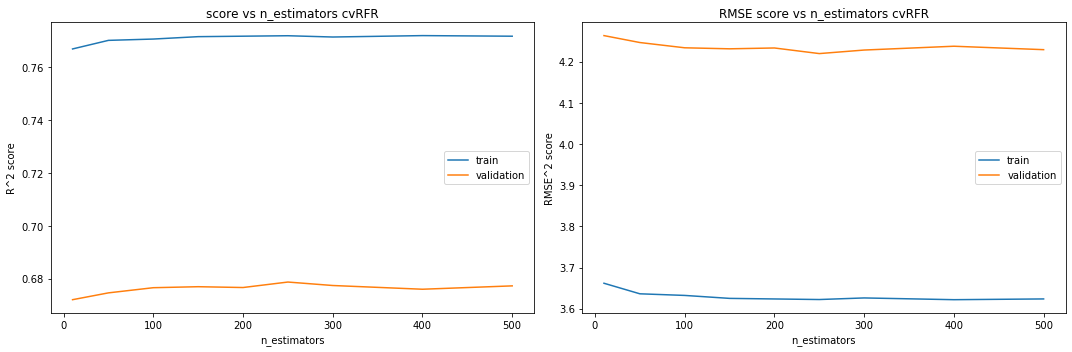

In [368]:
#plotting the scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
plt.plot(n_estimators_values, cv_RFRmodel_n_estimators_train_scores, label = 'train')
plt.plot(n_estimators_values, cv_RFRmodel_n_estimators_val_scores, label = 'validation')
plt.xlabel('n_estimators')
plt.ylabel('R^2 score')
plt.title('score vs n_estimators cvRFR')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(n_estimators_values, cv_RFRmodel_n_estimators_train_RMSE, label = 'train')
plt.plot(n_estimators_values, cv_RFRmodel_n_estimators_val_RMSE, label = 'validation')
plt.xlabel('n_estimators')
plt.ylabel('RMSE^2 score')
plt.title('RMSE score vs n_estimators cvRFR')
plt.legend()

plt.tight_layout()
plt.show()

The n_estimators parameter barely shows any effect on the validation score, only a slight peak at 250.

In [374]:
#using the cross validation to get the optimal value of n_estimators

cv_RFRmodel_n_estimators_val_scores = []


for n_est in n_estimators_values:
    
    print(f'working on {n_est}', end = '\r')
    
    cv_RFRmodel = RandomForestRegressor(n_estimators = n_est, n_jobs = -1)
    cv_RFRmodel_n_estimators_val_scores.append(np.mean(cross_val_score(cv_RFRmodel, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [376]:
#getting the best cross validated n_estimators

opt_n_estimators_RFR = n_estimators_values[np.argmax(cv_RFRmodel_n_estimators_val_scores)]
opt_n_estimators_RFR

300

Re-running the model with the optimized n_estimator

In [377]:
#instantiate the model
cv_RFRmodel = RandomForestRegressor(n_estimators = opt_n_estimators_RFR, n_jobs = -1)

#fit
cv_RFRmodel.fit(X_train_thc_bov_80, y_train_thc)

#score
cv_RFRmodel_train_score = cv_RFRmodel.score(X_train_thc_bov_80, y_train_thc)
cv_RFRmodel_test_score = cv_RFRmodel.score(X_test_thc_bov_80, y_test_thc)
cv_RFRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_RFRmodel.predict(X_test_thc_bov_80),squared = False)
cv_RFRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_RFRmodel.predict(X_train_thc_bov_80),squared = False)


print(f"RFR R^2 score on training set: {cv_RFRmodel_train_score}")
print(f"RFR R^2 score on test set: {cv_RFRmodel_test_score}")
print(f"RFR RMSE score on Train set: {cv_RFRmodel_train_RMSE}")
print(f"RFR RMSE score on test set: {cv_RFRmodel_test_RMSE}")

RFR R^2 score on training set: 0.7673612996222484
RFR R^2 score on test set: 0.6443835131678748
RFR RMSE score on Train set: 3.6388762712469243
RFR RMSE score on test set: 4.668192592003578


In [379]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Random Forrest n_estimators'],
                                                     "train_score_r2":[cv_RFRmodel_train_score],
                                                     "test_score_r2":[cv_RFRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_RFRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_RFRmodel_test_RMSE]}),
                                                     ignore_index = True)

In [381]:
#pulling up the baseline score:
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799


Using the optimized n_estimator value alone we barely see an improvement from the baseline model.

#### Using GridSeach for Random Forest Regressor

In [391]:
#using grid search to find the optimized value of all three together
cv_RFR_params = {'max_depth':max_depth_values, 'min_samples_leaf':min_samples_leaf_values, 'n_estimators': n_estimators_values }

cv_RFR_grid_search = GridSearchCV(estimator=RandomForestRegressor(n_jobs = -1), \
                                  param_grid=cv_RFR_params)

cv_RFR_fitted_search = cv_RFR_grid_search.fit(X_train_thc_bov_80, y_train_thc)

In [408]:
# score the model
gridsearch_rfr_train_score_r2 = cv_RFR_fitted_search.score(X_train_thc_bov_80, y_train_thc)
gridsearch_rfr_test_score_r2 = cv_RFR_fitted_search.score(X_test_thc_bov_80, y_test_thc)
gridsearch_rfr_train_score_RMSE = mean_squared_error(y_train_thc, cv_RFR_fitted_search\
                                                     .predict(X_train_thc_bov_80),squared = False)
gridsearch_rfr_test_score_RMSE = mean_squared_error(y_test_thc, cv_RFR_fitted_search\
                                                    .predict(X_test_thc_bov_80),squared = False)

print(f"RFR R^2 score on training set: {gridsearch_rfr_train_score_r2}")
print(f"RFR R^2 score on test set: {gridsearch_rfr_test_score_r2}")
print(f"RMSE score on train set: {gridsearch_rfr_train_score_RMSE}")
print(f"RMSE score on test set: {gridsearch_rfr_test_score_RMSE}")

RFR R^2 score on training set: 0.7368391828801437
RFR R^2 score on test set: 0.6501437251884683
RMSE score on train set: 3.870231297134226
RMSE score on test set: 4.6302309676855815


In [411]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['Random Forrest GridSearch'],
                                                     "train_score_r2":[gridsearch_rfr_train_score_r2],
                                                     "test_score_r2":[gridsearch_rfr_test_score_r2],                                   
                                                     "train_score_rmse":[gridsearch_rfr_train_score_RMSE],
                                                     "test_score_rmse":[gridsearch_rfr_test_score_RMSE]}),
                                                     ignore_index = True)

In [404]:
#looking at the best parameters
cv_RFR_fitted_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [405]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799


In [417]:
#pulling up the optimized scores
opt_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression Stat Sig,0.745975,0.624362,3.802462,4.797807
1,Ridge Regression Stat Sig,0.735789,0.620548,3.877946,4.822101
2,Ridge Regression,0.737992,0.645623,3.861747,4.660050
3,Decision Tree max_depth,0.731019,0.647616,3.912797,4.646928
4,Decision Tree GridSearch,0.729192,0.650695,3.926064,4.626580
5,Random Forrest max_depth,0.739121,0.653029,3.853413,4.611100
6,Random Forrest min_samples_leaf,0.753431,0.641909,3.746236,4.684406
7,Decision Tree min_samples_leaf,0.766051,0.628774,3.649108,4.769547
8,Random Forrest n_estimators,0.767361,0.644384,3.638876,4.668193
9,Random Forrest GridSearch,0.736839,0.650144,3.870231,4.630231


Summary of Random Forrest Optimization:

|Model|Train $R^2$|Test $R^2$|Train RMSE|Test RMSE|
|-----|------|-----|-----|-----|
|Base Random Forrest Regressor|0.767|0.611|3.61|4.88|
|Random Forrest Regressor max_depth|0.739|0.653|3.85|4.62|
|Random Forrest Regressor min_samples_leaf|0.739|0.641|3.75|4.68|
|Random Forrest Regressor n_estimators|0.767|0.644|3.63|4.67|
|Random Forrest Regressor GridSearch|0.737|0.650|3.87|4.63|


For the random forrest regressor, the model utilizing solely the optimized max depth value performed best, with the GridSearch model coming in as a close second. The max_depth optimized model has an increase of the variance explained in the test set by 4%, and a decrease in the RMSE of 0.26 %THC.



## KNR

For KNR, I optimize the n_neigbors, the number of neighbors around a point to consider for the predicting the value since it is possible that the data points are sparse and that most of neighbors are far away, so limiting the number may make it so that only the closer neighbors contribute to the prediction. I also explore the weight metric, which is the weight each surrounding point gives to the average value, either uniform where they all contribute equally, or distance where the closer points contribute more, again since it is possible that the data points are sparse and that most of neighbors are far away, so having less weight being put on the average by those distant neighbors may improve the models performance. Lastly I explore the distance metric, the metric the model uses to determine the distance between points, and uses to determine which neighbors are the closest, to see if there are better means of determining the distance between the points.

### Getting the Baseline

In [418]:
#instantiate
cv_KNRmodel= KNeighborsRegressor()

#fit
cv_KNRmodel.fit(X_train_thc_bov_80_ss, y_train_thc)

#score
cv_KNRmodel_train_score = cv_KNRmodel.score(X_train_thc_bov_80_ss, y_train_thc)
cv_KNRmodel_test_score = cv_KNRmodel.score(X_test_thc_bov_80_ss, y_test_thc)

cv_KNRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_KNRmodel.predict(X_test_thc_bov_80_ss),squared = False)
cv_KNRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_KNRmodel.predict(X_train_thc_bov_80_ss),squared = False)

print(f'KNRmodel Train set R2 {cv_KNRmodel_train_score}')
print(f'KNRmodel Test set R2 {cv_KNRmodel_test_score}')
print(f"KNRmodel RMSE score on Train set: {cv_KNRmodel_train_RMSE}")
print(f"KNRmodel RMSE score on test set: {cv_KNRmodel_test_RMSE}")

KNRmodel Train set R2 0.7221380996644509
KNRmodel Test set R2 0.6354263953272531
KNRmodel RMSE score on Train set: 3.976864631388978
KNRmodel RMSE score on test set: 4.726617217638628


In [419]:
#adding the model results to the data frame
baseline_scores_hyp = baseline_scores_hyp.append(pd.DataFrame({"model":['K-neighbors Regressor'],
                                                     "train_score_r2":[cv_KNRmodel_train_score],
                                                     "test_score_r2":[cv_KNRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_KNRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_KNRmodel_test_RMSE]}),
                                                     ignore_index = True)

### n_neigbors

In [420]:
#defining some neighbor values
n_neighbors_values = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40]

In [421]:
#creating lists to store the results
cv_KNRmodel_train_score = []
cv_KNRmodel_val_score = []
cv_KNRmodel_train_RMSE = []
cv_KNRmodel_val_RMSE = []

#running the model with different n_neighbors values
for n in n_neighbors_values:

    print(f'working on {n}', end = '\r')
    
    #instantiate
    cv_KNRmodel= KNeighborsRegressor(n_neighbors = n)
    
    #fit
    cv_KNRmodel.fit(X_vtrain_thc_bov_80_ss, y_vtrain_thc_ss)
    
    #score
    cv_KNRmodel_train_score.append(cv_KNRmodel.score(X_vtrain_thc_bov_80_ss, y_vtrain_thc_ss))
    cv_KNRmodel_val_score.append(cv_KNRmodel.score(X_val_thc_bov_80_ss, y_val_thc_ss))    
    cv_KNRmodel_train_RMSE.append(mean_squared_error(y_vtrain_thc_ss, cv_KNRmodel.predict(X_vtrain_thc_bov_80_ss),squared = False))
    cv_KNRmodel_val_RMSE.append(mean_squared_error(y_val_thc_ss, cv_KNRmodel.predict(X_val_thc_bov_80_ss),squared = False))
    

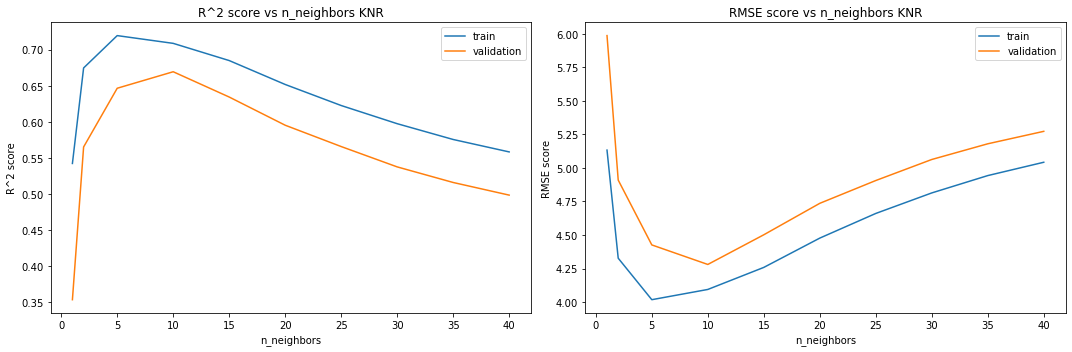

In [423]:
#plotting the scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
plt.plot(n_neighbors_values, cv_KNRmodel_train_score, label = 'train')
plt.plot(n_neighbors_values, cv_KNRmodel_val_score, label = 'validation')
plt.xlabel('n_neighbors')
plt.ylabel('R^2 score')
plt.title('R^2 score vs n_neighbors KNR')
plt.legend()

plt.subplot(1,2,2) #RMSE
plt.plot(n_neighbors_values, cv_KNRmodel_train_RMSE, label = 'train')
plt.plot(n_neighbors_values, cv_KNRmodel_val_RMSE, label = 'validation')
plt.xlabel('n_neighbors')
plt.ylabel('RMSE score')
plt.legend()
plt.title('RMSE score vs n_neighbors KNR')


plt.tight_layout()
plt.show()

It is apparent that the n_neighbors has a large effect on the scores of the model, and the optimal n_neighbors on it is own, is 10. 

In [424]:
#using cross validation to get an idea of the optimal n_neighbors on its own
cv_KNRmodel_n_neighbbors_val_score = []


for n in n_neighbors_values:

    print(f'working on {n}', end = '\r')
    cv_KNRmodel= KNeighborsRegressor(n_neighbors = n)
    
    cv_KNRmodel_n_neighbbors_val_score.append(np.mean(cross_val_score(cv_KNRmodel, X_train_thc_bov_80_ss, y_train_thc, cv = 5)))


In [425]:
#getting the cross validated max depth

opt_n_neighbors_KNR = n_neighbors_values[np.argmax(cv_KNRmodel_n_neighbbors_val_score)]
opt_n_neighbors_KNR

10

This is the same as we saw in the graphs above.

Re-running the model using the optimized n_neighbors

In [426]:
#instantiate
cv_KNRmodel= KNeighborsRegressor(n_neighbors = opt_n_neighbors_KNR)

#fit
cv_KNRmodel.fit(X_train_thc_bov_80_ss, y_train_thc)

#score
cv_KNRmodel_train_score = cv_KNRmodel.score(X_train_thc_bov_80_ss, y_train_thc)
cv_KNRmodel_test_score = cv_KNRmodel.score(X_test_thc_bov_80_ss, y_test_thc)

cv_KNRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_KNRmodel.predict(X_test_thc_bov_80_ss),squared = False)
cv_KNRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_KNRmodel.predict(X_train_thc_bov_80_ss),squared = False)

print(f'KNRmodel Train set R2 {cv_KNRmodel_train_score}')
print(f'KNRmodel Test set R2 {cv_KNRmodel_test_score}')
print(f"KNRmodel RMSE score on Train set: {cv_KNRmodel_train_RMSE}")
print(f"KNRmodel RMSE score on test set: {cv_KNRmodel_test_RMSE}")

KNRmodel Train set R2 0.7174963545019517
KNRmodel Test set R2 0.6372029361573173
KNRmodel RMSE score on Train set: 4.009944259291634
KNRmodel RMSE score on test set: 4.715086921841365


In [427]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['K-neighbors n_neighbors'],
                                                     "train_score_r2":[cv_KNRmodel_train_score],
                                                     "test_score_r2":[cv_KNRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_KNRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_KNRmodel_test_RMSE]}),
                                                     ignore_index = True)

In [428]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799
3,K-neighbors Regressor,0.722138,0.635426,3.976865,4.726617


Using just the optimized number of n_neighbors the KNR model barely sees an improvement.

### Weight metric

In [429]:
#defining some wreight metrics
weight_value = ['uniform', 'distance']

In [430]:
#creating lists to store the results
cv_KNRmodel_train_score = []
cv_KNRmodel_val_score = []
cv_KNRmodel_train_RMSE = []
cv_KNRmodel_val_RMSE = []

for weight_ in weight_value:

    print(f'working on {weight_}')
    cv_KNRmodel= KNeighborsRegressor(weights = f'{weight_}')

    cv_KNRmodel.fit(X_vtrain_thc_bov_80_ss, y_vtrain_thc_ss)

    cv_KNRmodel_train_score.append(cv_KNRmodel.score(X_vtrain_thc_bov_80_ss, y_vtrain_thc_ss))
    cv_KNRmodel_val_score.append(cv_KNRmodel.score(X_val_thc_bov_80_ss, y_val_thc_ss))
    
    cv_KNRmodel_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_KNRmodel.predict(X_vtrain_thc_bov_80_ss),squared = False))
    cv_KNRmodel_val_RMSE.append(mean_squared_error(y_val_thc, cv_KNRmodel.predict(X_val_thc_bov_80_ss),squared = False))

working on uniform
working on distance


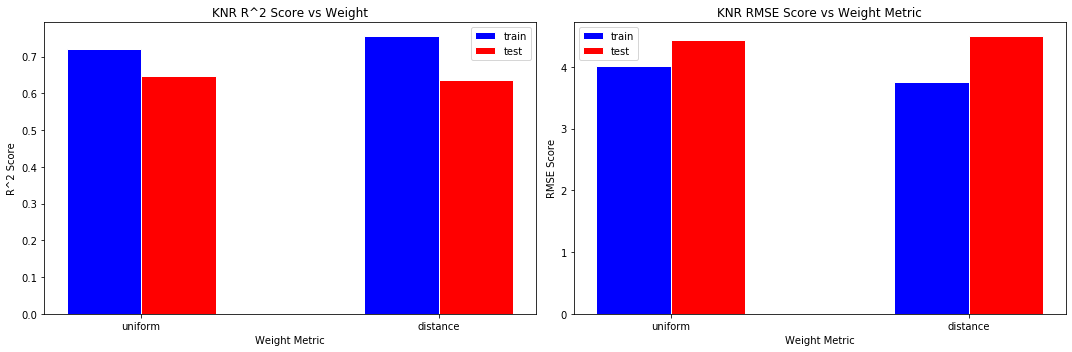

In [435]:
#Plotting the weight metrics vs the train and validation scores

plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
# set width of bar
barWidth = 0.25
 
# set height of bar
train= cv_KNRmodel_train_score
val= cv_KNRmodel_val_score

# set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

# make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, val, color='r', width=barWidth, edgecolor='white', label='test')
 
# add xticks on the middle of the group bars
plt.xlabel('Weight Metric')
plt.ylabel('R^2 Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],weight_value)
plt.title('KNR R^2 Score vs Weight')
plt.legend()

plt.subplot(1,2,2) #RMSE
# set width of bar
barWidth = 0.25
 
# set height of bar
train= cv_KNRmodel_train_RMSE
val= cv_KNRmodel_val_RMSE

# Set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, val, color='r', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Weight Metric')
plt.ylabel('RMSE Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],weight_value)
plt.title('KNR RMSE Score vs Weight Metric')
plt.legend()

plt.tight_layout()
plt.show()

The uniform and the distance metrics seem to cause the model to perform about the same, i'll use 5 fold cross validation to confirm

In [436]:
#using 5 fold cross validation to see which distance measure gives the better validation score
cv_KNRmodel_weight_val_score = []


for weight_ in weight_value:

    print(f'working on {weight_}')
    cv_KNRmodel= KNeighborsRegressor(weights = f'{weight_}')
    
    cv_KNRmodel_weight_val_score.append(np.mean(cross_val_score(cv_KNRmodel, X_train_thc_bov_80_ss, y_train_thc, cv = 5)))


working on uniform
working on distance


In [437]:
#getting the best cross validated weight

opt_weight_KNR = weight_value[np.argmax(cv_KNRmodel_weight_val_score)]
opt_weight_KNR

'uniform'

The best weight metric based on the 5 fold cross validation ended up being the default one, so the results would stay the same as the baseline when running it, so no need to run it. 

### Distance Metric

In [438]:
#defining some distance metrics of interest
distance_metric = ['minkowski','cosine', 'euclidean']

In [439]:
#looping through the different distance metrics and storing the results in the appropriate lists

cv_KNRmodel_train_score = []
cv_KNRmodel_val_score = []
cv_KNRmodel_train_RMSE = []
cv_KNRmodel_val_RMSE = []

for dist_me in distance_metric:

    print(f'working on {dist_me}')
    cv_KNRmodel= KNeighborsRegressor(metric = f'{dist_me}')

    cv_KNRmodel.fit(X_vtrain_thc_bov_80_ss, y_vtrain_thc_ss)

    cv_KNRmodel_train_score.append(cv_KNRmodel.score(X_vtrain_thc_bov_80_ss, y_vtrain_thc_ss))
    cv_KNRmodel_val_score.append(cv_KNRmodel.score(X_val_thc_bov_80_ss, y_val_thc_ss))
    
    cv_KNRmodel_train_RMSE.append(mean_squared_error(y_vtrain_thc, cv_KNRmodel.predict(X_vtrain_thc_bov_80_ss),squared = False))
    cv_KNRmodel_val_RMSE.append(mean_squared_error(y_val_thc, cv_KNRmodel.predict(X_val_thc_bov_80_ss),squared = False))

working on minkowski
working on cosine
working on euclidean


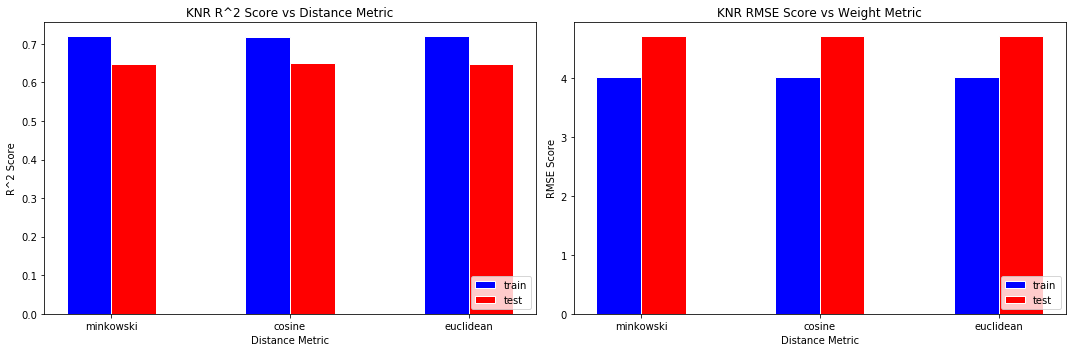

In [442]:
#Plotting the distance metrics vs the train and validation scores

plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1)#R^2
# set width of bar
barWidth = 0.25
 
# set height of bar
train= cv_KNRmodel_train_score
val= cv_KNRmodel_val_score

# set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

# make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, val, color='r', width=barWidth, edgecolor='white', label='test')
 
# add xticks on the middle of the group bars
plt.xlabel('Distance Metric')
plt.ylabel('R^2 Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],distance_metric)
plt.title('KNR R^2 Score vs Distance Metric')
plt.legend(loc = 'lower right')

plt.subplot(1,2,2)#RMSE
# set width of bar
barWidth = 0.25
 
# set height of bar
train= cv_KNRmodel_train_RMSE
val= cv_KNRmodel_test_RMSE

# Set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, val, color='r', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('Distance Metric')
plt.ylabel('RMSE Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],distance_metric)
plt.title('KNR RMSE Score vs Weight Metric')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

Its hard to tell based on the graphs if one performs better than the other, so i will use 5 fold cross validation to determine which one gives the best validation score

All the distance metrics seem to perfom the same, with little effect on the validation scores.

In [444]:
#using cross validation to get an optimized distance metric on its own
cv_KNRmodel_distance_val_score = []


for dist_me in distance_metric:

    print(f'working on {dist_me}')
    cv_KNRmodel= KNeighborsRegressor(metric = f'{dist_me}')
    
    cv_KNRmodel_distance_val_score.append(np.mean(cross_val_score(cv_KNRmodel, X_train_thc_bov_80_ss, y_train_thc, cv = 5)))


working on minkowski
working on cosine
working on euclidean


In [445]:
#getting the cross validated distance

opt_distance_KNR = distance_metric[np.argmax(cv_KNRmodel_distance_val_score)]
opt_distance_KNR

'cosine'

From the 5 fold cross validation, it was determined that the best distance measure based on the validation score is the cosine distance metric.

Re-running the model using the optimized distance metric:

In [446]:
#instantiate
cv_KNRmodel= KNeighborsRegressor(metric = opt_distance_KNR)

#fit
cv_KNRmodel.fit(X_train_thc_bov_80_ss, y_train_thc)

#score
cv_KNRmodel_train_score = cv_KNRmodel.score(X_train_thc_bov_80_ss, y_train_thc)
cv_KNRmodel_test_score = cv_KNRmodel.score(X_test_thc_bov_80_ss, y_test_thc)

cv_KNRmodel_test_RMSE = mean_squared_error(y_test_thc, cv_KNRmodel.predict(X_test_thc_bov_80_ss),squared = False)
cv_KNRmodel_train_RMSE = mean_squared_error(y_train_thc, cv_KNRmodel.predict(X_train_thc_bov_80_ss),squared = False)

print(f'KNRmodel Train set R2 {cv_KNRmodel_train_score}')
print(f'KNRmodel Test set R2 {cv_KNRmodel_test_score}')
print(f"KNRmodel RMSE score on Train set: {cv_KNRmodel_train_RMSE}")
print(f"KNRmodel RMSE score on test set: {cv_KNRmodel_test_RMSE}")

KNRmodel Train set R2 0.7248709273019501
KNRmodel Test set R2 0.6364980395265338
KNRmodel RMSE score on Train set: 3.957259676126447
KNRmodel RMSE score on test set: 4.719665288594482


In [449]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['K-neighbors distance'],
                                                     "train_score_r2":[cv_KNRmodel_train_score],
                                                     "test_score_r2":[cv_KNRmodel_test_score],                                   
                                                     "train_score_rmse":[cv_KNRmodel_train_RMSE],
                                                     "test_score_rmse":[cv_KNRmodel_test_RMSE]}),
                                                     ignore_index = True)

In [451]:
#getting the baseline
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799
3,K-neighbors Regressor,0.722138,0.635426,3.976865,4.726617


Using just the optimized distance metric, there was barely and increase in the performance of the K-neighbors model.

#### GridSearchCV KNR

In [453]:
#specifying the parameters to do the grid search, initializing the grid search

cv_KNR_params = {'n_neighbors':n_neighbors_values, 'weights': weight_value, 'metric': distance_metric}

cv_KNR_grid_search = GridSearchCV(estimator = KNeighborsRegressor(n_jobs = -1), param_grid=cv_KNR_params)

In [454]:
# fit the gridsearched model
cv_KNR_fitted_search = cv_KNR_grid_search.fit(X_train_thc_bov_80_ss, y_train_thc)

In [456]:
#scoring the gridsearched model
gridsearch_KNR_train_r2 = cv_KNR_fitted_search.score(X_train_thc_bov_80_ss, y_train_thc)
gridsearch_KNR_test_r2 = cv_KNR_fitted_search.score(X_test_thc_bov_80_ss, y_test_thc)
gridsearch_KNR_train_RMSE = mean_squared_error(y_train_thc, cv_KNR_fitted_search\
                                               .predict(X_train_thc_bov_80_ss),squared = False)
gridsearch_KNR_test_RMSE = mean_squared_error(y_test_thc, cv_KNR_fitted_search\
                                              .predict(X_test_thc_bov_80_ss),squared = False)

print(f"KNR R^2 score on training set: {gridsearch_KNR_train_r2}")
print(f"KNR R^2 score on test set: {gridsearch_KNR_test_r2}")
print(f"RMSE score on train set: {gridsearch_KNR_train_RMSE}")
print(f"RMSE score on test set: {gridsearch_KNR_test_RMSE}")

KNR R^2 score on training set: 0.7211401644786912
KNR R^2 score on test set: 0.6425751162794342
RMSE score on train set: 3.983999643765165
RMSE score on test set: 4.680046991522323


In [457]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['K-neighbors GridSearch'],
                                                     "train_score_r2":[gridsearch_KNR_train_r2],
                                                     "test_score_r2":[gridsearch_KNR_test_r2],                                   
                                                     "train_score_rmse":[gridsearch_KNR_train_RMSE],
                                                     "test_score_rmse":[gridsearch_KNR_test_RMSE]}),
                                                     ignore_index = True)

In [458]:
#getting the parameters of the best estimator
cv_KNR_fitted_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='cosine',
                    metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                    weights='uniform')

In [459]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799
3,K-neighbors Regressor,0.722138,0.635426,3.976865,4.726617


In [460]:
#pulling up the hyperparameter optimized scores
opt_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression Stat Sig,0.745975,0.624362,3.802462,4.797807
1,Ridge Regression Stat Sig,0.735789,0.620548,3.877946,4.822101
2,Ridge Regression,0.737992,0.645623,3.861747,4.660050
3,Decision Tree max_depth,0.731019,0.647616,3.912797,4.646928
4,Decision Tree GridSearch,0.729192,0.650695,3.926064,4.626580
5,Random Forrest max_depth,0.739121,0.653029,3.853413,4.611100
6,Random Forrest min_samples_leaf,0.753431,0.641909,3.746236,4.684406
7,Decision Tree min_samples_leaf,0.766051,0.628774,3.649108,4.769547
8,Random Forrest n_estimators,0.767361,0.644384,3.638876,4.668193
9,Random Forrest GridSearch,0.736839,0.650144,3.870231,4.630231


Summary of K-neighbors Regressor Optimization:

|Model|Train $R^2$|Test $R^2$|Train RMSE|Test RMSE|
|-----|------|-----|-----|-----|
|Base K-Neighbors Regressor |0.722|0.635|3.97|4.72|
|K-Neighbors Regressor n_neighbors|0.717|0.637|4.00|4.72|
|K-Neighbors Regressor distance|0.725|0.636|3.96|4.72|
|K-Neighbors Regressor GridSearch|0.721|0.643|3.984|4.68|

The optimization of the K-neighbors regressor yielded very little improvment, a 0.8 increase in the test $R^2$, and a 0.04 %THC decrease in the RMSE with the highest scoring model, the one obtained using the GridSearch CV



## SVR

For SVR i will first determine which kernel works the best, to see if there are any gains to be made by mapping the data different ways, and based on the best kernel i will continue to optimize the hyperparameters for it. 

### Kernel

In [461]:
#defining the kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

#creating lists to store the results
ss_SVR_train_score = []
ss_SVR_val_score = []
ss_SVR_train_RMSE = []
ss_SVR_val_RMSE = []

#looping through the kernels and evaluating their scores
for kernel_i in kernels:
    
    print(f'working on {kernel_i}')
    ss_SVRmodel = SVR(kernel = f'{kernel_i}')
   
    print('fitting')
    ss_SVRmodel.fit(X_vtrain_thc_bov_80_ss, y_vtrain_thc)
    
    print('scoring')

    ss_SVR_train_score.append(ss_SVRmodel.score(X_vtrain_thc_bov_80_ss, y_vtrain_thc))
    ss_SVR_val_score.append(ss_SVRmodel.score(X_val_thc_bov_80_ss, y_val_thc))
    
    ss_SVR_train_RMSE.append(mean_squared_error(y_vtrain_thc, ss_SVRmodel.predict(X_vtrain_thc_bov_80_ss),squared = False))
    ss_SVR_val_RMSE.append(mean_squared_error(y_val_thc, ss_SVRmodel.predict(X_val_thc_bov_80_ss),squared = False))

working on linear
fitting
scoring
working on poly
fitting
scoring
working on rbf
fitting
scoring
working on sigmoid
fitting
scoring


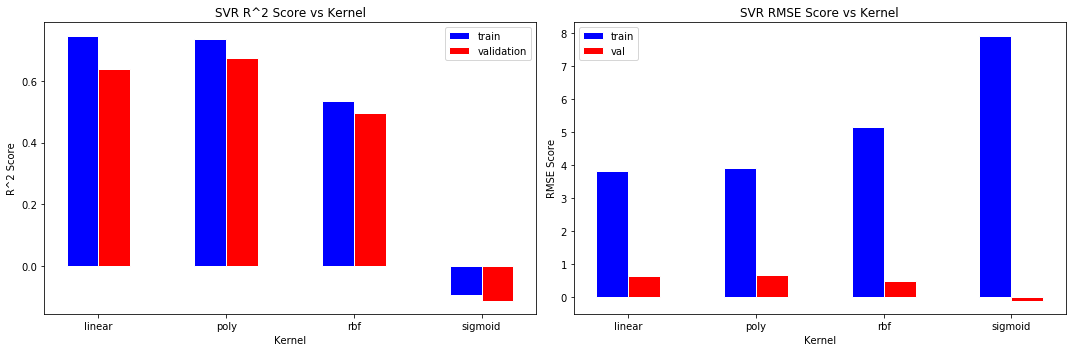

In [462]:
#Plotting SVR kernel results
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1) #R^2
# set width of bar
barWidth = 0.25
 
# set height of bar
train= ss_SVR_train_score
val= ss_SVR_val_score

# set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]
 
# make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, val, color='r', width=barWidth, edgecolor='white', label='validation')

# add xticks on the middle of the group bars
plt.xlabel('Kernel')
plt.ylabel('R^2 Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],kernels)
plt.title('SVR R^2 Score vs Kernel')
plt.legend()

plt.subplot(1,2,2)#RMSE
# set width of bar
barWidth = 0.25
 
# set height of bar
train= ss_SVR_train_RMSE
test= ss_SVR_val_RMSE

# Set position of bar on X axis
r1 = np.arange(len(train))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, train, color='b', width=barWidth, edgecolor='white', label='train')
plt.bar(r2, val, color='r', width=barWidth, edgecolor='white', label='val')

 
# Add xticks on the middle of the group bars
plt.xlabel('Kernel')
plt.ylabel('RMSE Score')
plt.xticks([r + barWidth/2 for r in range(len(train))],kernels)
plt.title('SVR RMSE Score vs Kernel')
plt.legend()

plt.tight_layout()
plt.show()

It looks like poly is the best performing kernel in thise model for this data.


In [464]:
#creating a dataframe with all the train and validation scores
svr_scores = pd.DataFrame()
svr_scores['model']= kernels
svr_scores['train_r^2']= ss_SVR_train_score
svr_scores['val_r^2']= ss_SVR_val_score
svr_scores['train_rmse']= ss_SVR_train_RMSE
svr_scores['val_rmse']= ss_SVR_val_RMSE
svr_scores

,model,train_r^2,val_r^2,train_rmse,val_rmse
0,linear,0.746798,0.639908,3.817328,4.467153
1,poly,0.734465,0.673995,3.909196,4.250463
2,rbf,0.535200,0.494926,5.172009,5.290557
3,sigmoid,-0.093017,-0.112081,7.931218,7.850409


The actual values for the different scores confirms this, as the poly validation score is the highest.

### Getting the baseline for SVR Poly

In [468]:
#Getting the baseline of the SVR with the poly kernel
#instantiate
ss_SVRmodel = SVR(kernel = 'poly')

#fit
ss_SVRmodel.fit(X_train_thc_bov_80_ss, y_train_thc)
    
#score
ss_SVR_train_score = (ss_SVRmodel.score(X_train_thc_bov_80_ss, y_train_thc))
ss_SVR_test_score = (ss_SVRmodel.score(X_test_thc_bov_80_ss, y_test_thc))
ss_SVR_train_RMSE = mean_squared_error(y_train_thc, ss_SVRmodel.predict(X_train_thc_bov_80_ss),squared = False)
ss_SVR_test_RMSE = mean_squared_error(y_test_thc, ss_SVRmodel.predict(X_test_thc_bov_80_ss),squared = False)

In [469]:
#adding the model results to the data frame
baseline_scores_hyp = baseline_scores_hyp.append(pd.DataFrame({"model":['SVR poly'],
                                                               "train_score_r2":[ss_SVR_train_score],
                                                               "test_score_r2":[ss_SVR_test_score],                                   
                                                               "train_score_rmse":[ss_SVR_train_RMSE],
                                                               "test_score_rmse":[ss_SVR_test_RMSE]}),
                                                                ignore_index = True)

### Degree of Polynomial

Since the kernel which worked best was the poly, i can explore the tuning of the degree of the polynomial

In [471]:
#defining some polynomial degrees
degree_values = [2,3,4,5,6,7]

In [472]:
#creating lists to store the scores
ss_SVR_linear_train_score = []
ss_SVR_linear_val_score = []
ss_SVR_linear_train_RMSE = []
ss_SVR_linear_val_RMSE = []

#looping through every polynomial value
for degree_ in degree_values:
    
    print(f'working on {degree_}')
    ss_SVRmodel_linear = SVR(kernel = 'poly', degree = degree_)
   
    print('fitting')
    ss_SVRmodel_linear.fit(X_vtrain_thc_bov_80_ss, y_vtrain_thc)
    
    print('scoring')

    ss_SVR_linear_train_score.append(ss_SVRmodel_linear.score(X_vtrain_thc_bov_80_ss, y_vtrain_thc))
    ss_SVR_linear_val_score.append(ss_SVRmodel_linear.score(X_val_thc_bov_80_ss, y_val_thc))
    ss_SVR_linear_train_RMSE.append(mean_squared_error(y_vtrain_thc, ss_SVRmodel_linear.predict(X_vtrain_thc_bov_80_ss),squared = False))
    ss_SVR_linear_val_RMSE.append(mean_squared_error(y_val_thc, ss_SVRmodel_linear.predict(X_val_thc_bov_80_ss),squared = False))

working on 2
fitting
scoring
working on 3
fitting
scoring
working on 4
fitting
scoring
working on 5
fitting
scoring
working on 6
fitting
scoring
working on 7
fitting
scoring


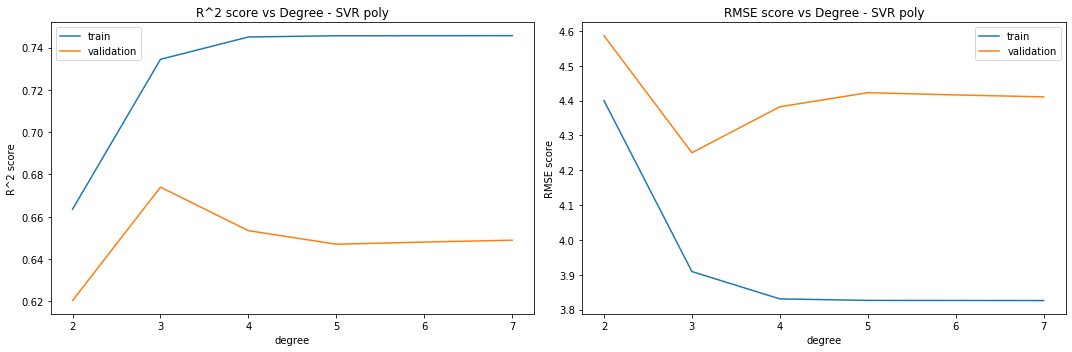

In [473]:
#plotting the scores
plt.subplots(1,2,figsize = (15,5))

plt.subplot(1,2,1)#R^2
plt.plot(degree_values, ss_SVR_linear_train_score, label = 'train')
plt.plot(degree_values, ss_SVR_linear_val_score, label = 'validation')
plt.xlabel('degree')
plt.ylabel('R^2 score')
plt.title('R^2 score vs Degree - SVR poly')
plt.legend()


plt.subplot(1,2,2)#RMSE
plt.plot(degree_values, ss_SVR_linear_train_RMSE, label = 'train')
plt.plot(degree_values, ss_SVR_linear_val_RMSE, label = 'validation')
plt.xlabel('degree')
plt.ylabel('RMSE score')
plt.title('RMSE score vs Degree - SVR poly')
plt.legend()

plt.tight_layout()
plt.show()

Varying the degree of the polynomial shows an effect on the validation scores, with a degree of 3 looking like its the optimal value.

In [474]:
#using 5 fold cross validation to confirm the optimal polynomial degree

ss_SVR_poly_val_score = []

for degree_ in degree_values:
    
    print(f'working on {degree_}', end = '\r')
    
    ss_SVRmodel_poly = SVR(kernel = 'poly', degree = degree_)
    
    ss_SVR_poly_val_score.append(np.mean(cross_val_score(ss_SVRmodel_poly, X_train_thc_bov_80, y_train_thc, cv = 5)))


In [475]:
#extracting the best degree
opt_svr_degree = degree_values[np.argmax(ss_SVR_poly_val_score)]
opt_svr_degree

2

Oddly enough using 5 fold cross validation determined that the optimal polynomial degree is actually 2, rather than 3 observed above.

In [488]:
#Re ruinning the model using the optimized polynomial degree

#Instantiate
ss_SVRmodel_poly = SVR(kernel = 'poly', degree = opt_svr_degree)
   
#fit
ss_SVRmodel_poly.fit(X_train_thc_bov_80_ss, y_train_thc)

#score
ss_SVR_poly_train_score = ss_SVRmodel_poly.score(X_train_thc_bov_80_ss, y_train_thc)
ss_SVR_poly_test_score = ss_SVRmodel_poly.score(X_test_thc_bov_80_ss, y_test_thc)
ss_SVR_poly_train_RMSE = mean_squared_error(y_train_thc, ss_SVRmodel_poly.predict(X_train_thc_bov_80_ss),squared = False)
ss_SVR_poly_test_RMSE = mean_squared_error(y_test_thc, ss_SVRmodel_poly.predict(X_test_thc_bov_80_ss),squared = False)


print(f'Poly SVR Train R2 score {ss_SVR_poly_train_score}')
print(f'Poly SVR test R2 score {ss_SVR_poly_test_score}')
print(f"Poly SVR Train RMSE: {ss_SVR_poly_train_RMSE}")
print(f"Poly SVR Test RMSE {ss_SVR_poly_test_RMSE}")

Poly SVR Train R2 score 0.682236977208517
Poly SVR test R2 score 0.607953547465018
Poly SVR Train RMSE: 4.2528296447170035
Poly SVR Test RMSE 4.901472673505077


In [494]:
#adding the model results to the data frame
opt_scores_hyp = opt_scores_hyp.append(pd.DataFrame({"model":['SVR poly degree'],
                                                     "train_score_r2":[ss_SVR_poly_train_score],
                                                     "test_score_r2":[ss_SVR_poly_test_score],                                   
                                                     "train_score_rmse":[ss_SVR_poly_train_RMSE],
                                                     "test_score_rmse":[ss_SVR_poly_test_RMSE]}),
                                                     ignore_index = True)

In [491]:
#pulling up the baseline scores
baseline_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476
2,Random Forrest,0.766782,0.641543,3.643401,4.686799
3,K-neighbors Regressor,0.722138,0.635426,3.976865,4.726617
4,SVR poly,0.730888,0.632035,3.913750,4.748550


In [495]:
#pulling up the optimized scores
opt_scores_hyp

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
0,Linear Regression Stat Sig,0.745975,0.624362,3.802462,4.797807
1,Ridge Regression Stat Sig,0.735789,0.620548,3.877946,4.822101
2,Ridge Regression,0.737992,0.645623,3.861747,4.660050
3,Decision Tree max_depth,0.731019,0.647616,3.912797,4.646928
4,Decision Tree GridSearch,0.729192,0.650695,3.926064,4.626580
5,Random Forrest max_depth,0.739121,0.653029,3.853413,4.611100
6,Random Forrest min_samples_leaf,0.753431,0.641909,3.746236,4.684406
7,Decision Tree min_samples_leaf,0.766051,0.628774,3.649108,4.769547
8,Random Forrest n_estimators,0.767361,0.644384,3.638876,4.668193
9,Random Forrest GridSearch,0.736839,0.650144,3.870231,4.630231


Summary of SVR linear Optimization:

|Model|Train $R^2$|Test $R^2$|Train RMSE|Test RMSE|
|-----|------|-----|-----|-----|
|Base SVR poly|0.731|0.632|3.91|4.75|
|Optimized SVR poly|0.682|0.608|4.25|4.90|

The cross validated degree of the polynomial kernel for SVR decreased the test $R^2$ value, and also increased the test RMSE, meaning the model performed worse





### Overall Hyperparameter Tuning Summary

In [486]:
#Looking at the baseline scores
baseline_scores_hyp.sort_values('test_score_r2', ascending = False)

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
2,Random Forrest,0.766782,0.641543,3.643401,4.686799
3,K-neighbors Regressor,0.722138,0.635426,3.976865,4.726617
4,SVR poly,0.730888,0.632035,3.913750,4.748550
0,Linear Regression,0.771055,0.616858,3.609871,4.845487
1,Decision Tree,0.771055,0.611465,3.609871,4.879476


In [67]:
#Looking at the optimized scores
opt_scores_hyp.sort_values('test_score_r2', ascending = False)

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
5,Random Forrest max_depth,0.739121,0.653029,3.853413,4.611100
4,Decision Tree GridSearch,0.729192,0.650695,3.926064,4.626580
9,Random Forrest GridSearch,0.736839,0.650144,3.870231,4.630231
3,Decision Tree max_depth,0.731019,0.647616,3.912797,4.646928
2,Ridge Regression,0.737992,0.645623,3.861747,4.660050
8,Random Forrest n_estimators,0.767361,0.644384,3.638876,4.668193
12,K-neighbors GridSearch,0.721140,0.642575,3.984000,4.680047
6,Random Forrest min_samples_leaf,0.753431,0.641909,3.746236,4.684406
10,K-neighbors n_neighbors,0.717496,0.637203,4.009944,4.715087
11,K-neighbors distance,0.724871,0.636498,3.957260,4.719665


So of the models run, the model with the highest baseline test $R^2$ score was the Random forrest, and it saw one of the smallest increases when I tried to optimize it. There seems to be a general trend where if the models had a higher baseline test $R^2$ score, they increased very little when optimized. 

The Decision Tree regressor went from being the lowest of the baselines, to second in the optimized models, which was surprising.

Most of the models explain at least 60% of the variance in the test set, and the RMSE across the models only has a range of 0.03 %THC.

The top three models are, in order, the Random Forrest Regressor optimized with just the max_depth parameter, the Decsision Tree Regressor optimized with GridSearch, and the Random Forrest Regressor again, but optimized by GridSearch, and the top performing model, Random Forrest Regressor optimized with just the max_depth parameter, has a test $R^2$ score of 0.653, and the lowest RMSE of all the models at 4.61%THC. Since the top three performing models are Decsions Tree tree based, we can say that the count of the variants has a threshold level relationshiop to the THC, the amount of THC in a cannabis plant is best predicted when looking at if it contains above or below a certain 

While the $R^2$ value is ok, being able to explain 2/3rds of the variation is good, the RMSE score is poor, as for the predicted values the 95% confidence interval is ~10% THC, and due to the fact that the values we are predicting are between 0-30% THC it is especially bad, so i need to revisit my modelling, possibly performing PCA as a feature reducer rather than using the min_df, and i should also explore the use of TF-IDF instead of count vectorizing. 

In summary in this project, i was able to determine the relationship between the count of the variants in a cannabis genome and its THC content is best determined by a decision tree type model, the Random Forrest Regressor, and it can explain 73% percent of the variance in training set, and 65% of the variance in our test set. 

In [507]:
#Looking at the top 3 models:
opt_scores_hyp.sort_values('test_score_r2', ascending = False)[0:3]

,model,train_score_r2,test_score_r2,train_score_rmse,test_score_rmse
5,Random Forrest max_depth,0.739121,0.653029,3.853413,4.611100
4,Decision Tree GridSearch,0.729192,0.650695,3.926064,4.626580
9,Random Forrest GridSearch,0.736839,0.650144,3.870231,4.630231


I cant exactly look at the Random forrest tree, but i can look at the Decision Tree resulting from the gridsearch:

In [518]:
cv_DT_fitted_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [509]:
besttree = cv_DT_fitted_search.best_estimator_

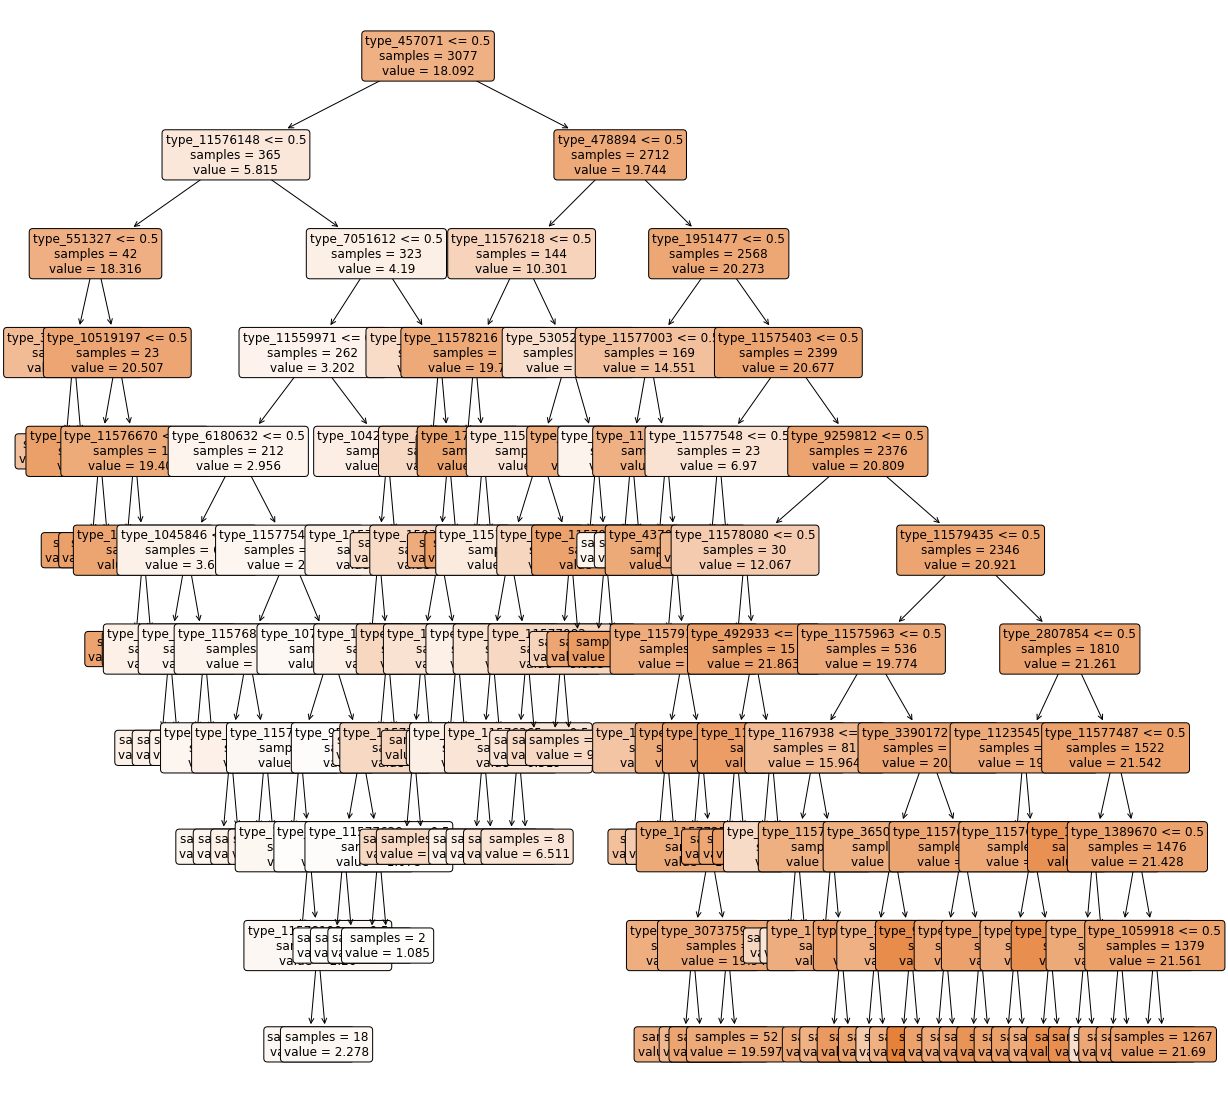

In [517]:
#Plot the decision tree
plt.figure(figsize = (20,20))
plot_tree(besttree, 
          feature_names=bagofvariants_80.get_feature_names(),
          rounded=True,
          impurity=False,
          filled=True, 
          fontsize = 12);
plt.show()

Nothing all that interesting here to see (i apologize for the overlap), other than variant type_457071 is the main variant which splits the strains into less impure groupings.

## Implementing a Neural Network

Since i didn't see any major improvements in the models through hyperparamer optimization, i thought that maybe deep learning could be implemented using a neural network.

I chose to use a convolutional neural network, which takes in the counts of each variant, and outputs the THC content using a linear activation function from the last hidden layer to my output layer. Convolutional neural networks are good for detecting patterns, so here i'm hoping to use patterns in the number of each variant to better predict the thc content, setting the kernel to scan over the different combinations of the variants. 

One issue here is that the variants are not in any particular order in which they appear, so i'm looking for patterns in this random arrangment of variants, if i were to revisit this i would revisit the data and try and put the variants in order of how they appear in the genome. However what i could do here is set the kernel to be the full length of the number of variants, and scan for patterns across the whole list of variants at once, and then scan those for patterns in those patterns using anopther convolutional layer with a kernel smaller than the full number of variants.

The convolutional neural network used was taken from an example, where it was used to predict the housing prices in boston, from this website: https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html

I wasn't originally planning on implementing neural networks in this project, but i decided to give it a try, just to see how they perform and if it could pick up on anymore complex relationships in the variant data. I didn't really get a chance to go further in this section, i tried, looked at the results, and didn't have time to do any optimization, like look at adding dropout layers to prevent overfitting, playing with the kernel size, adding more layers etc.

In [10]:
#importing the required packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

## Making a Train and Validation Set, and Transforming the Data for 1D CNN

In [34]:
#making a validation set with the dense maticies
X_vtrain_thc_bov_80_dense, X_val_thc_bov_80_dense, y_vtrain_thc, y_val_thc = train_test_split(X_train_thc_bov_80_dense, y_train_thc, test_size = 0.3, random_state = 42)

In [35]:
#making arrays of the dense dataframe
X_vtrain_thc_bov_80_dense_ar = np.array(X_vtrain_thc_bov_80_dense)

In [36]:
#making arrays of the dense dataframe
X_val_thc_bov_80_dense_ar = np.array(X_val_thc_bov_80_dense)

In [37]:
#making arrays of the dense dataframe
X_train_thc_bov_80_dense_ar = np.array(X_train_thc_bov_80_dense)

In [38]:
#making arrays of the dense dataframe
X_test_thc_bov_80_dense_ar = np.array(X_test_thc_bov_80_dense)

In [40]:
#reshaping the array for the neural network
X_vtrain_thc_bov_80_dense_re = X_vtrain_thc_bov_80_dense_ar.reshape(X_vtrain_thc_bov_80_dense_ar.shape[0], X_vtrain_thc_bov_80_dense_ar.shape[1], 1)

In [41]:
#reshaping the array for the neural network
X_val_thc_bov_80_dense_re = X_val_thc_bov_80_dense_ar.reshape(X_val_thc_bov_80_dense_ar.shape[0], X_val_thc_bov_80_dense_ar.shape[1], 1)

In [43]:
#reshaping the array for the neural network
X_train_thc_bov_80_dense_re = X_train_thc_bov_80_dense_ar.reshape(X_train_thc_bov_80_dense_ar.shape[0], X_train_thc_bov_80_dense_ar.shape[1], 1)

In [44]:
#reshaping the array for the neural network
X_test_thc_bov_80_dense_re = X_test_thc_bov_80_dense_ar.reshape(X_test_thc_bov_80_dense_ar.shape[0], X_test_thc_bov_80_dense_ar.shape[1], 1)

## 1D CNN

First i want to see how the model performs without changing it at all

In [45]:
#defining the neural network, this was the base model found online
model = Sequential()
model.add(Conv1D(32, kernel_size = 2, activation="relu", input_shape=(X_train_thc_bov_80_dense_re.shape[1], 1)))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(1))#no activation function to the output layer since it is a continous regression
model.compile(loss="mse", optimizer="adam")# MSE since it is a continuous regression problem
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1614, 32)          96        
_________________________________________________________________
flatten_1 (Flatten)          (None, 51648)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3305536   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 3,305,697
Trainable params: 3,305,697
Non-trainable params: 0
_________________________________________________________________


In [46]:
#fitting the data to the neural network
model.fit(X_train_thc_bov_80_dense_re, y_train_thc,epochs=100, verbose = 1)

Epoch 1/100
3077/3077 [==============================] - 5s 2ms/step - loss: 50.6815
Epoch 2/100
3077/3077 [==============================] - 5s 1ms/step - loss: 26.7466
Epoch 3/100
3077/3077 [==============================] - 4s 1ms/step - loss: 21.8730
Epoch 4/100
3077/3077 [==============================] - 5s 1ms/step - loss: 19.9205
Epoch 5/100
3077/3077 [==============================] - 5s 2ms/step - loss: 18.8860
Epoch 6/100
3077/3077 [==============================] - 5s 1ms/step - loss: 18.2560
Epoch 7/100
3077/3077 [==============================] - 5s 2ms/step - loss: 18.7818
Epoch 8/100
3077/3077 [==============================] - 5s 2ms/step - loss: 19.0788
Epoch 9/100
3077/3077 [==============================] - 5s 2ms/step - loss: 16.6226
Epoch 10/100
3077/3077 [==============================] - 5s 2ms/step - loss: 17.6248
Epoch 11/100
3077/3077 [==============================] - 5s 2ms/step - loss: 16.8922
Epoch 12/100
3077/3077 [==============================] - 5s 1m

In [56]:
ypred = model.predict(X_test_thc_bov_80_dense_re)

print("RMSE: %.4f" % mean_squared_error(y_test_thc, ypred, squared = False))

RMSE: 4.6970


Even without any optimizing the RMSE of the 1D neural network is better than some of the optimized models.

In [57]:
#creating a dataframe with the predicted and actual scores to get the percent difference out of curiosity
pred_true_y = pd.DataFrame(y_test_thc)
pred_true_y['predicted'] = ypred.flatten()
pred_true_y['percent_diff'] = abs((pred_true_y['predicted']-pred_true_y['total_thc'])/pred_true_y['total_thc'])*100


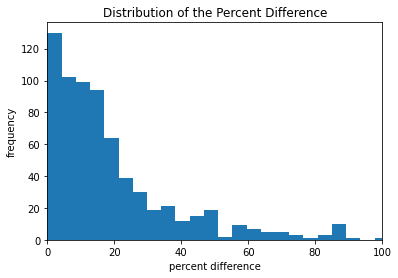

In [59]:
#plotting the percent difference
plt.figure()
plt.hist(pred_true_y['percent_diff'], bins = 1000)
plt.xlim(0, 100)
plt.title('Distribution of the Percent Difference')
plt.xlabel('percent difference')
plt.ylabel('frequency')
plt.show()

In [60]:
#seeing what percentage of predictions have a percent difference of less than 15 percent
(1 - pred_true_y.query('percent_diff >= 15').shape[0]/pred_true_y.shape[0])*100

49.87012987012987

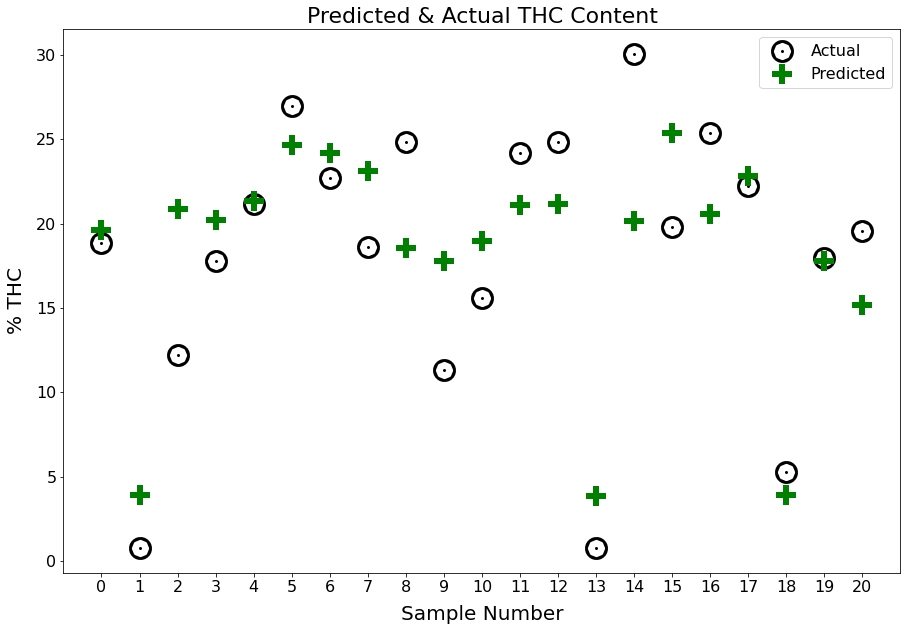

In [61]:
#plotting the first 20 predicted and actual thc content to see how close they are
plt.figure(figsize = (15,10))
plt.scatter(range(0, len(y_test_thc[0:21])), y_test_thc[0:21], marker = '.', color = 'k', linewidth=20, label = 'Actual')
plt.scatter(range(0, len(ypred[0:21])), ypred[0:21], marker = '+', color = 'g', linewidth=20, label = 'Predicted')
plt.ylabel('% THC', fontsize=20, labelpad = 10)
plt.xlabel('Sample Number', fontsize=20, labelpad = 10)
plt.title('Predicted & Actual THC Content', fontsize=22)
plt.legend(loc = 'upper right', fontsize=16)
plt.xticks(ticks = (range(0, 21)), fontsize=16)
plt.yticks(fontsize=16)
plt.show()